In [12]:
# System
import sys
import os
import operator
import argparse
import itertools

# Time
import time
import datetime
from datetime import datetime
from time import gmtime, strftime
from pytz import timezone

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score


'''
# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPool2D, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D

from keras.regularizers import l2

# Deep Learning - Keras - Pretrained Models
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetMobile, NASNetLarge

from keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualisation
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf
'''

# Graph/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

import seaborn as sns

# from mlxtend.plotting import plot_confusion_matrix
import plotly.express as px

# from wordcloud import WordCloud

# Image
# import cv2
from PIL import Image

from IPython.display import display
from IPython.core.display import HTML


# np.random.seed(42)

%matplotlib inline

# Input data
# print(os.listdir("../input/"))

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [13]:
def print_time():
    fmt = "%a, %d %B %Y %H:%M:%S %Z%z"
    
    pacific = timezone('US/Pacific')
    
    loc_dt = datetime.now(pacific)
    
    time_str = loc_dt.strftime(fmt)
    
    print("Pacific Time" + " : " + time_str)
    
    return time_str
    

In [14]:
def format_date_columns(data_cols):
    data_cols_new_format = []
    data_cols_map = {}
    
    for d in data_cols:
        new_d = datetime.strftime(datetime.strptime(d, '%m/%d/%y'),'%b %d')
        data_cols_map[d] = new_d
        data_cols_new_format.append(new_d)
    
    return data_cols_new_format, data_cols_map

In [15]:
cur_time_str = print_time()

Pacific Time : Wed, 13 May 2020 10:29:18 PDT-0700


In [24]:
input_dir = "C:\\Users\\Andromeda\\Programming\\GitHub\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\"

# input_dir = "../input/corona-virus-time-series-dataset/COVID-19/csse_covid_19_data/csse_covid_19_time_series/"
# input_dir = "../input/novel-corona-virus-2019-dataset/"

In [25]:
os.listdir(input_dir)

['.gitignore',
 'Errata.csv',
 'README.md',
 'time_series_covid19_confirmed_global.csv',
 'time_series_covid19_confirmed_US.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_deaths_US.csv',
 'time_series_covid19_recovered_global.csv']

In [29]:
current_dir = os.getcwd() + "\\"

output_dir = current_dir + "output\\"
output_csv_dir = output_dir + "csv\\"

output_visualization_dir = output_dir + "visualization\\"

output_visualization_dir_global = output_visualization_dir + "global\\"
output_visualization_dir_country = output_visualization_dir + "country\\"

try:
    os.mkdir(output_dir)
except:
    print("Could not create " + output_dir)

try:
    os.mkdir(output_csv_dir)
except:
    print("Could not create " + output_csv_dir)

try:
    os.mkdir(output_visualization_dir)
except:
    print("Could not create " + output_visualization_dir)


try:
    os.mkdir(output_visualization_dir_global)
except:
    print("Could not create " + output_visualization_dir_global)
    
    
try:
    os.mkdir(output_visualization_dir_country)
except:
    print("Could not create " + output_visualization_dir_country)

Could not create C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\
Could not create C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\csv\
Could not create C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\visualization\
Could not create C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\visualization\global\
Could not create C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\visualization\country\


In [30]:
time_series_covid19_confirmed_global = pd.read_csv(input_dir + "time_series_covid19_confirmed_global.csv")
time_series_covid19_recovered_global = pd.read_csv(input_dir + "time_series_covid19_recovered_global.csv")
time_series_covid19_deaths_global    = pd.read_csv(input_dir + "time_series_covid19_deaths_global.csv")

time_series_covid19_confirmed_US = pd.read_csv(input_dir + "time_series_covid19_confirmed_US.csv")
time_series_covid19_deaths_US    = pd.read_csv(input_dir + "time_series_covid19_deaths_US.csv")

In [31]:
for country in time_series_covid19_confirmed_global["Country/Region"].unique().tolist():
    c = re.sub(r'[^a-zA-Z0-9]', '', country)
    try:
        os.mkdir(output_visualization_dir_country + c)    
    except:
        print("Could not make "+ country + " folder")

Could not make Afghanistan folder
Could not make Albania folder
Could not make Algeria folder
Could not make Andorra folder
Could not make Angola folder
Could not make Antigua and Barbuda folder
Could not make Argentina folder
Could not make Armenia folder
Could not make Australia folder
Could not make Austria folder
Could not make Azerbaijan folder
Could not make Bahamas folder
Could not make Bahrain folder
Could not make Bangladesh folder
Could not make Barbados folder
Could not make Belarus folder
Could not make Belgium folder
Could not make Benin folder
Could not make Bhutan folder
Could not make Bolivia folder
Could not make Bosnia and Herzegovina folder
Could not make Brazil folder
Could not make Brunei folder
Could not make Bulgaria folder
Could not make Burkina Faso folder
Could not make Cabo Verde folder
Could not make Cambodia folder
Could not make Cameroon folder
Could not make Canada folder
Could not make Central African Republic folder
Could not make Chad folder
Could not 

In [32]:
columns = time_series_covid19_confirmed_global.columns.tolist()
location_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
location_long_lat_columns = ['Lat', 'Long']
location_name_cols = ['Country/Region', 'Province/State']

data_cols = [c for c in columns if c not in location_columns]

count_days = len(data_cols)

In [82]:
data_cols_new_format, data_cols_map = format_date_columns(data_cols)

data_cols_new_format = data_cols

last_day = data_cols_new_format[-1]
prev_day = data_cols_new_format[-2]

new_cols = location_name_cols + [last_day]

countries = time_series_covid19_confirmed_global["Country/Region"].unique().tolist()

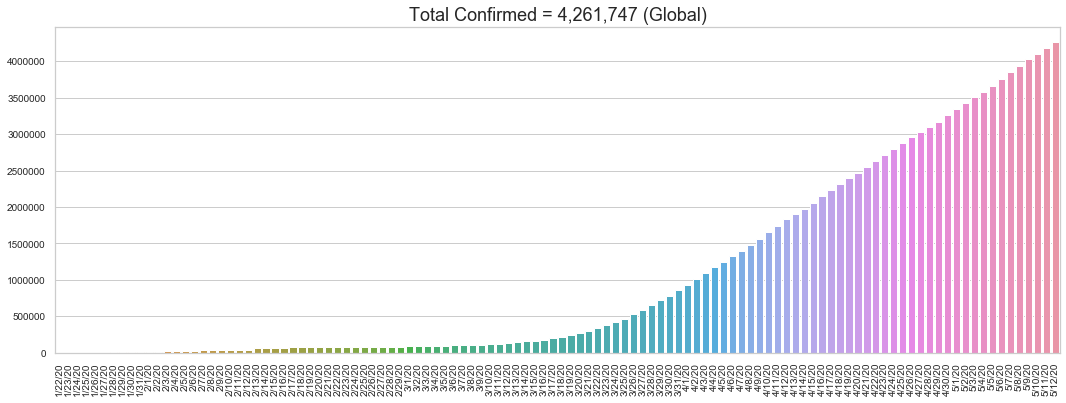

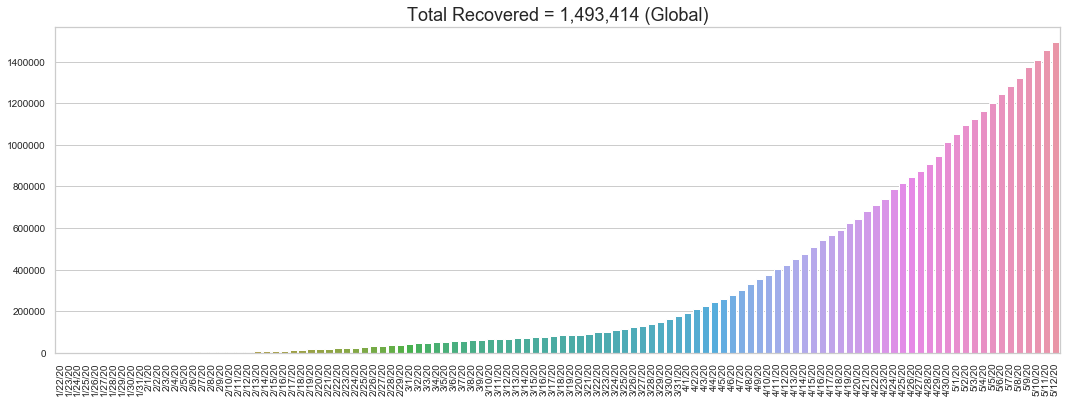

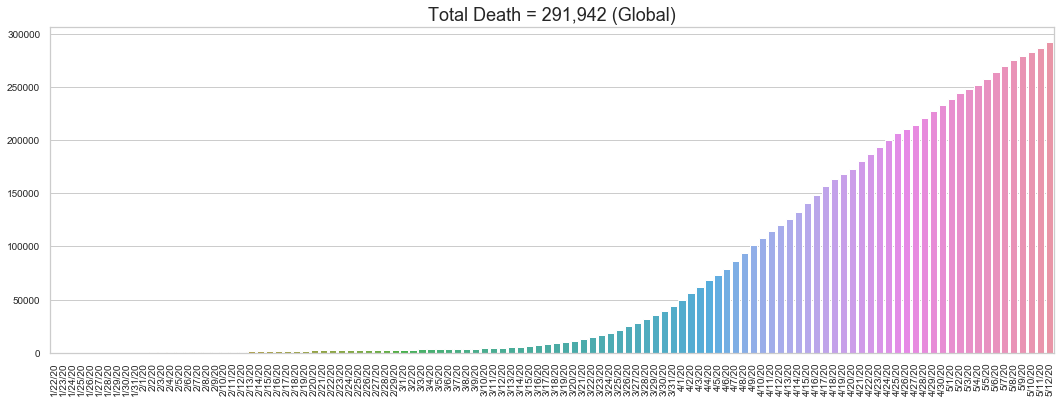

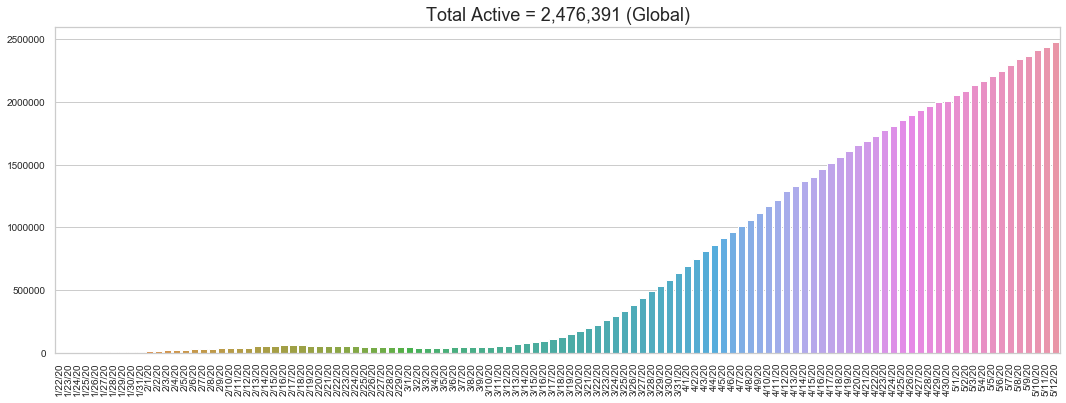

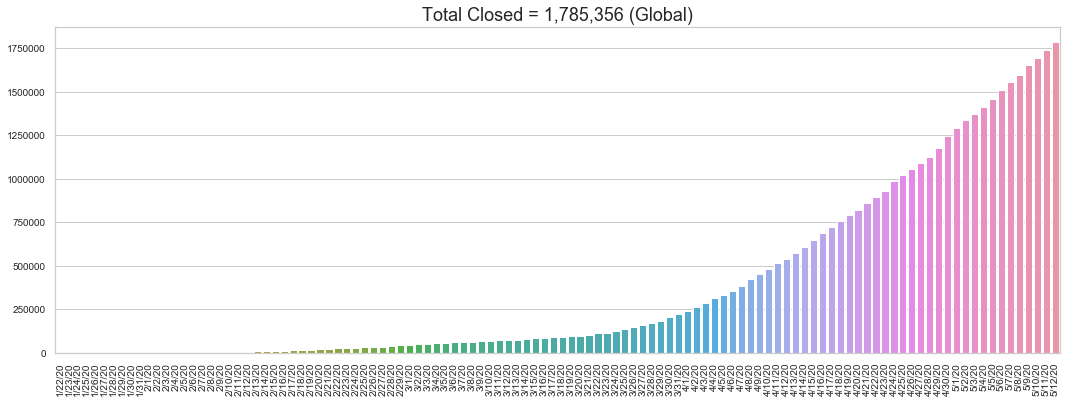

In [118]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)



filename = output_visualization_dir_global + "confirmed_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=time_series_covid19_confirmed_global[data_cols_new_format].sum())
plt.title("Total Confirmed = " + f'{time_series_covid19_confirmed_global[last_day].sum():,}' +" (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "recovered_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=time_series_covid19_recovered_global[data_cols_new_format].sum())
plt.title("Total Recovered = " + f'{time_series_covid19_recovered_global[last_day].sum():,}' +" (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "death_global.png"    

if os.path.exists(filename):
    os.remove(filename)


sns.barplot(x=data_cols_new_format, y=time_series_covid19_deaths_global[data_cols_new_format].sum())
plt.title("Total Death = " + f'{time_series_covid19_deaths_global[last_day].sum():,}' +" (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "active_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=time_series_covid19_confirmed_global[data_cols_new_format].sum() - (time_series_covid19_recovered_global[data_cols_new_format].sum() + time_series_covid19_deaths_global[data_cols_new_format].sum()))
plt.title("Total Active = " + f'{(time_series_covid19_confirmed_global[last_day].sum() - (time_series_covid19_recovered_global[last_day].sum() + time_series_covid19_deaths_global[last_day].sum())):,}' +" (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "closed_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=time_series_covid19_recovered_global[data_cols_new_format].sum() + time_series_covid19_deaths_global[data_cols_new_format].sum())
plt.title("Total Closed = " + f'{(time_series_covid19_recovered_global[last_day].sum() + time_series_covid19_deaths_global[last_day].sum()):,}' +" (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()




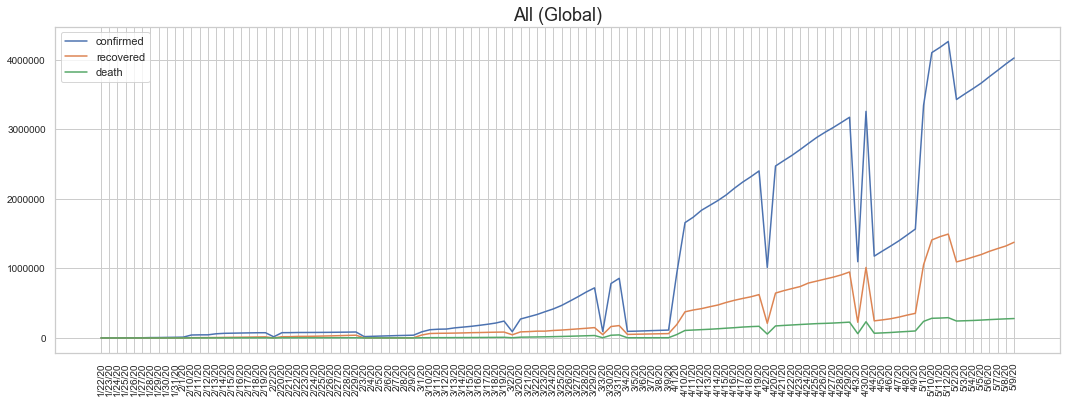

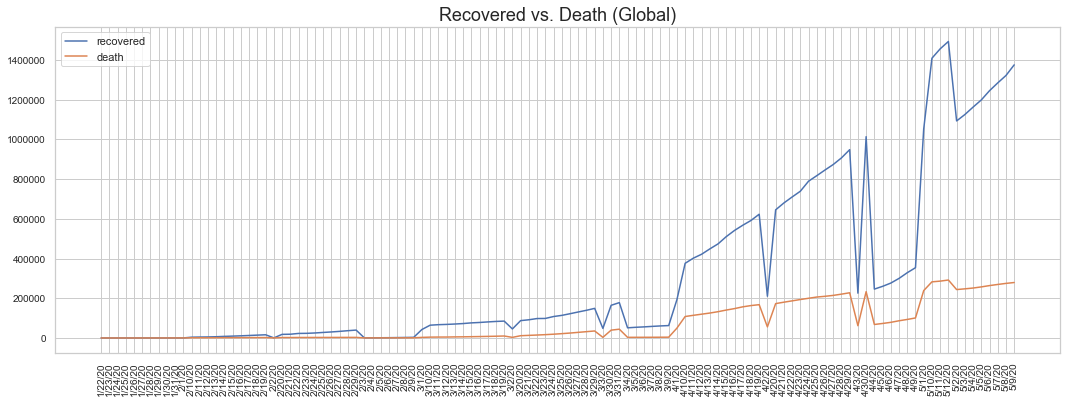

In [119]:
filename = output_visualization_dir_global + "all_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.lineplot(x=data_cols_new_format, y=time_series_covid19_confirmed_global[data_cols_new_format].sum(), label="confirmed")
sns.lineplot(x=data_cols_new_format, y=time_series_covid19_recovered_global[data_cols_new_format].sum(), label="recovered")
sns.lineplot(x=data_cols_new_format, y=time_series_covid19_deaths_global[data_cols_new_format].sum(), label="death")
plt.title("All (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "recovered_death_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.lineplot(x=data_cols_new_format, y=time_series_covid19_recovered_global[data_cols_new_format].sum(), label="recovered")
sns.lineplot(x=data_cols_new_format, y=time_series_covid19_deaths_global[data_cols_new_format].sum(), label="death")
plt.title("Recovered vs. Death (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()

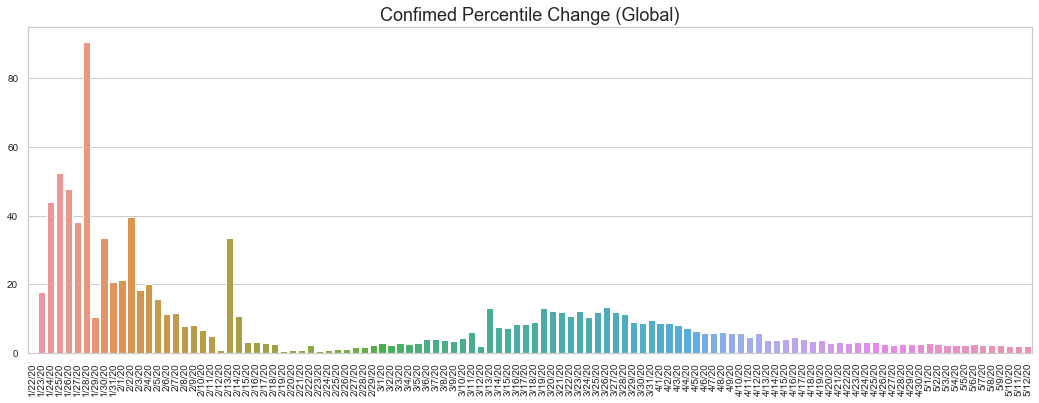

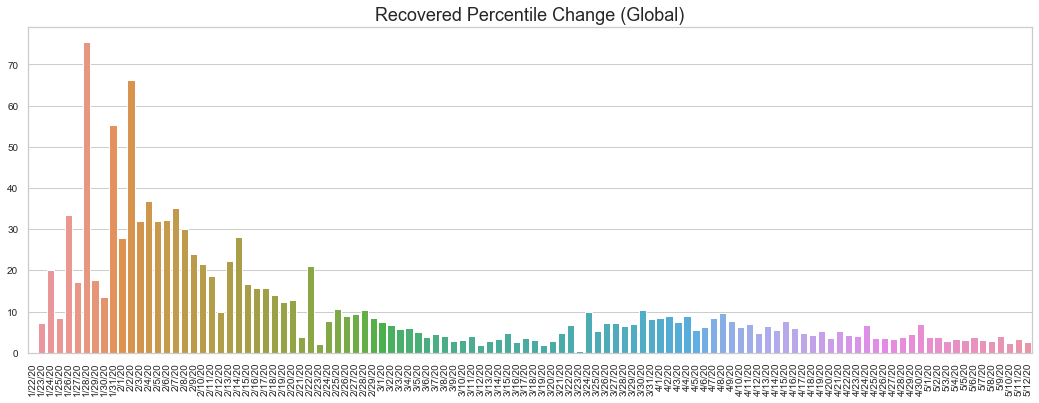

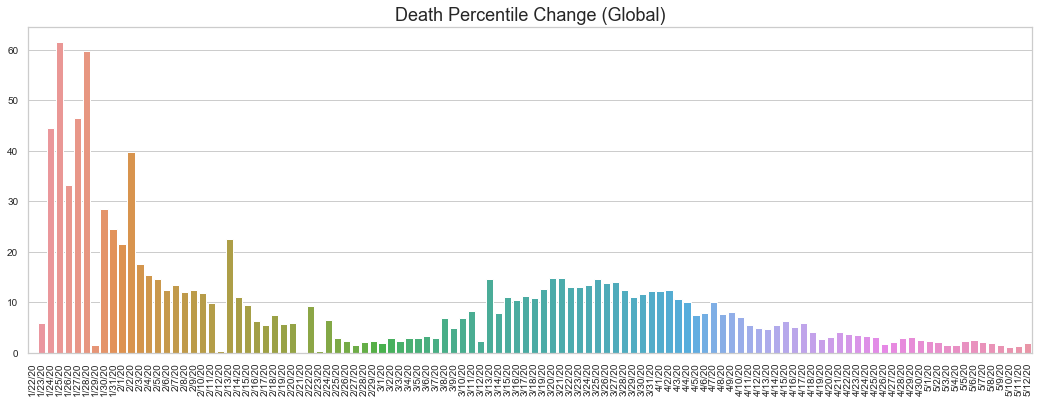

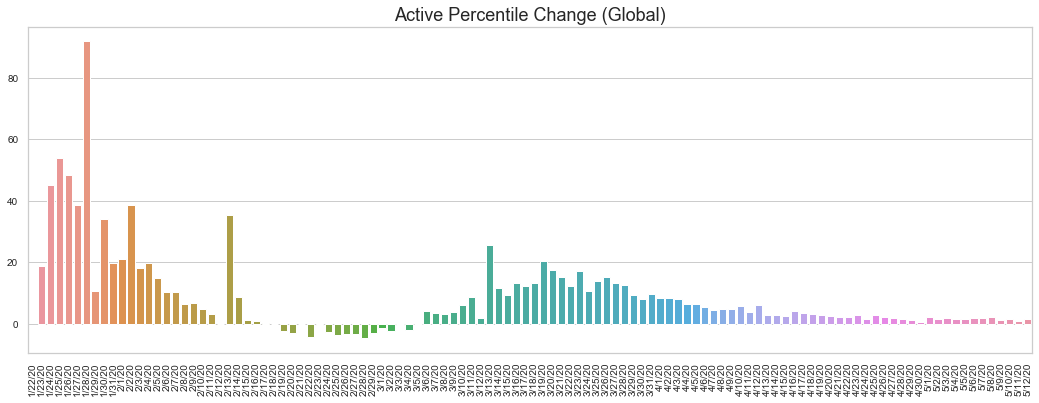

In [106]:
filename = output_visualization_dir_global + "confirmed_pct_chng_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=time_series_covid19_confirmed_global[data_cols_new_format].sum().pct_change(periods=1)*100)
plt.title("Confimed Percentile Change (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "recovered_pct_chng_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=time_series_covid19_recovered_global[data_cols_new_format].sum().pct_change(periods=1)*100)
plt.title("Recovered Percentile Change (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()



filename = output_visualization_dir_global + "death_pct_chng_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=time_series_covid19_deaths_global[data_cols_new_format].sum().pct_change(periods=1)*100)
plt.title("Death Percentile Change (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()



filename = output_visualization_dir_global + "active_pct_chng_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=(time_series_covid19_confirmed_global[data_cols_new_format].sum() - (time_series_covid19_recovered_global[data_cols_new_format].sum() + time_series_covid19_deaths_global[data_cols_new_format].sum())).pct_change(periods=1)*100)
plt.title("Active Percentile Change (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()



In [121]:
df = time_series_covid19_deaths_global[data_cols_new_format].sum()/(time_series_covid19_recovered_global[data_cols_new_format].sum() + time_series_covid19_deaths_global[data_cols_new_format].sum())*100
df["1/22/20"]

37.77777777777778

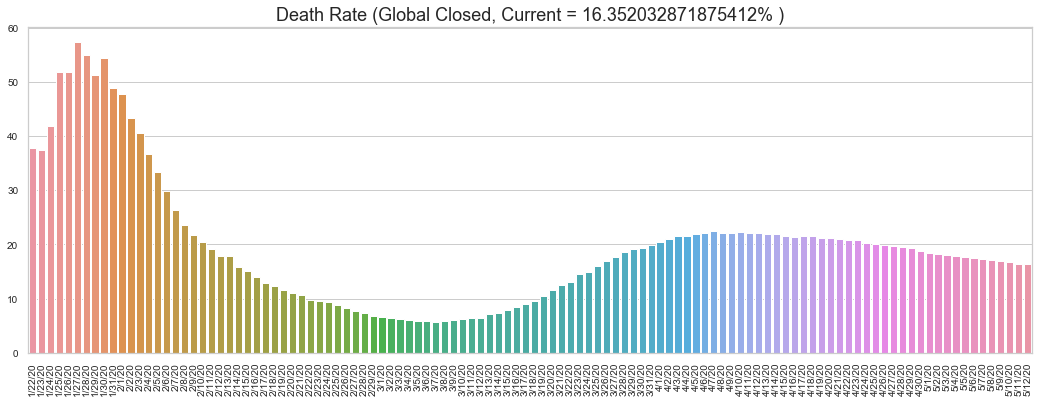

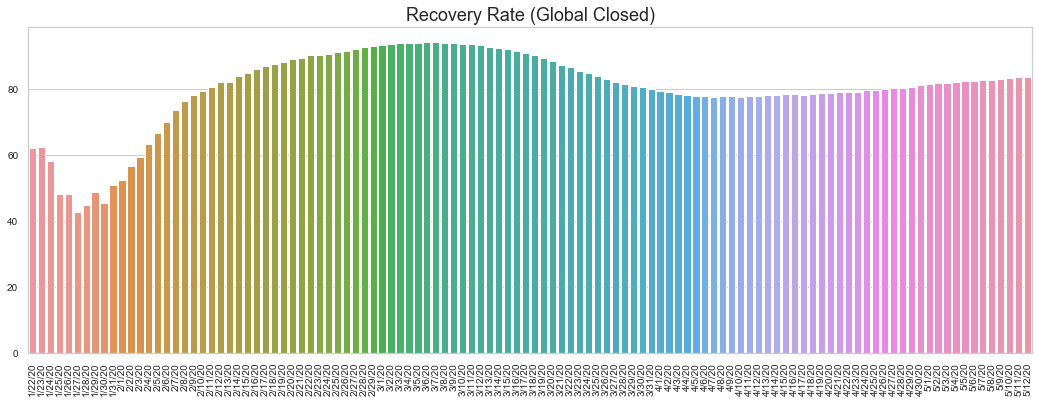

In [124]:
filename = output_visualization_dir_global + "death_rate_global.png"    

if os.path.exists(filename):
    os.remove(filename)

df = time_series_covid19_deaths_global[data_cols_new_format].sum()/(time_series_covid19_recovered_global[data_cols_new_format].sum() + time_series_covid19_deaths_global[data_cols_new_format].sum())*100
sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format])
plt.title("Death Rate (Global Closed, Current = " + str(df[last_day]) + "% )")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "recovery_rate_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=(time_series_covid19_recovered_global[data_cols_new_format].sum()/(time_series_covid19_recovered_global[data_cols_new_format].sum() + time_series_covid19_deaths_global[data_cols_new_format].sum())*100))
plt.title("Recovery Rate (Global Closed)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


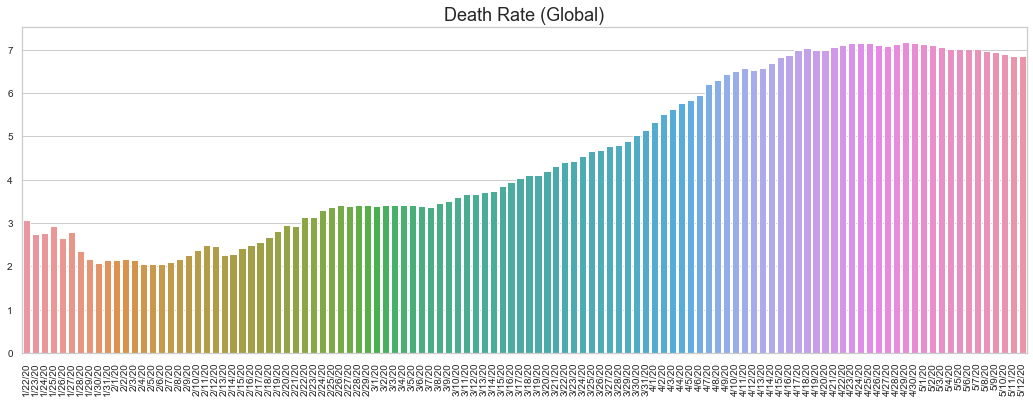

TypeError: text() missing 2 required positional arguments: 'y' and 's'

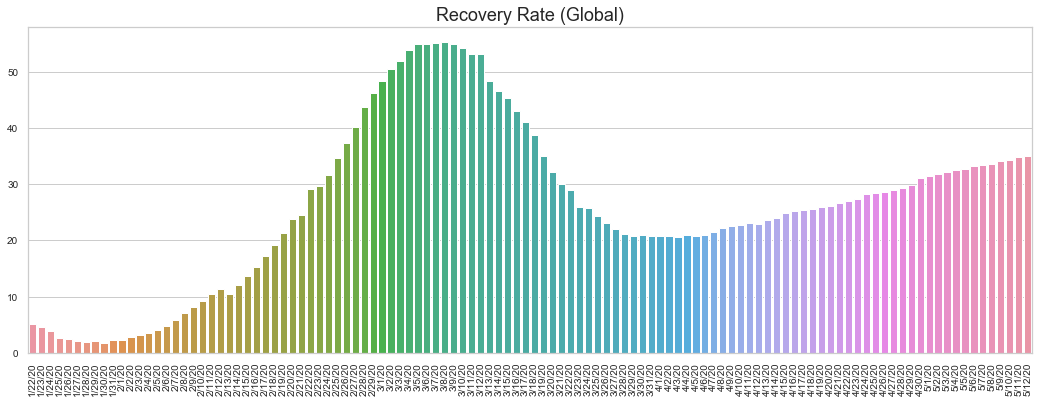

In [110]:
filename = output_visualization_dir_global + "cum_death_rate_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=(time_series_covid19_deaths_global[data_cols_new_format].sum()/time_series_covid19_confirmed_global[data_cols_new_format].sum()*100))
plt.title("Death Rate (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "cum_recovery_rate_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=(time_series_covid19_recovered_global[data_cols_new_format].sum()/time_series_covid19_confirmed_global[data_cols_new_format].sum()*100))
plt.title("Recovery Rate (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\visualization\country\Afghanistan\confirmed.png


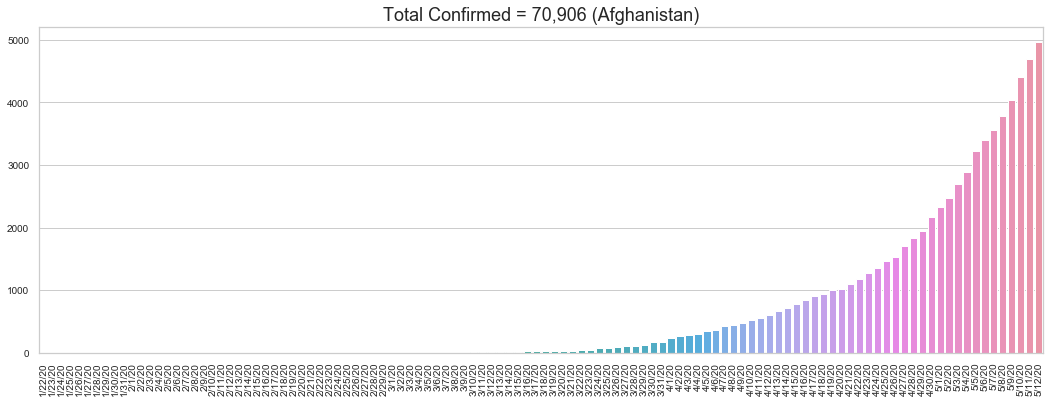

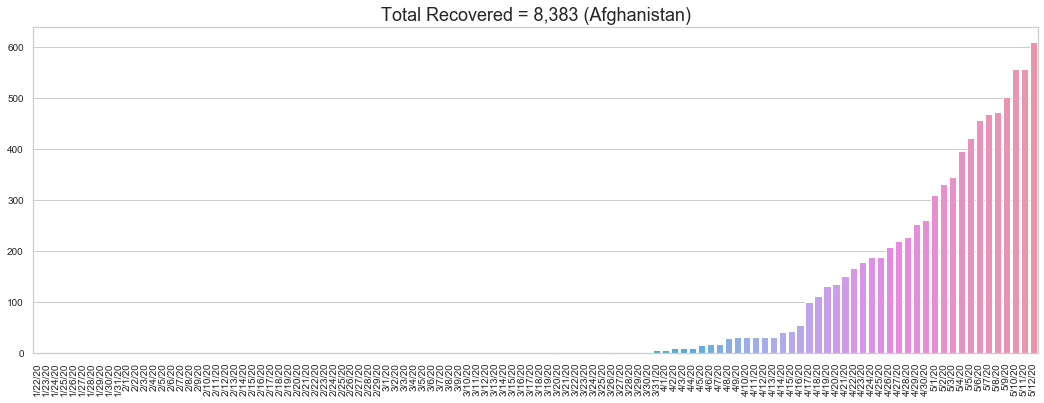

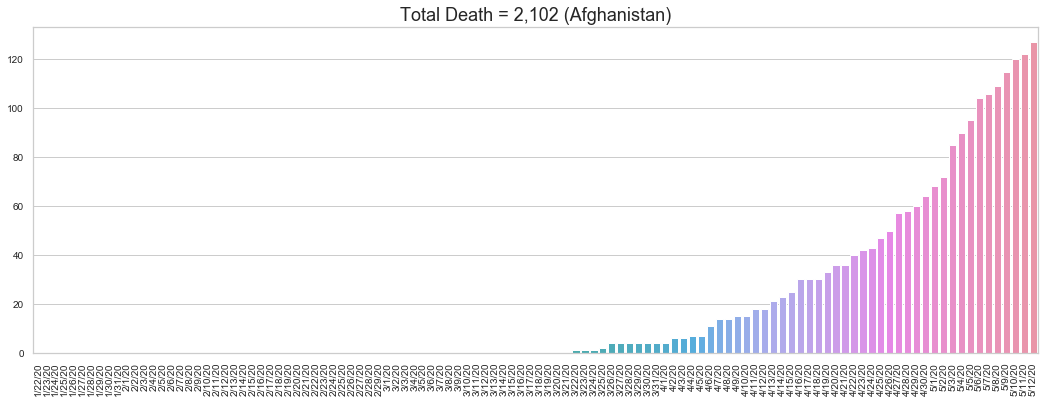

C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\visualization\country\Albania\confirmed.png


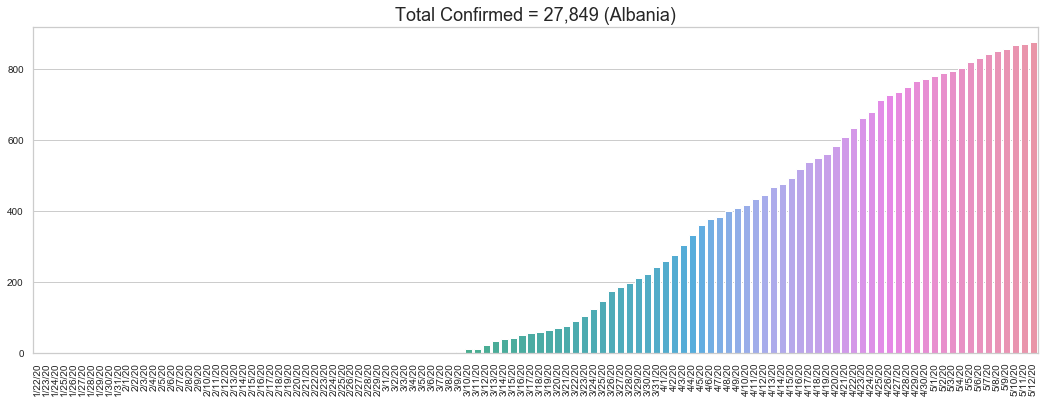

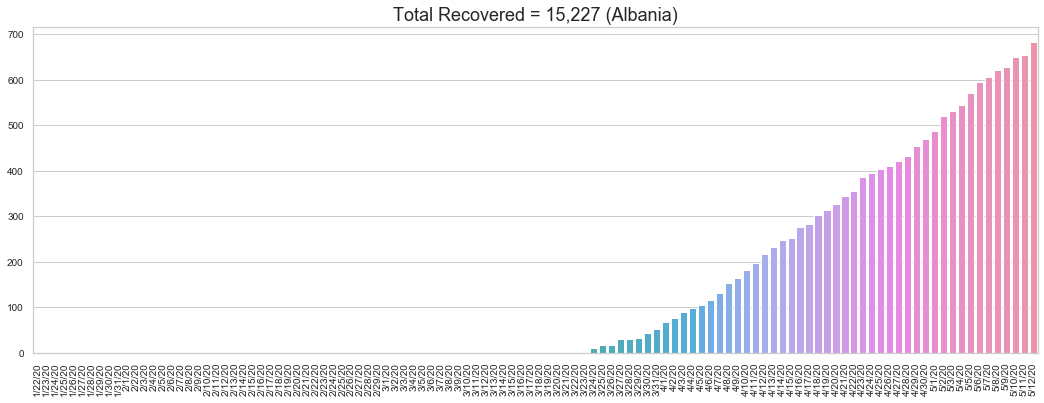

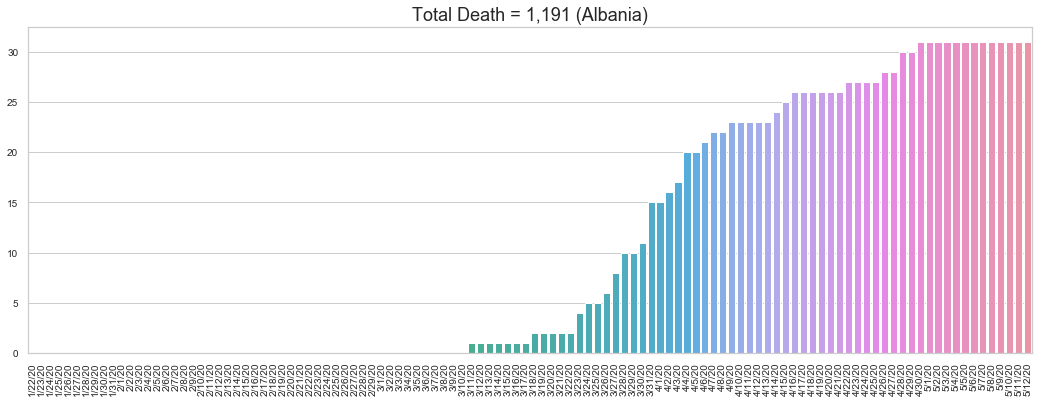

C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\visualization\country\Algeria\confirmed.png


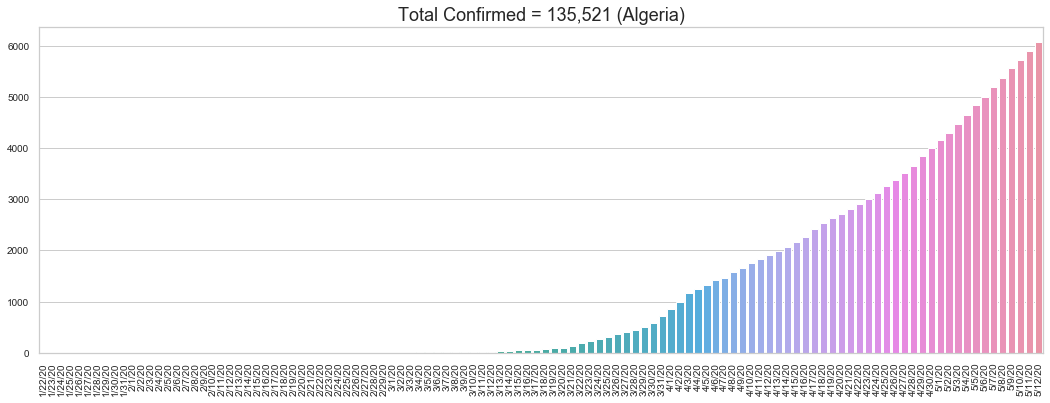

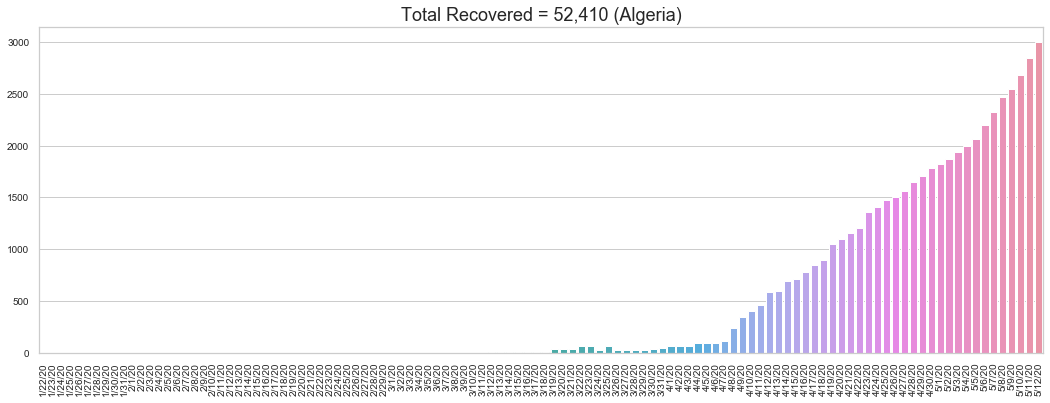

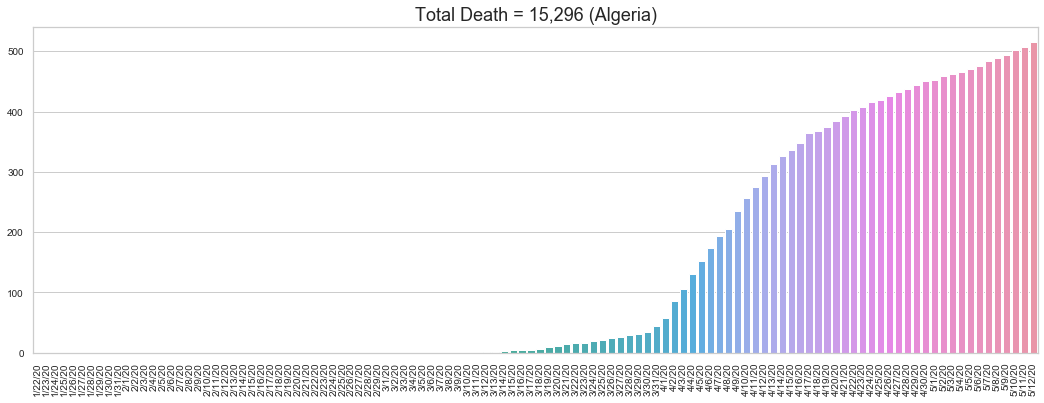

C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\visualization\country\Andorra\confirmed.png


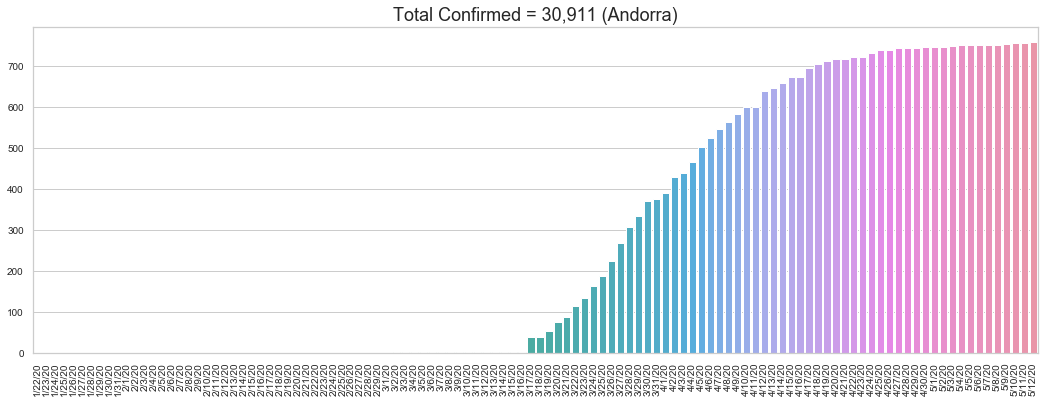

KeyboardInterrupt: 

In [109]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


for country in countries:
    df = time_series_covid19_confirmed_global[time_series_covid19_confirmed_global["Country/Region"]==country]
    
    current_dir = output_visualization_dir_country + re.sub("[^a-zA-Z]", "", country) + "\\"
    filename = current_dir + "confirmed.png"   

    if os.path.exists(filename):
        os.remove(filename)

    sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format].sum())
    plt.title("Total Confirmed = " + f'{df[data_cols_new_format].sum().sum():,}' + " (" + country + ")")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    

    df = time_series_covid19_recovered_global[time_series_covid19_recovered_global["Country/Region"]==country]
    
    filename = current_dir + "recovered.png"    

    if os.path.exists(filename):
        os.remove(filename)

    sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format].sum())
    plt.title("Total Recovered = " + f'{df[data_cols_new_format].sum().sum():,}' + " (" + country + ")")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

    
    df = time_series_covid19_deaths_global[time_series_covid19_deaths_global["Country/Region"]==country]
    
    filename = current_dir + "death.png"    

    if os.path.exists(filename):
        os.remove(filename)

    sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format].sum())
    plt.title("Total Death = " + f'{df[data_cols_new_format].sum().sum():,}' + " (" + country + ")")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()


C:\Users\Andromeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



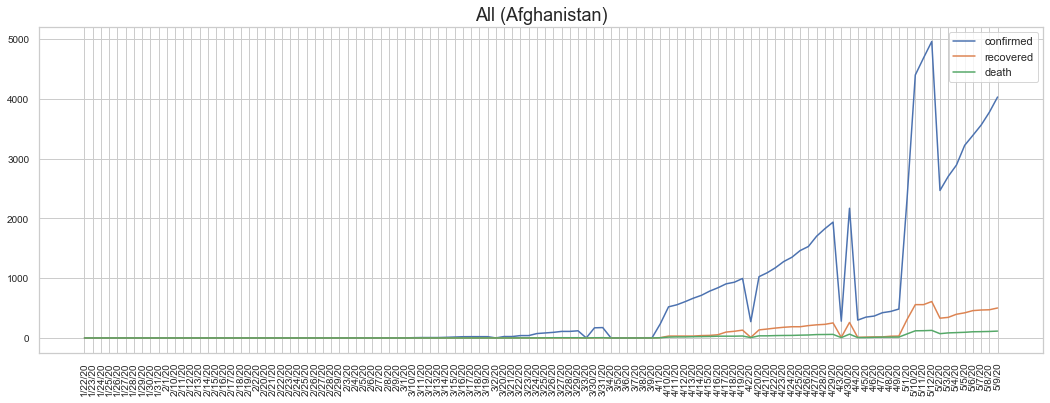

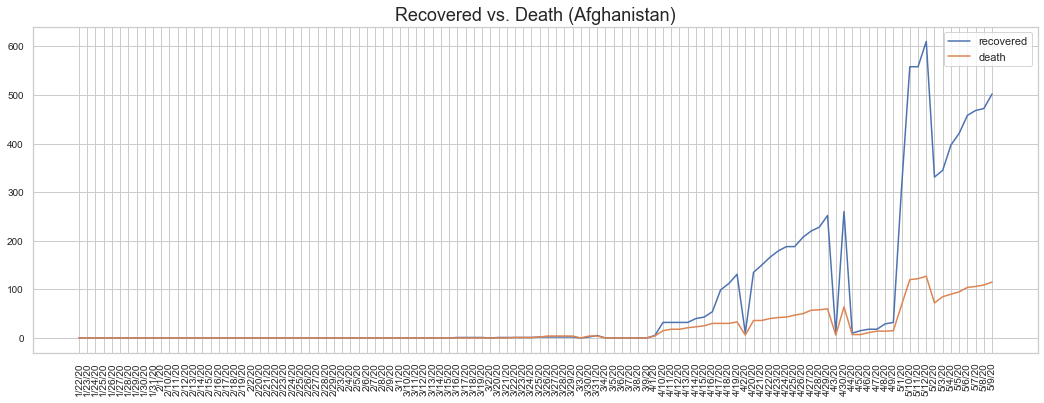

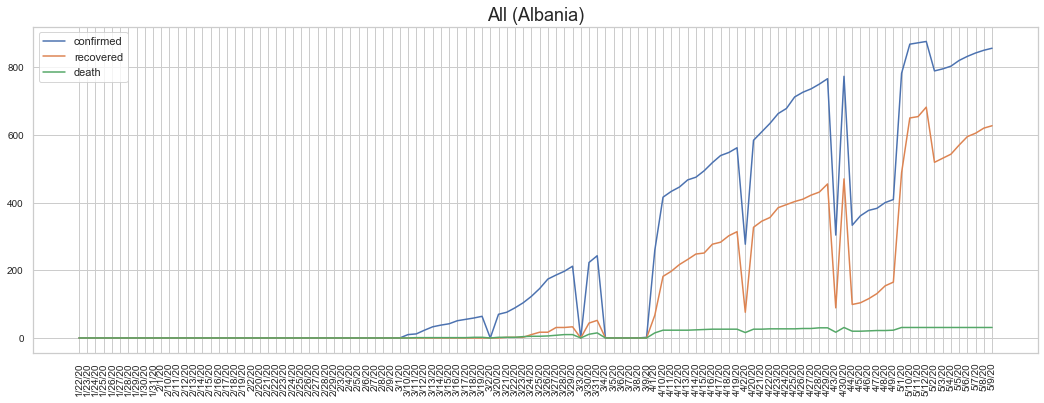

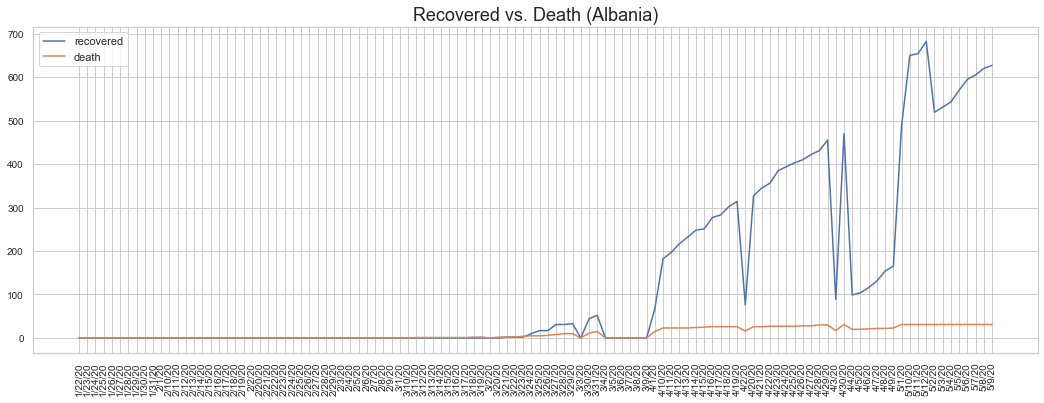

KeyboardInterrupt: 

In [115]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


for country in countries:

    current_dir = output_visualization_dir_country + re.sub("[^a-zA-Z]", "", country) + "\\"
    
    filename = current_dir + "all.png"    

    if os.path.exists(filename):
        os.remove(filename)

    df = time_series_covid19_confirmed_global[time_series_covid19_confirmed_global["Country/Region"]==country]
    sns.lineplot(x=data_cols_new_format, y=df[data_cols_new_format].sum(), label="confirmed")
    
    df = time_series_covid19_recovered_global[time_series_covid19_confirmed_global["Country/Region"]==country]
    sns.lineplot(x=data_cols_new_format, y=df[data_cols_new_format].sum(), label="recovered")
    
    df = time_series_covid19_deaths_global[time_series_covid19_confirmed_global["Country/Region"]==country]
    sns.lineplot(x=data_cols_new_format, y=df[data_cols_new_format].sum(), label="death")
    
    plt.title("All (" + country + ")")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()


    filename = current_dir + "recovered_death.png"    

    if os.path.exists(filename):
        os.remove(filename)

    df = time_series_covid19_recovered_global[time_series_covid19_recovered_global["Country/Region"]==country]
    sns.lineplot(x=data_cols_new_format, y=df[data_cols_new_format].sum(), label="recovered")
    
    df = time_series_covid19_deaths_global[time_series_covid19_deaths_global["Country/Region"]==country]
    sns.lineplot(x=data_cols_new_format, y=df[data_cols_new_format].sum(), label="death")
    
    plt.title("Recovered vs. Death (" + country + ")")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

In [ ]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)



filename = output_visualization_dir_global + "confirmed_global.png"    

if os.path.exists(filename):
    os.remove(filename)

sns.barplot(x=data_cols_new_format, y=time_series_covid19_confirmed_global[data_cols_new_format].sum())
plt.title("Total Confirmed (Global)")
plt.xticks(rotation=90)
plt.savefig(filename, bbox_inches="tight")
plt.show()


# filename = output_visualization_dir_global + "recovered_global.png"    

# if os.path.exists(filename):
#     os.remove(filename)

# sns.barplot(x=data_cols_new_format, y=time_series_covid19_recovered_global[data_cols_new_format].sum())
# plt.title("Total Recovered (Global)")
# plt.xticks(rotation=90)
# plt.savefig(filename, bbox_inches="tight")
# plt.show()


# filename = output_visualization_dir_global + "death_global.png"    

# if os.path.exists(filename):
#     os.remove(filename)

# sns.barplot(x=data_cols_new_format, y=time_series_covid19_deaths_global[data_cols_new_format].sum())
# plt.title("Total Death (Global)")
# plt.xticks(rotation=90)
# plt.savefig(filename, bbox_inches="tight")
# plt.show()


# filename = output_visualization_dir_global + "active_global.png"    

# if os.path.exists(filename):
#     os.remove(filename)

# sns.barplot(x=data_cols_new_format, y=time_series_covid19_confirmed_global[data_cols_new_format].sum() - (time_series_covid19_recovered_global[data_cols_new_format].sum() + time_series_covid19_deaths_global[data_cols_new_format].sum()))
# plt.title("Total Active (Global)")
# plt.xticks(rotation=90)
# plt.savefig(filename, bbox_inches="tight")
# plt.show()


# filename = output_visualization_dir_global + "closed_global.png"    

# if os.path.exists(filename):
#     os.remove(filename)

# sns.barplot(x=data_cols_new_format, y=time_series_covid19_recovered_global[data_cols_new_format].sum() + time_series_covid19_deaths_global[data_cols_new_format].sum())
# plt.title("Total Closed (Global)")
# plt.xticks(rotation=90)
# plt.savefig(filename, bbox_inches="tight")
# plt.show()




In [58]:
import plotly.graph_objects as go

# # fig = px.bar(data_canada, x='year', y='pop')
# fig = px.bar(x=data_cols_new_format, y=time_series_covid19_confirmed_global[data_cols_new_format].sum().pct_change(periods=30)*100)

# fig.show()


fig = go.Figure()

fig.add_trace(go.Bar(x=data_cols_new_format, y=time_series_covid19_confirmed_global[data_cols_new_format].sum().pct_change(periods=1)*100))

fig.update_layout(
    title="Confimed Percentile Change (Global)",
    xaxis_title="Date",
    yaxis_title="Percentile Change"
)

fig.show()

In [155]:
def time_series_plot(data, cols, title, params, filename):
    plt.rcParams.update(params)
    
    if os.path.exists(filename):
        os.remove(filename)
    
    df = pd.DataFrame()
    df["Date"] = cols
    df["Count"] = data[cols].sum().values

    sns.barplot(x="Date", y = "Count", data=df)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    
    df["Percent Change"] = df["Count"].pct_change(periods=2)
    

    sns.barplot(x="Date", y = "pct_change", data=df)
    plt.title(title + (" (Percent Chnage)"))
    plt.xticks(rotation=90)
    plt.savefig(filename[:-4]+"pct_change.png", bbox_inches="tight")
    plt.show()
    
    

In [156]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

In [157]:
time_series_covid19_confirmed_global = pd.read_csv(input_dir + "time_series_covid19_confirmed_global.csv")
time_series_covid19_recovered_global = pd.read_csv(input_dir + "time_series_covid19_recovered_global.csv")
time_series_covid19_deaths_global    = pd.read_csv(input_dir + "time_series_covid19_deaths_global.csv")

time_series_covid19_confirmed_US = pd.read_csv(input_dir + "time_series_covid19_confirmed_US.csv")
# time_series_covid19_recovered_global = pd.read_csv(input_dir + "time_series_covid19_recovered_global.csv")
time_series_covid19_deaths_US    = pd.read_csv(input_dir + "time_series_covid19_deaths_US.csv")


# time_series_covid_19_confirmed = pd.read_csv(input_dir + "time_series_covid_19_confirmed.csv")
# time_series_covid_19_recovered = pd.read_csv(input_dir + "time_series_covid_19_recovered.csv")
# time_series_covid_19_deaths    = pd.read_csv(input_dir + "time_series_covid_19_deaths.csv")

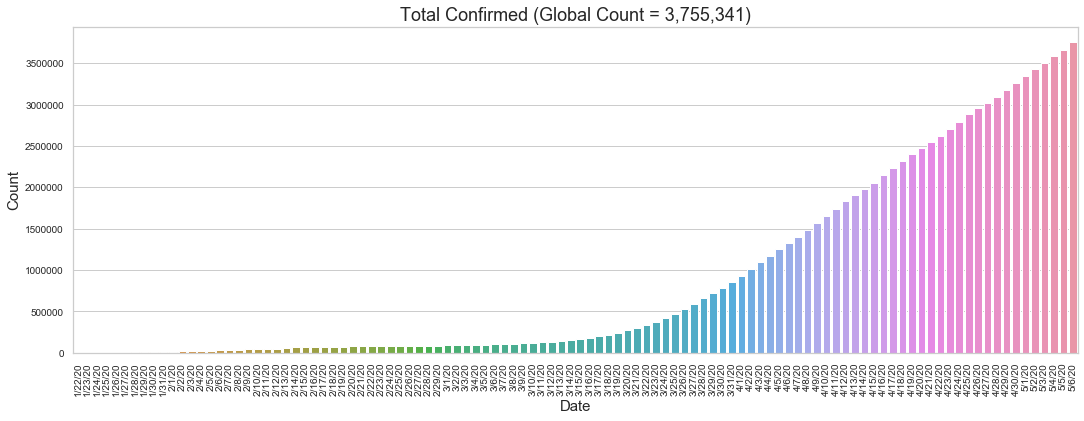

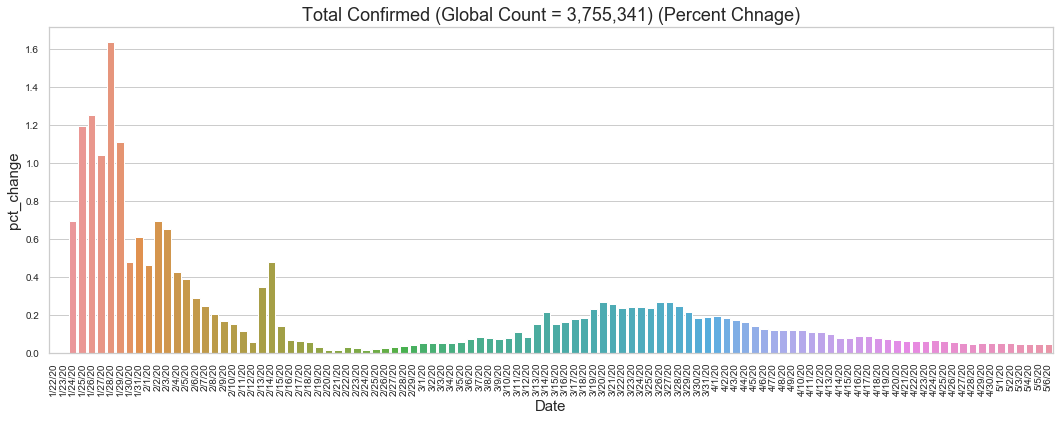

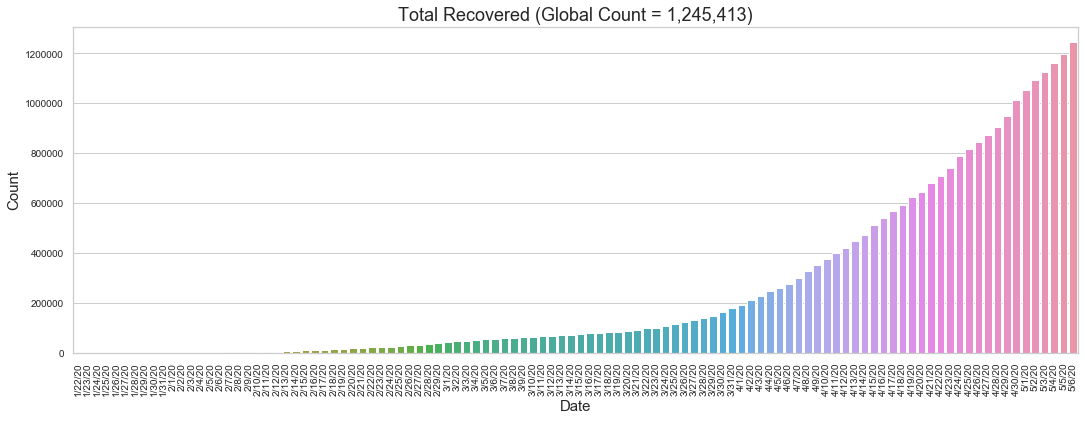

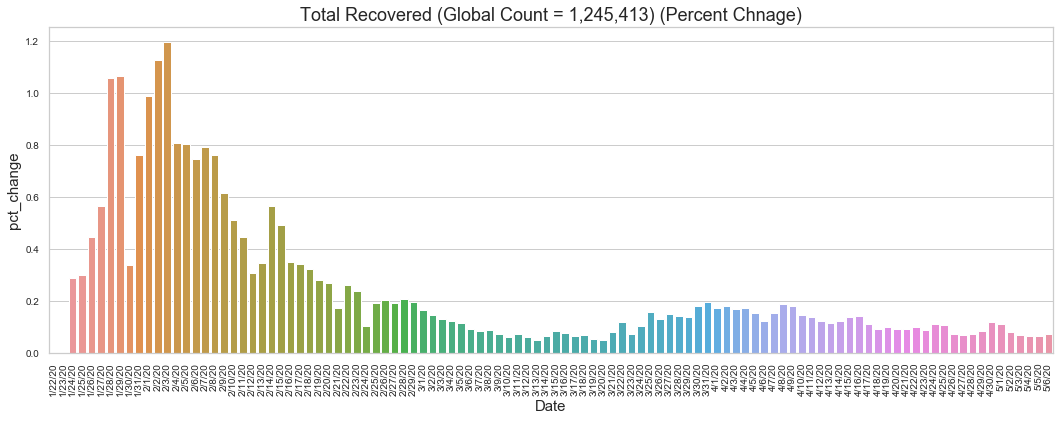

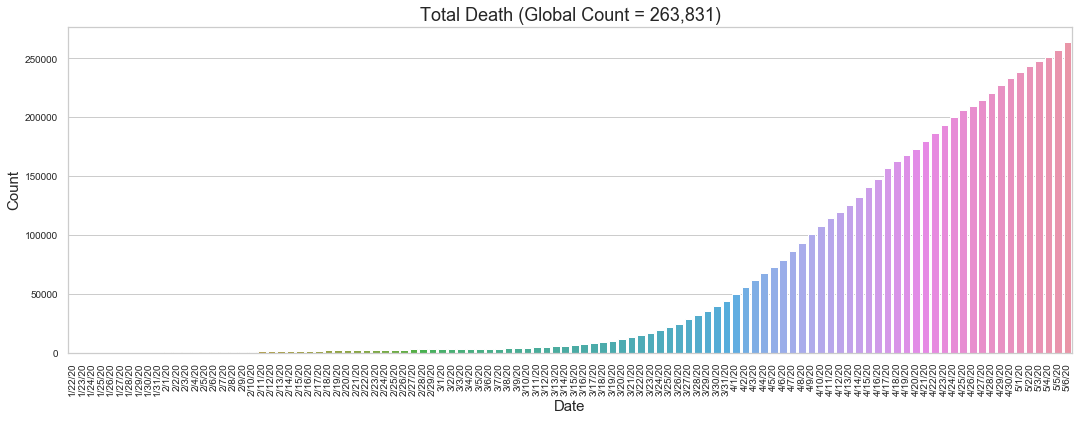

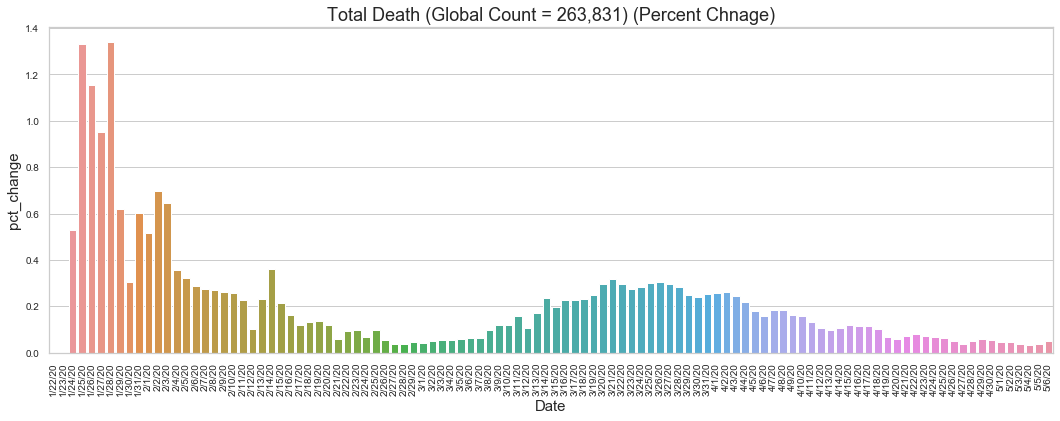

In [158]:
df = time_series_covid19_confirmed_global
title = "Total Confirmed (Global Count = " + "{:,d}".format(df[last_day].sum()) + ")"
filename = output_visualization_dir_global + "confirmed_global.png"  
time_series_plot(df, data_cols_new_format, title, params, filename)


df = time_series_covid19_recovered_global
title = "Total Recovered (Global Count = " + "{:,d}".format(df[last_day].sum()) + ")"
filename = output_visualization_dir_global + "recovered_global.png"  
time_series_plot(df, data_cols_new_format, title, params, filename)

df = time_series_covid19_deaths_global
title = "Total Death (Global Count = " + "{:,d}".format(df[last_day].sum()) + ")"
filename = output_visualization_dir_global + "death_global.png"  
time_series_plot(df, data_cols_new_format, title, params, filename)

In [115]:
import plotly.express as px

fig = px.bar(time_series_covid19_confirmed_global_country, y="Country/Region", x=last_day, height=400)
# sns.barplot(y="Country/Region", x=last_day, data=time_series_covid19_confirmed_global_country)
# plt.show()
fig.show()

In [100]:
total_confirmed = time_series_covid19_confirmed_global[last_day].sum()
total_recovered = time_series_covid19_recovered_global[last_day].sum()
total_death = time_series_covid19_deaths_global[last_day].sum()



3427343

In [106]:
time_series_covid19_confirmed_global_country = time_series_covid19_confirmed_global.groupby("Country/Region").sum().reset_index()
time_series_covid19_recovered_global_country = time_series_covid19_recovered_global.groupby("Country/Region").sum().reset_index()
time_series_covid19_deaths_global_country = time_series_covid19_deaths_global.groupby("Country/Region").sum().reset_index()
len(time_series_covid19_confirmed_global)

266

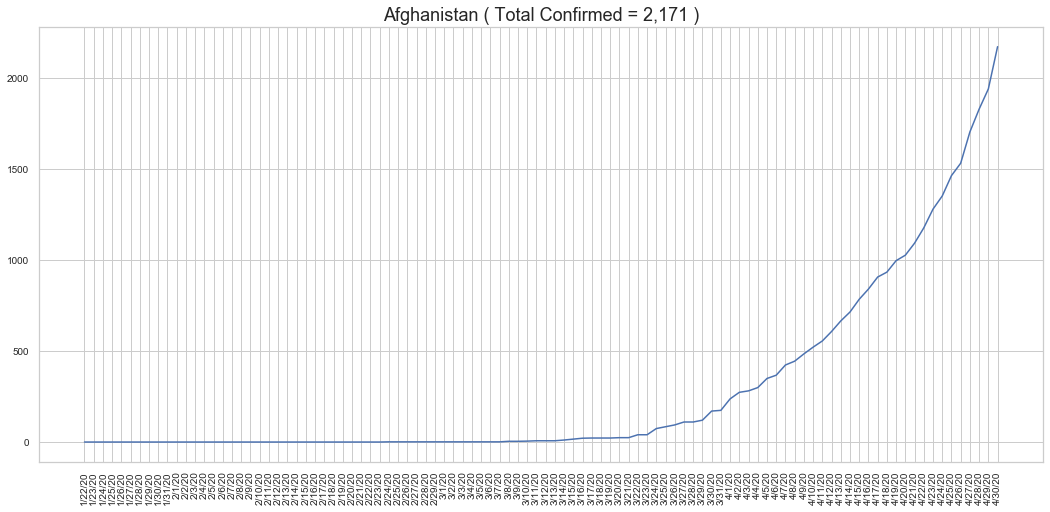

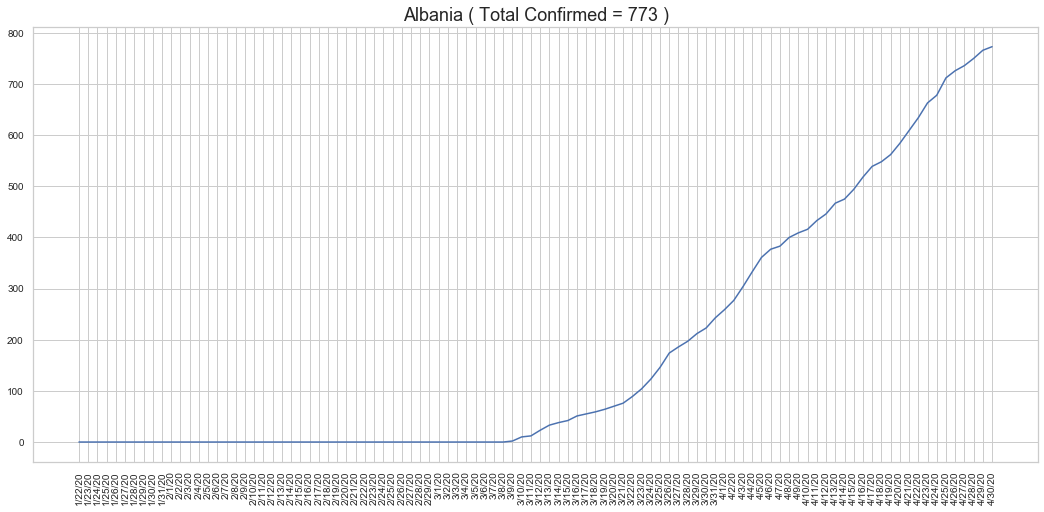

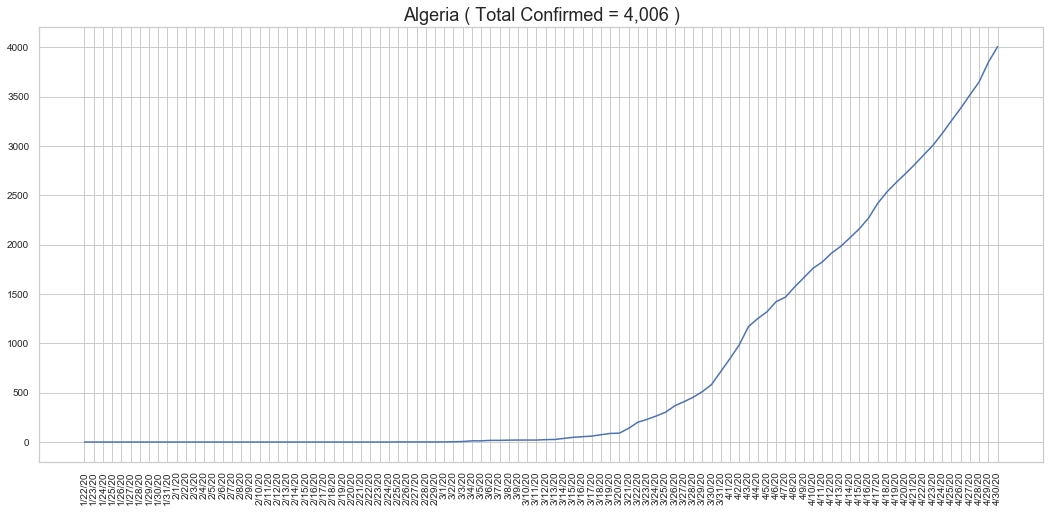

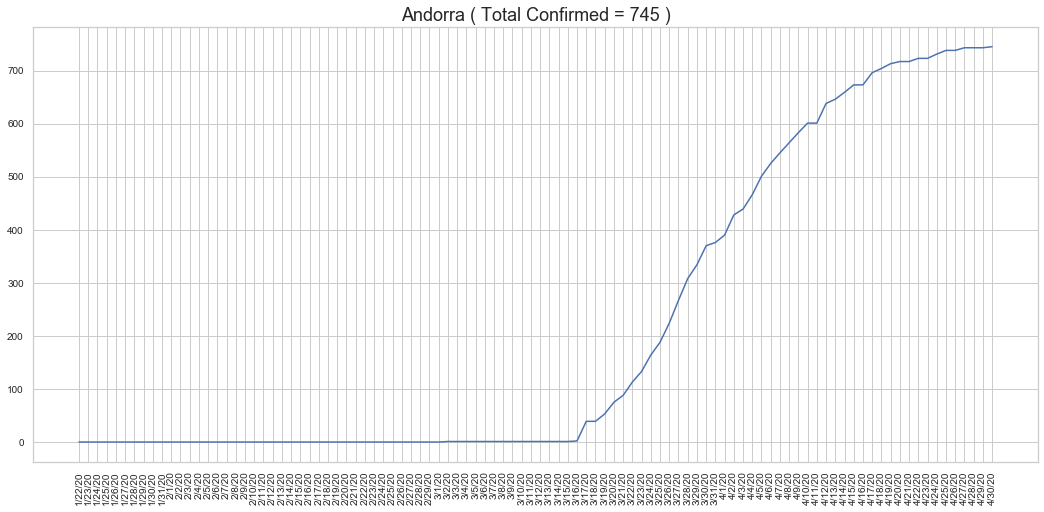

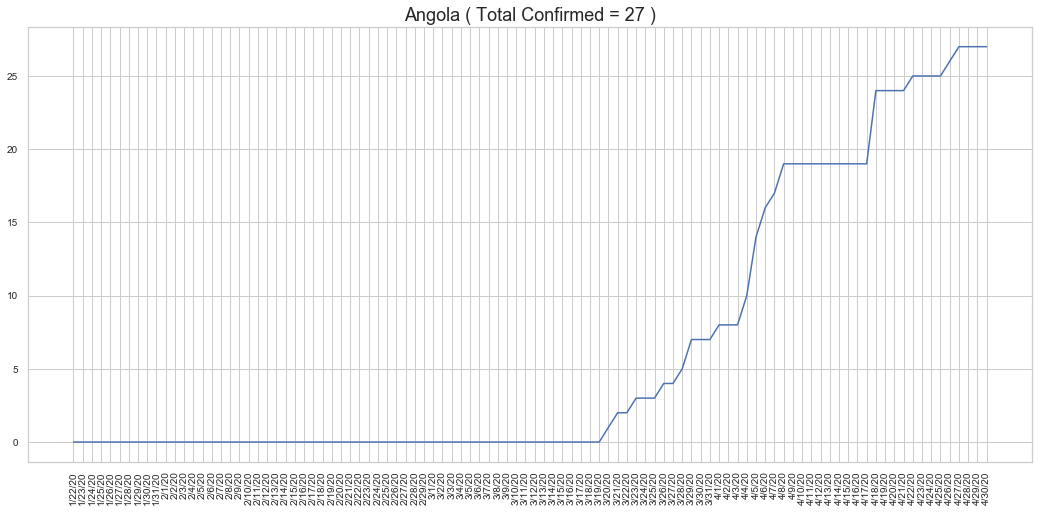

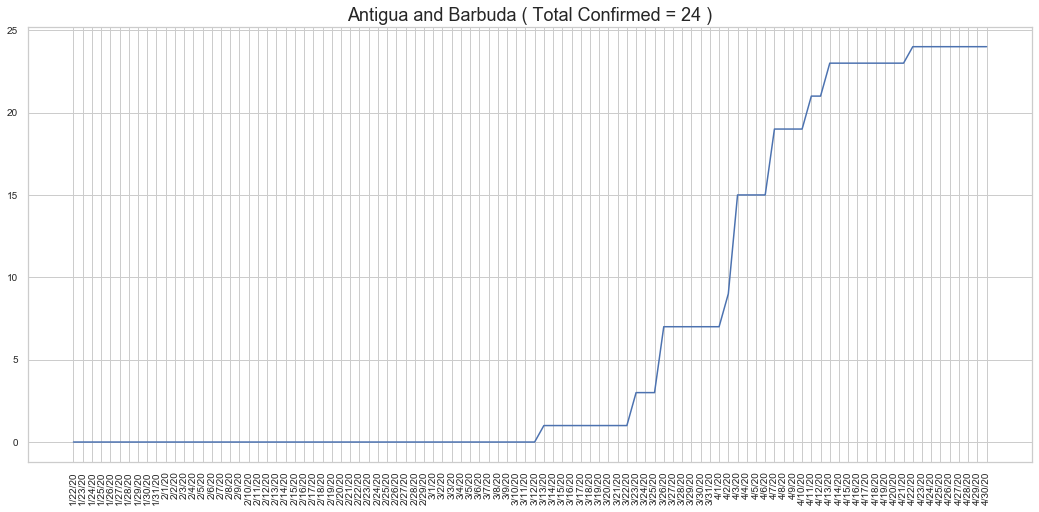

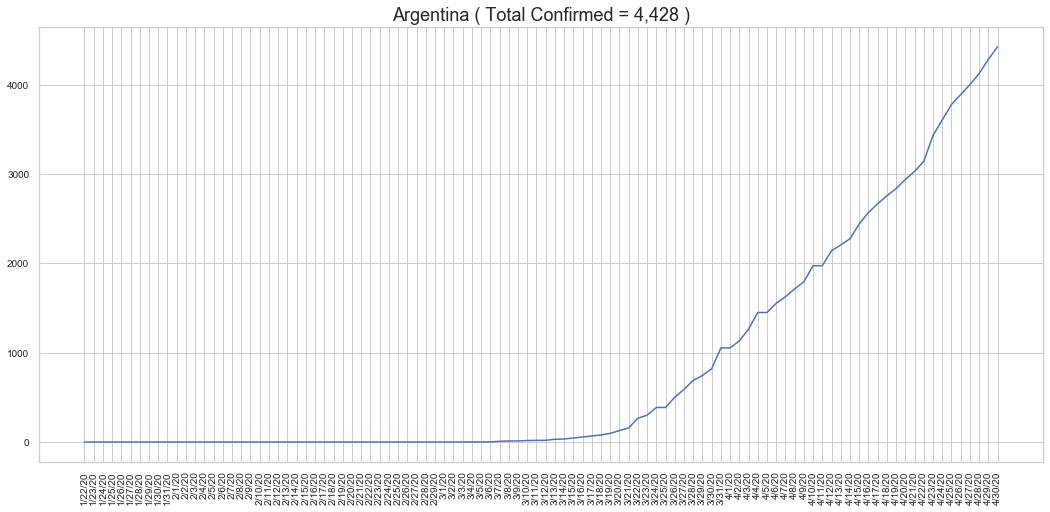

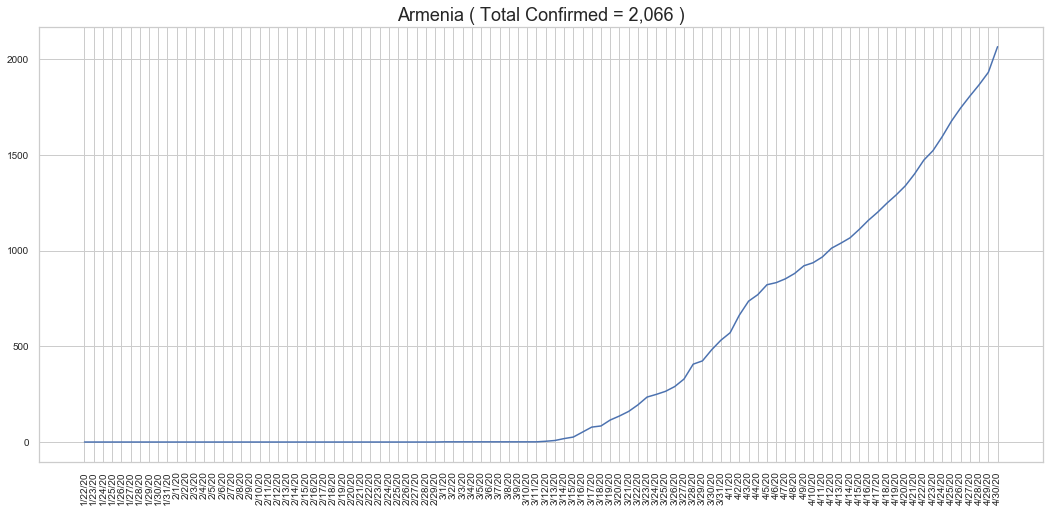

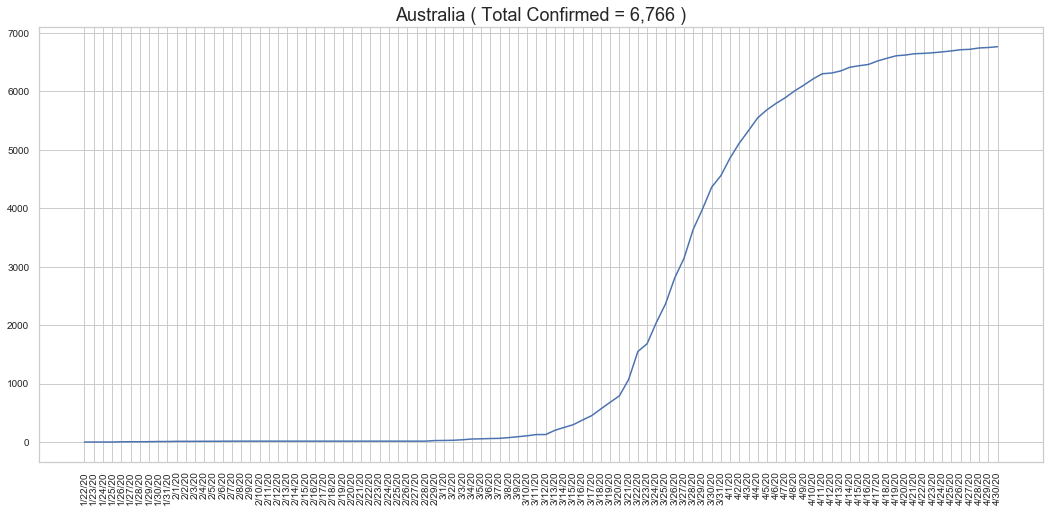

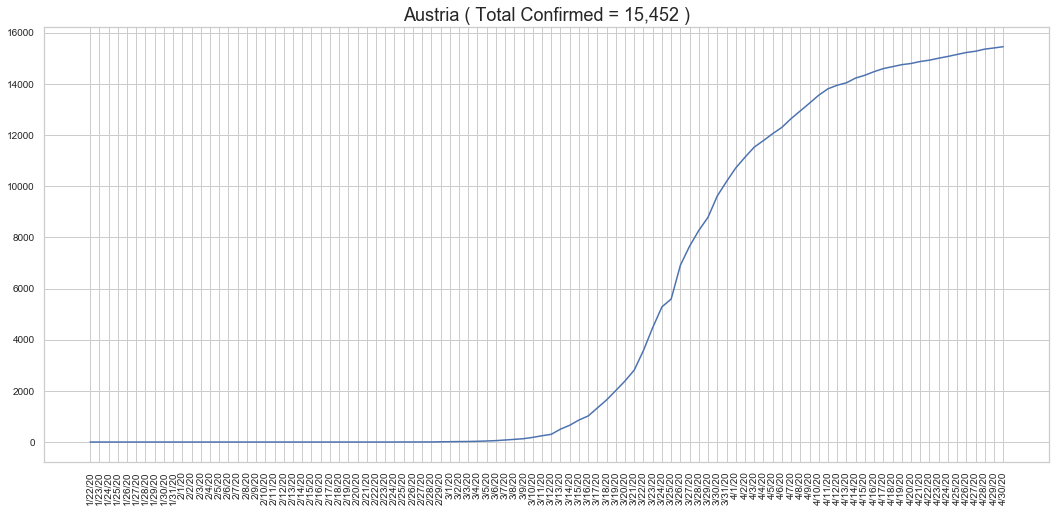

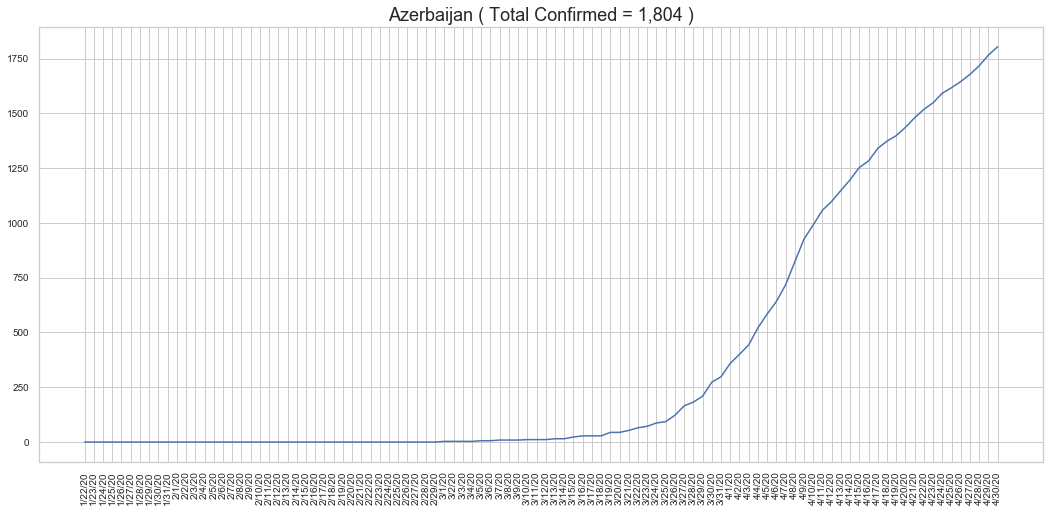

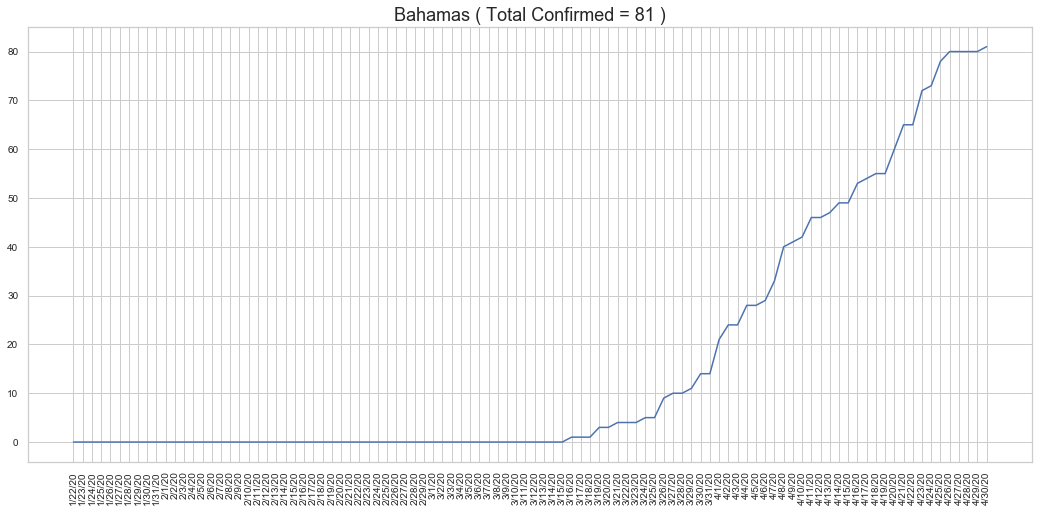

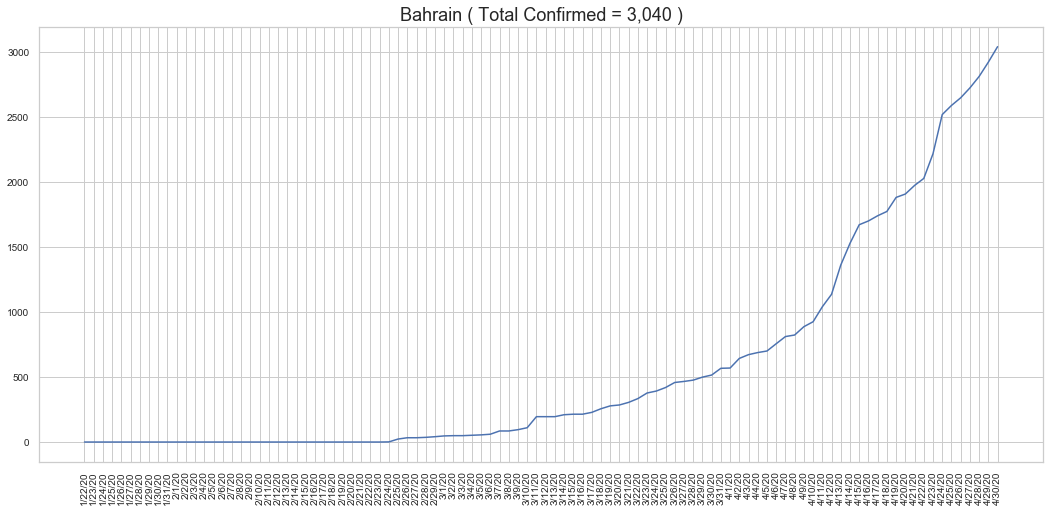

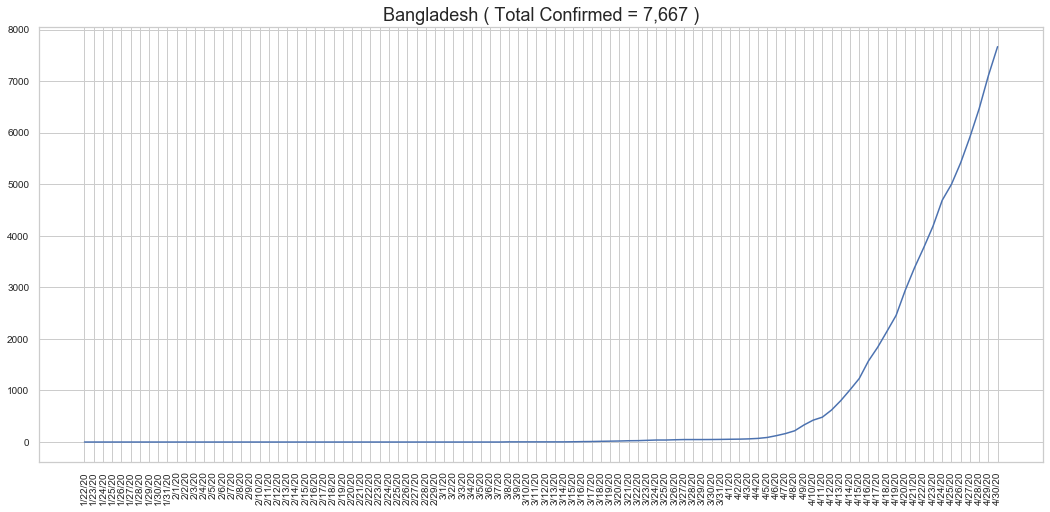

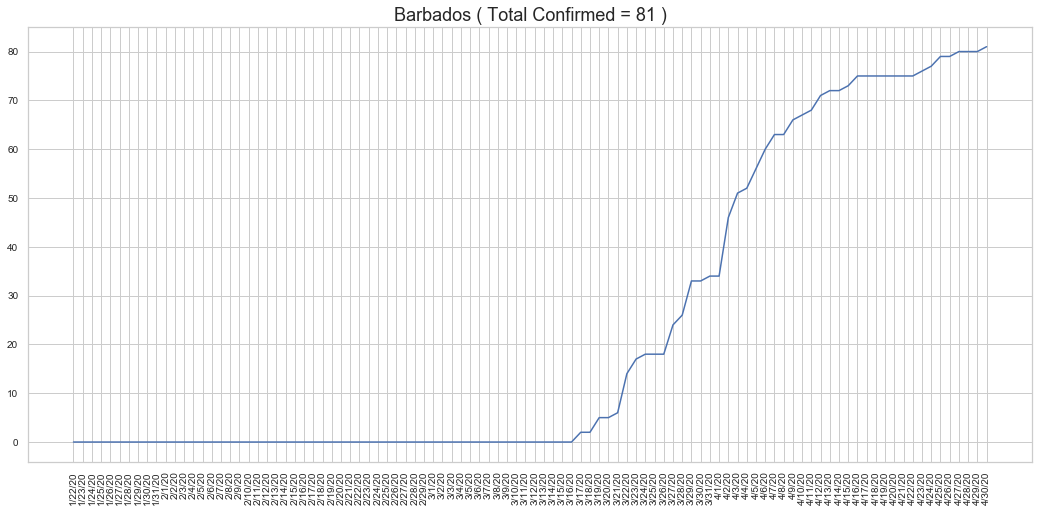

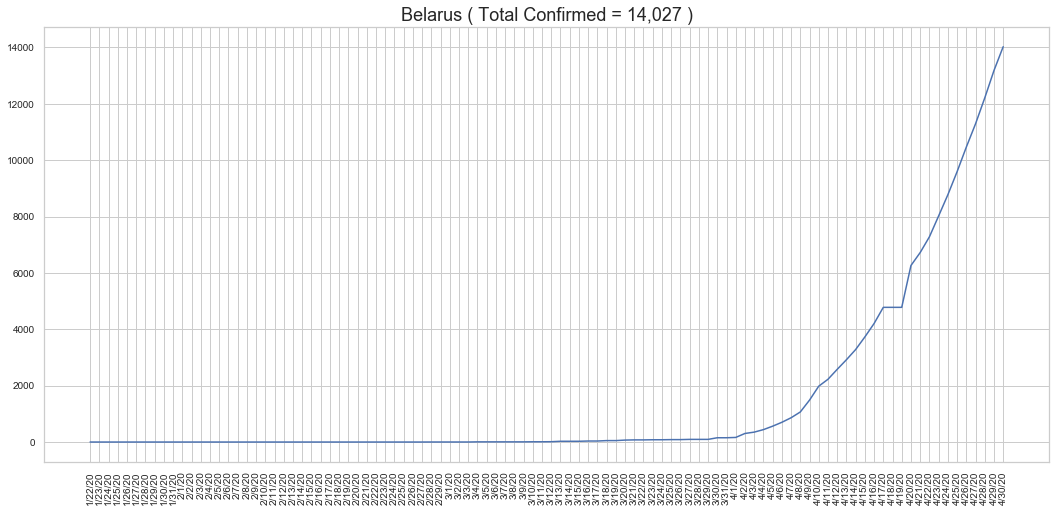

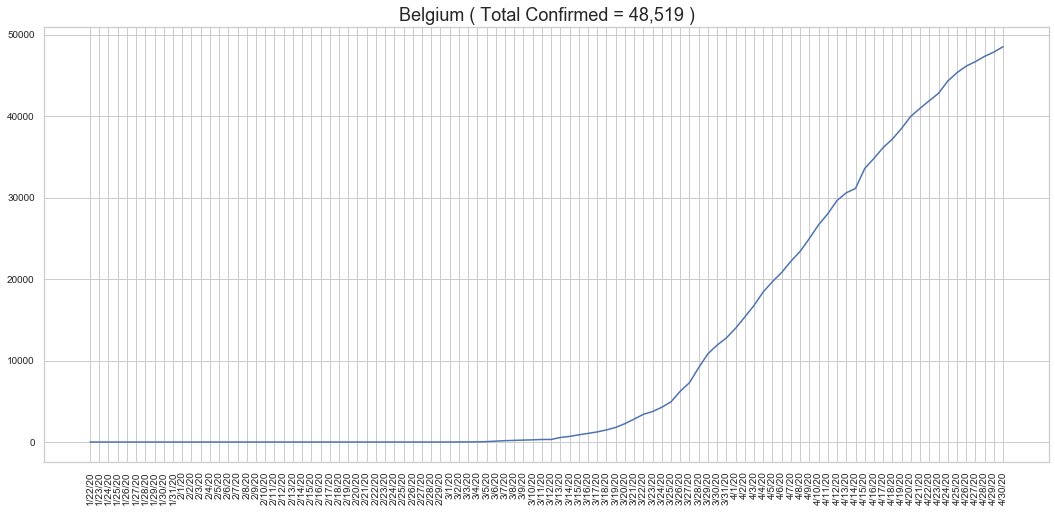

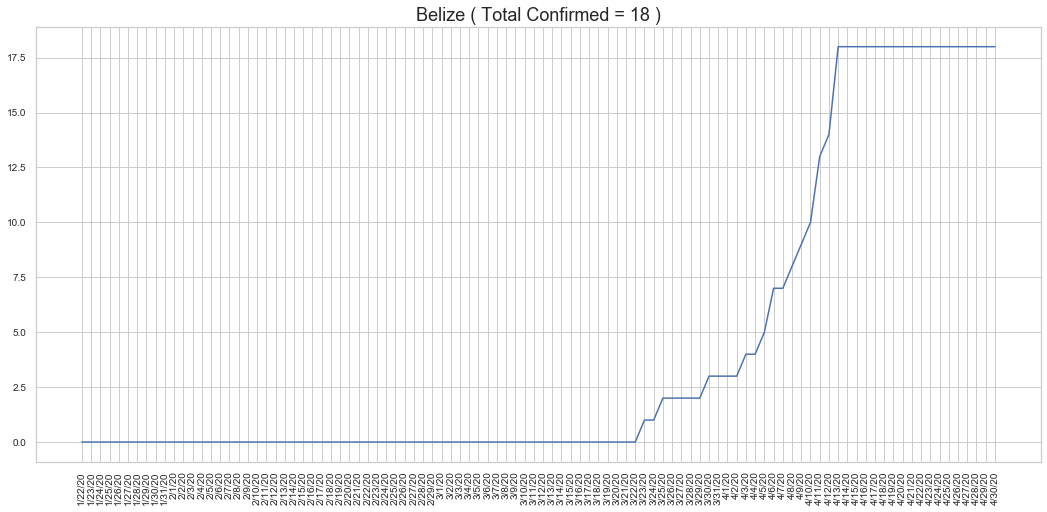

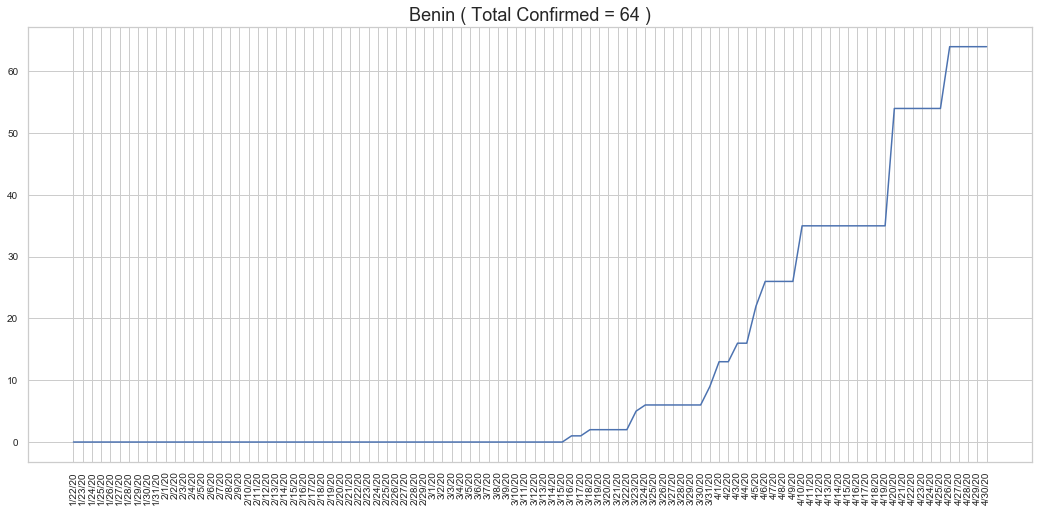

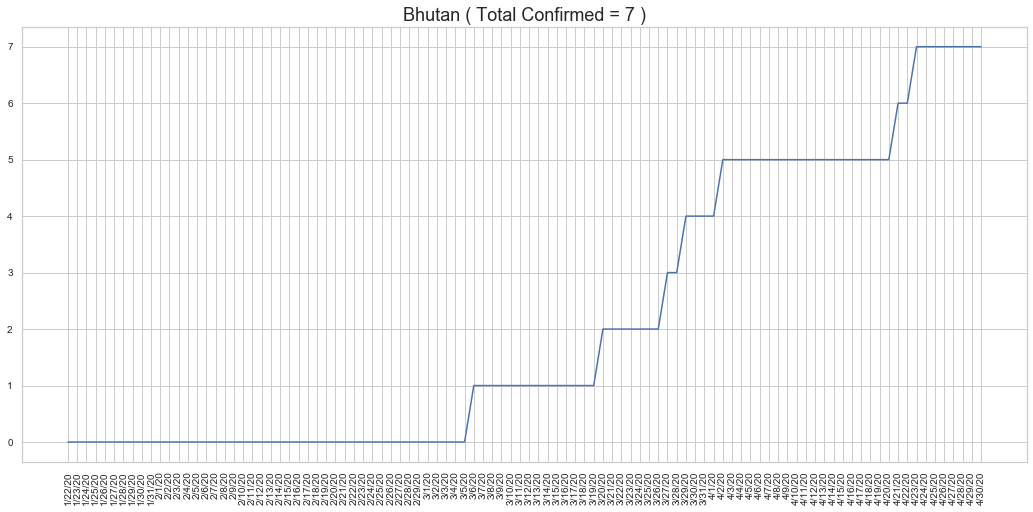

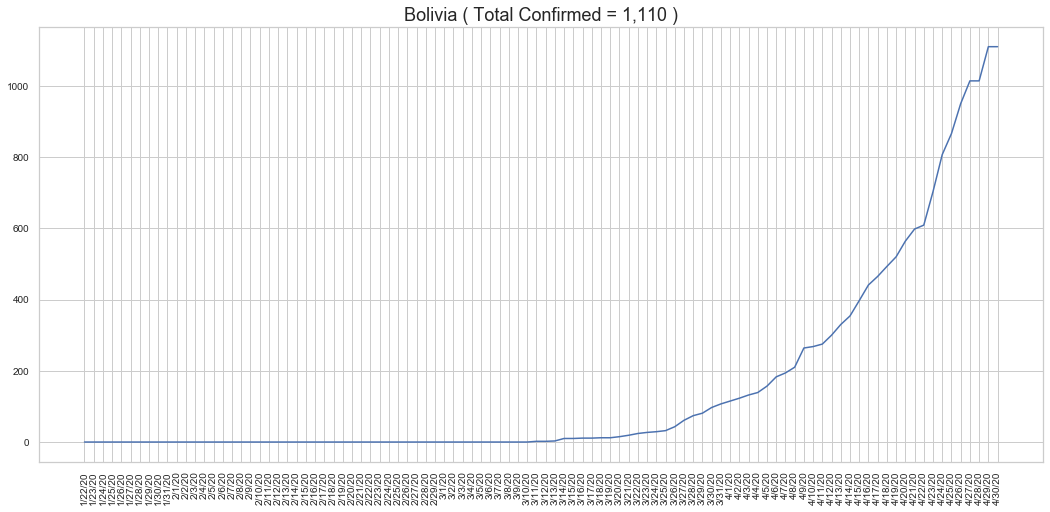

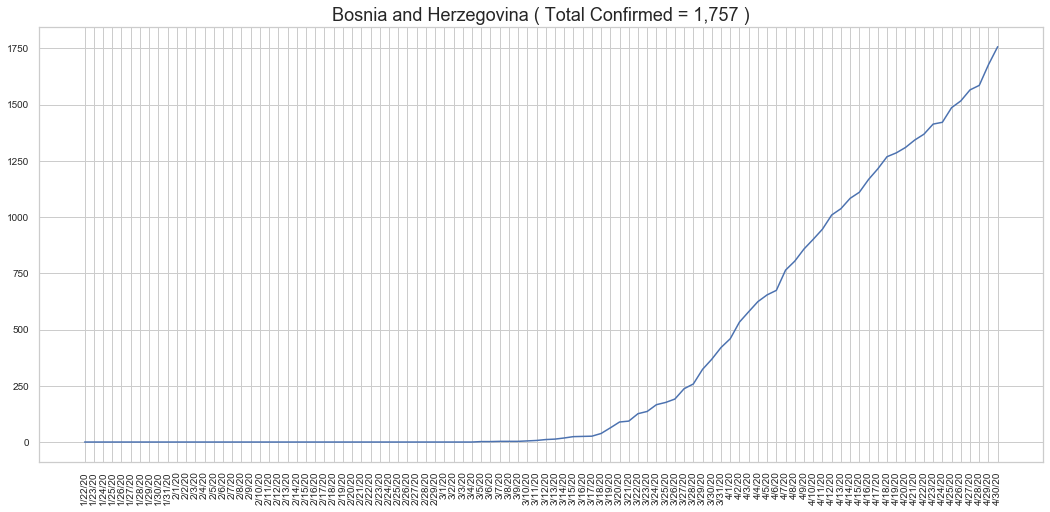

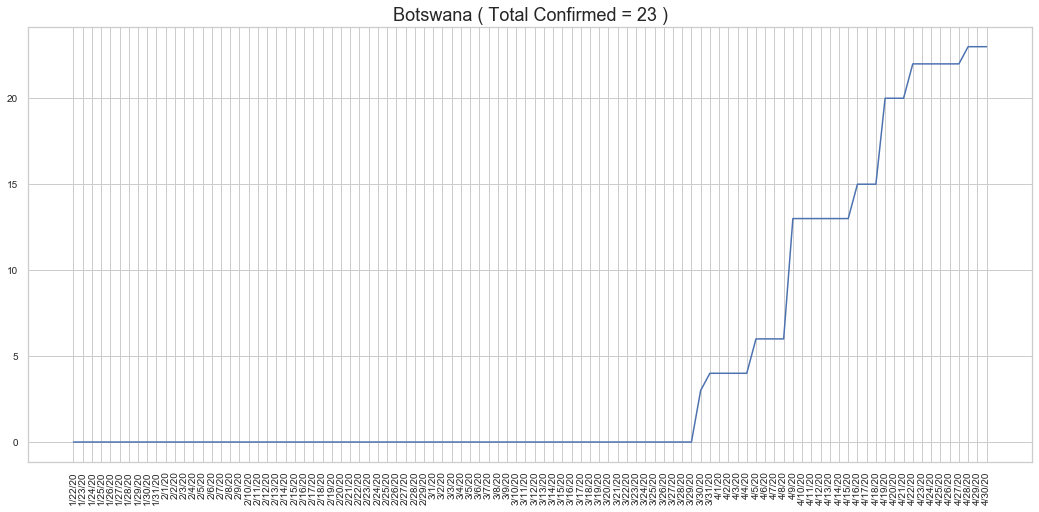

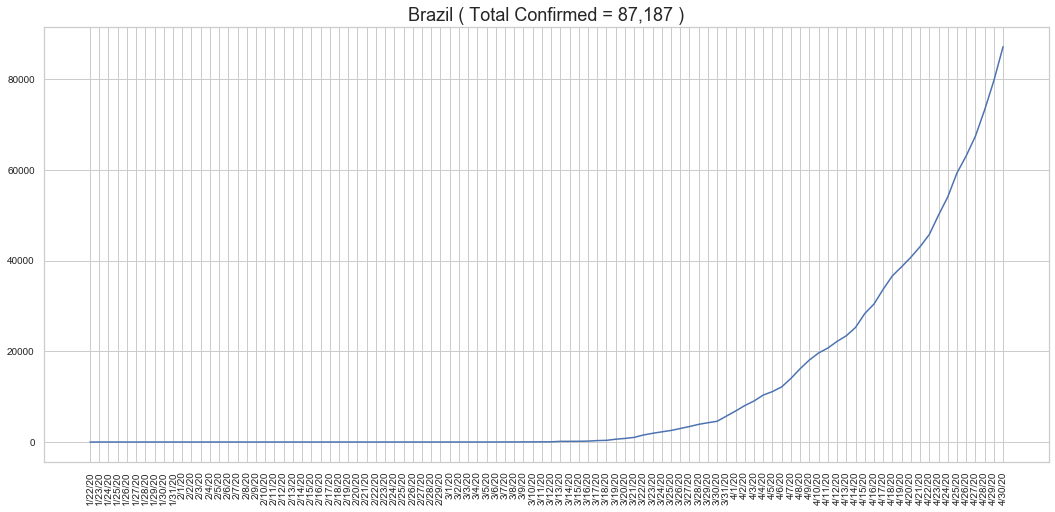

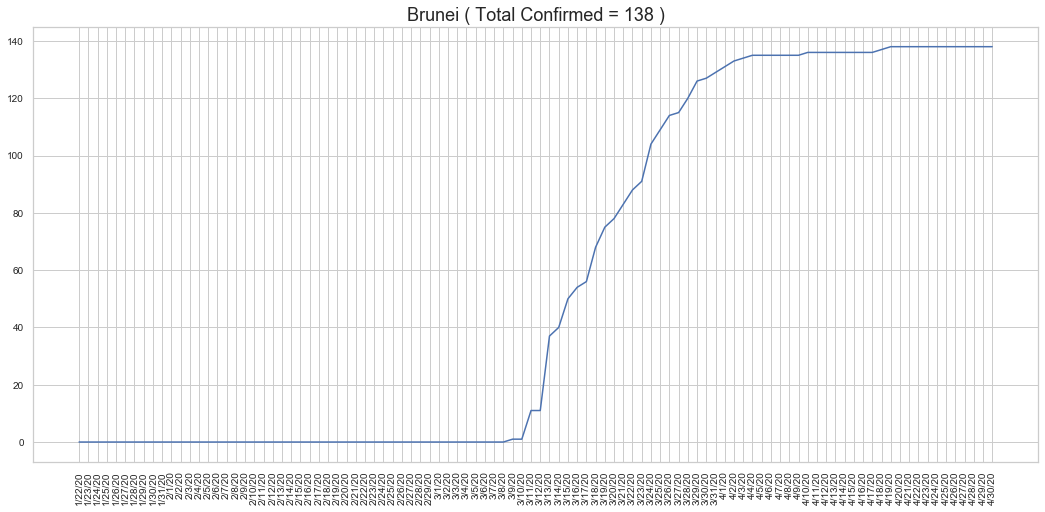

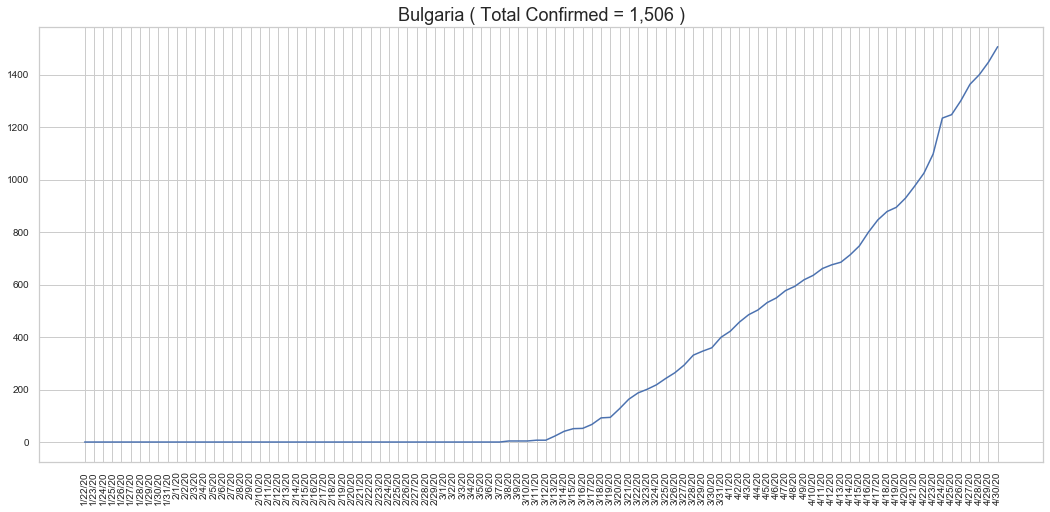

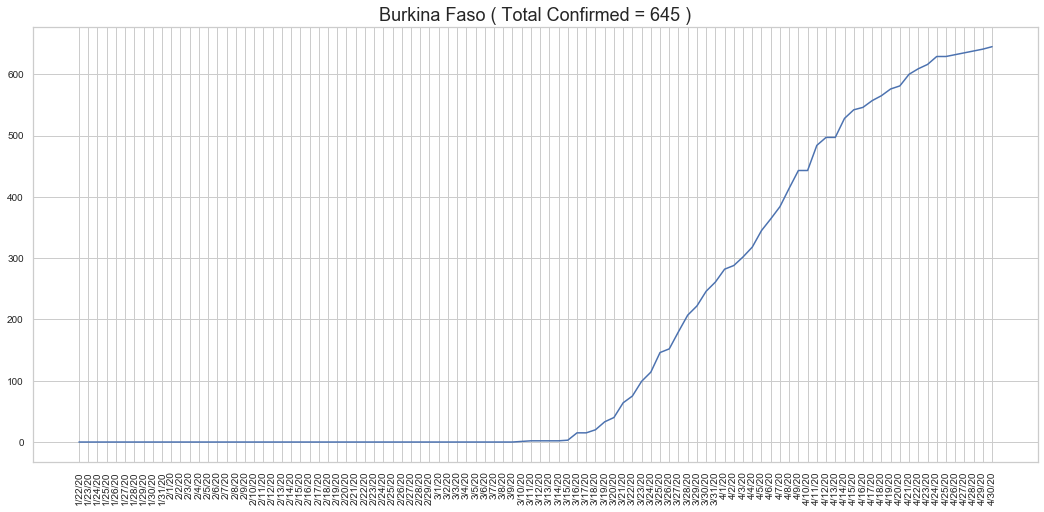

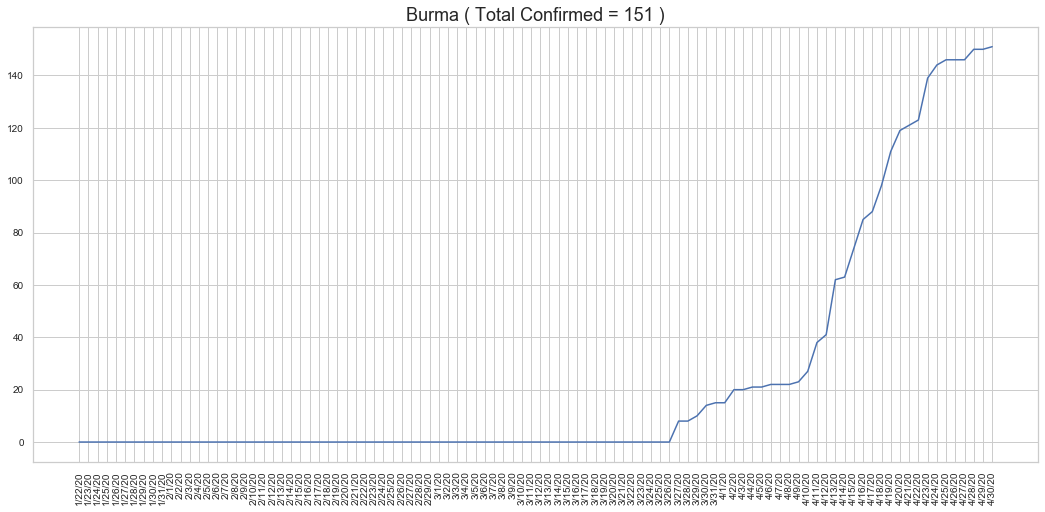

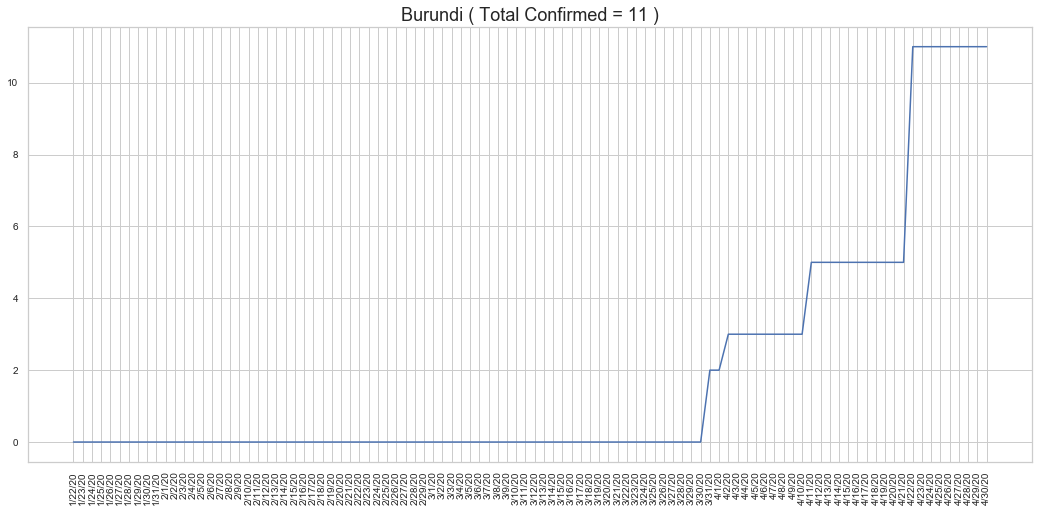

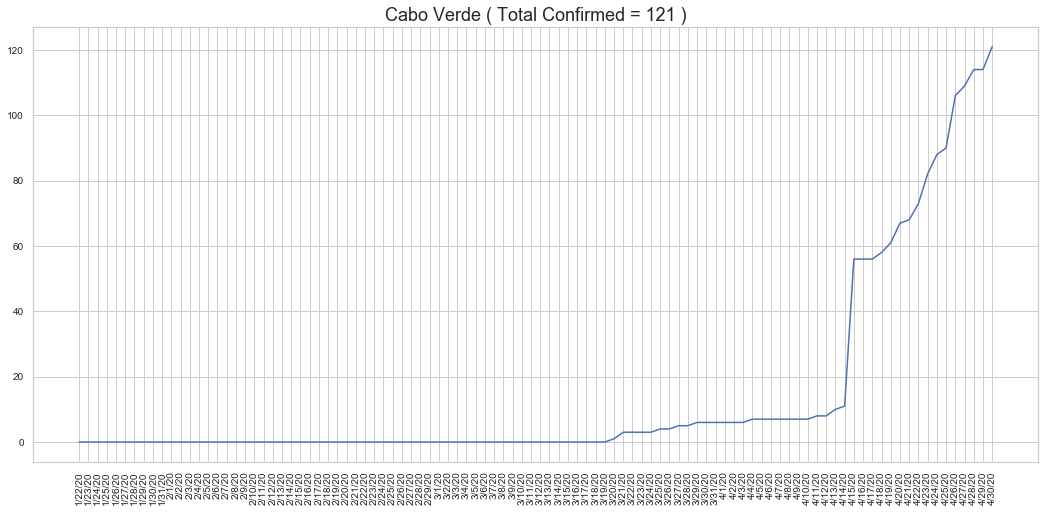

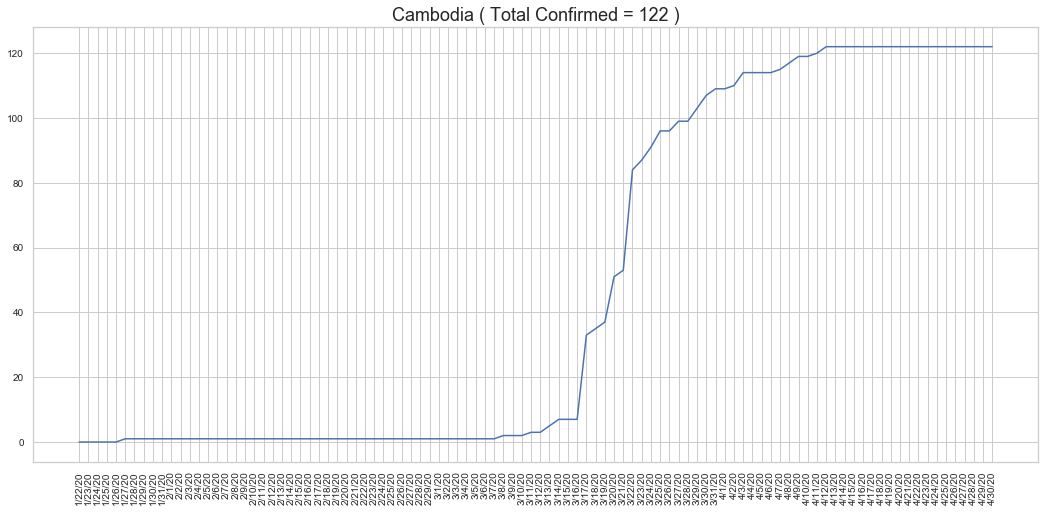

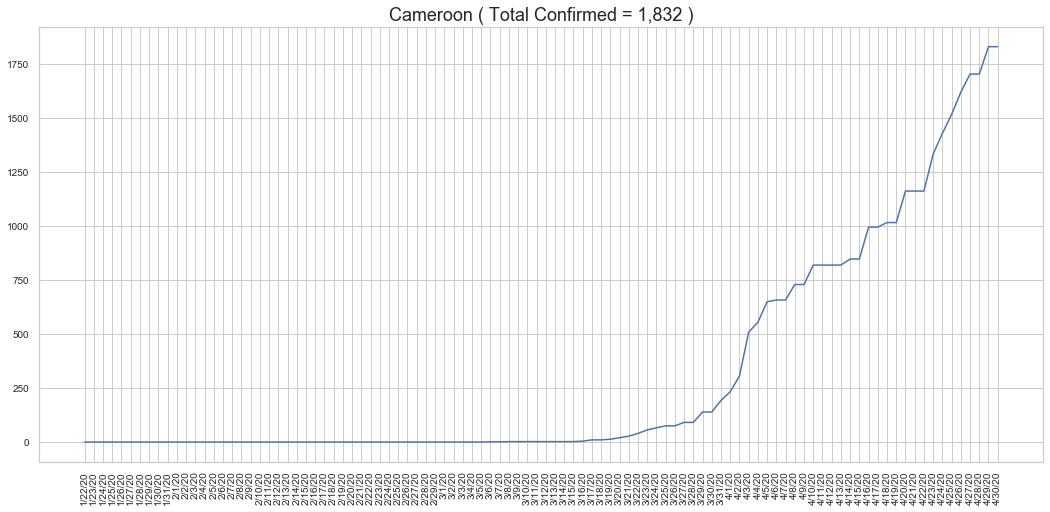

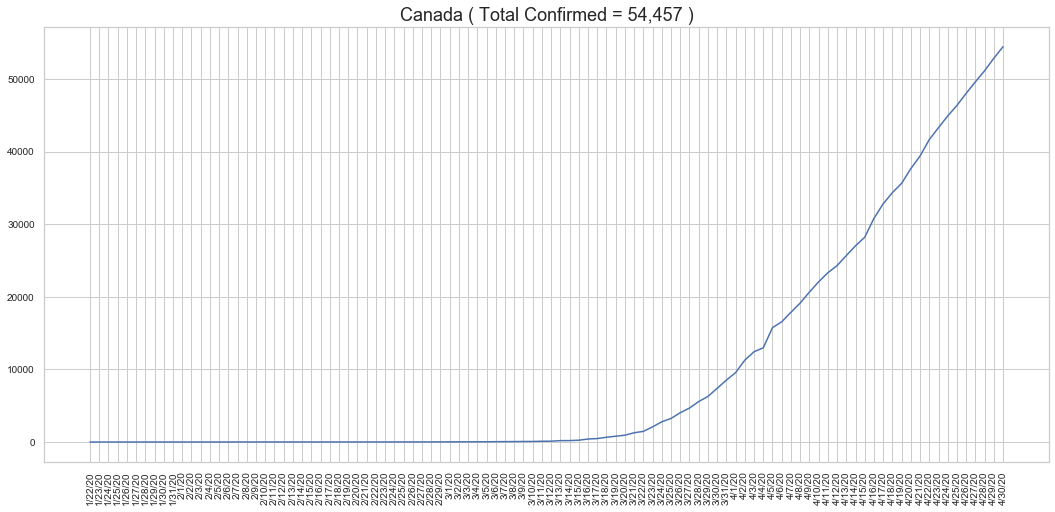

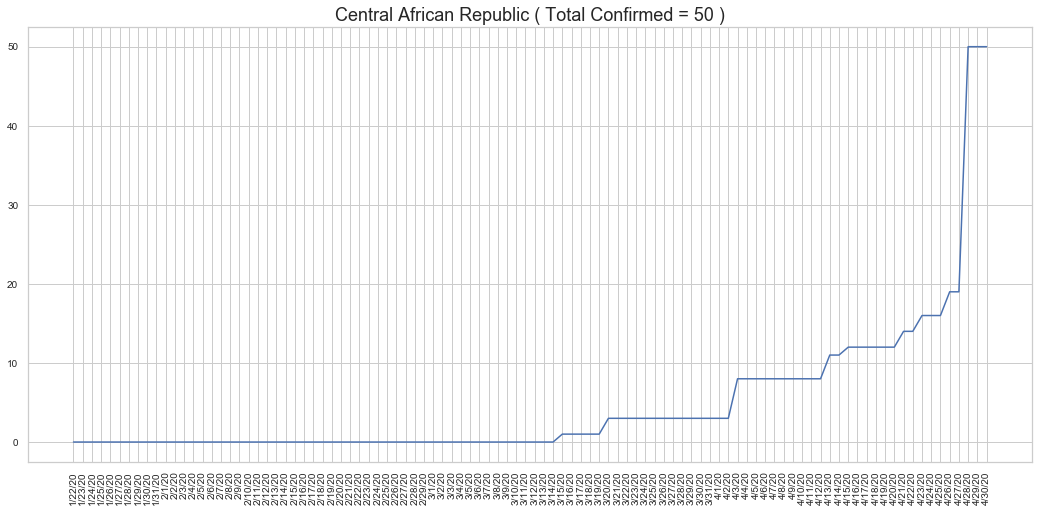

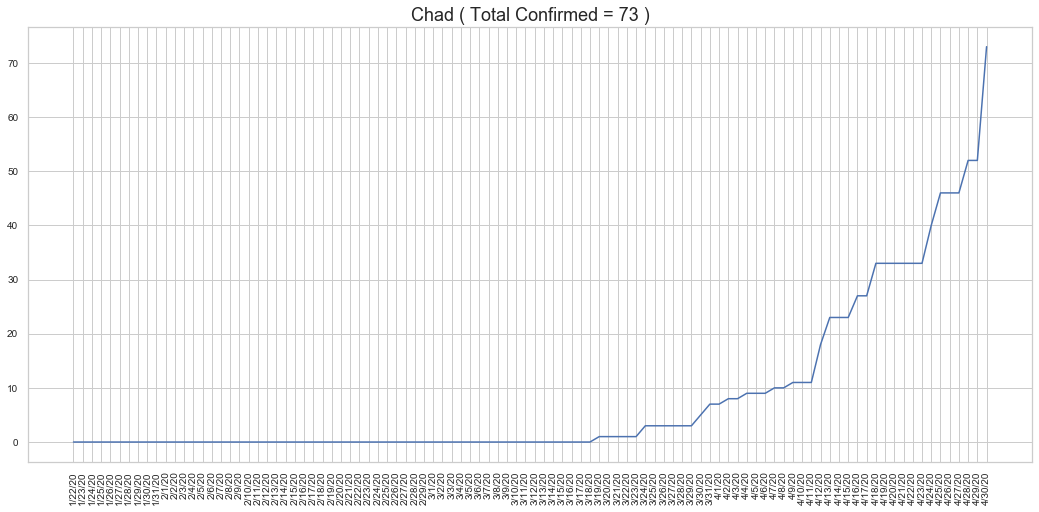

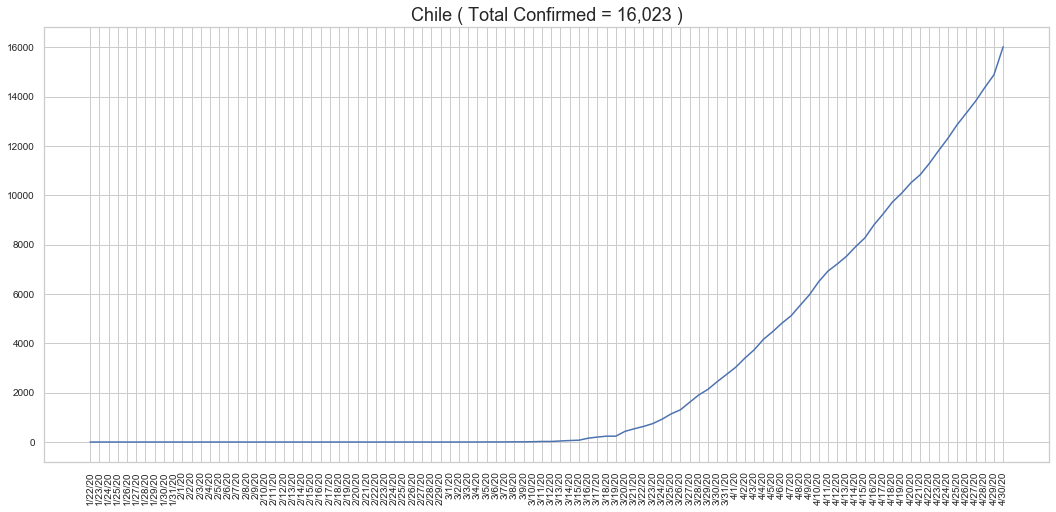

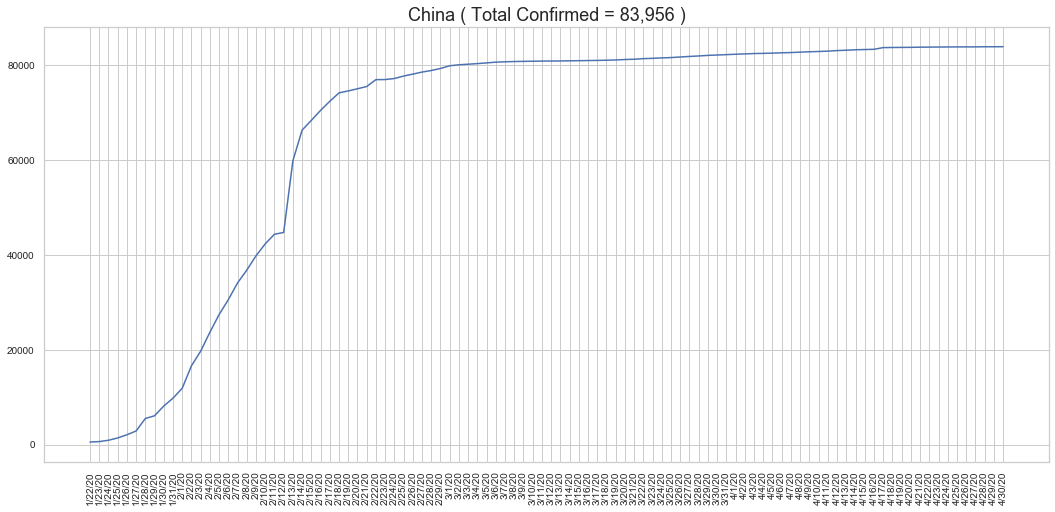

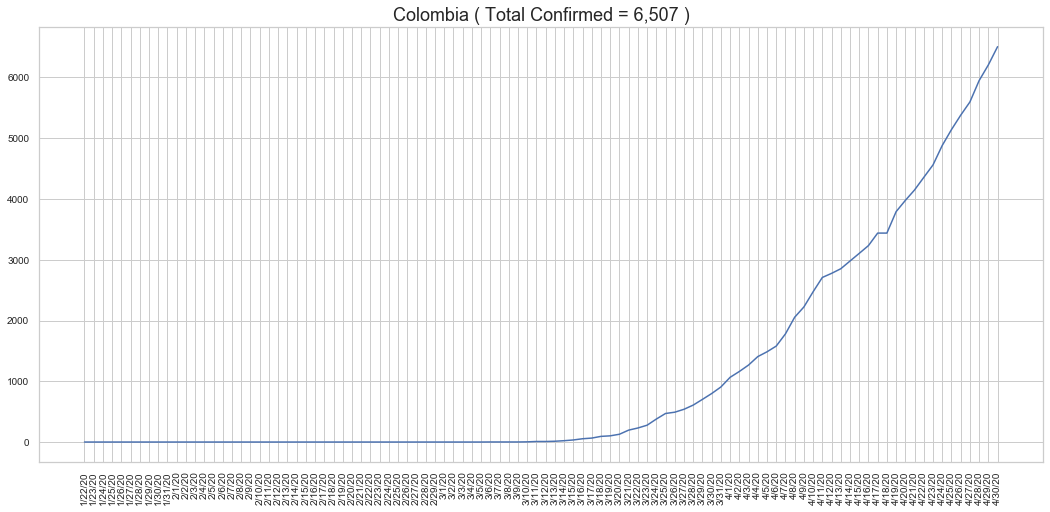

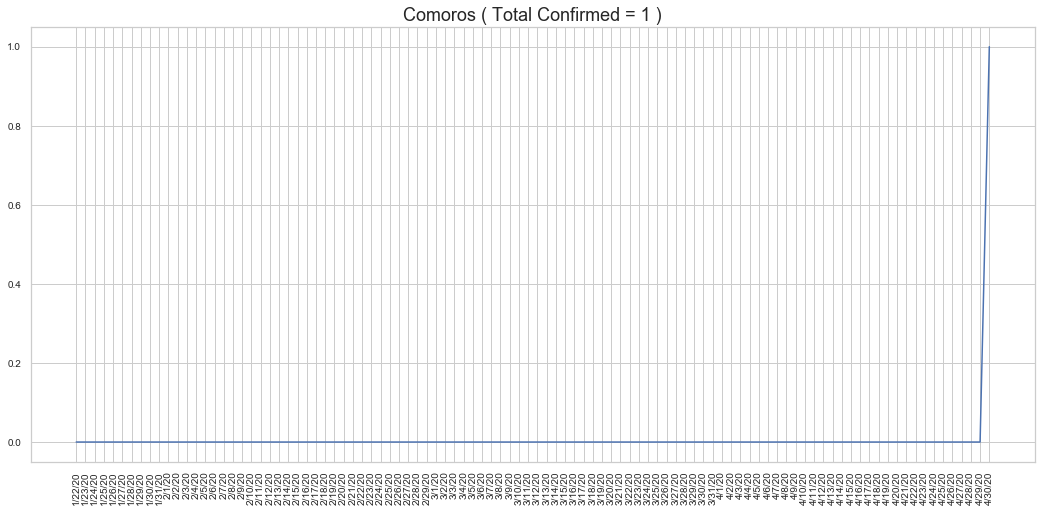

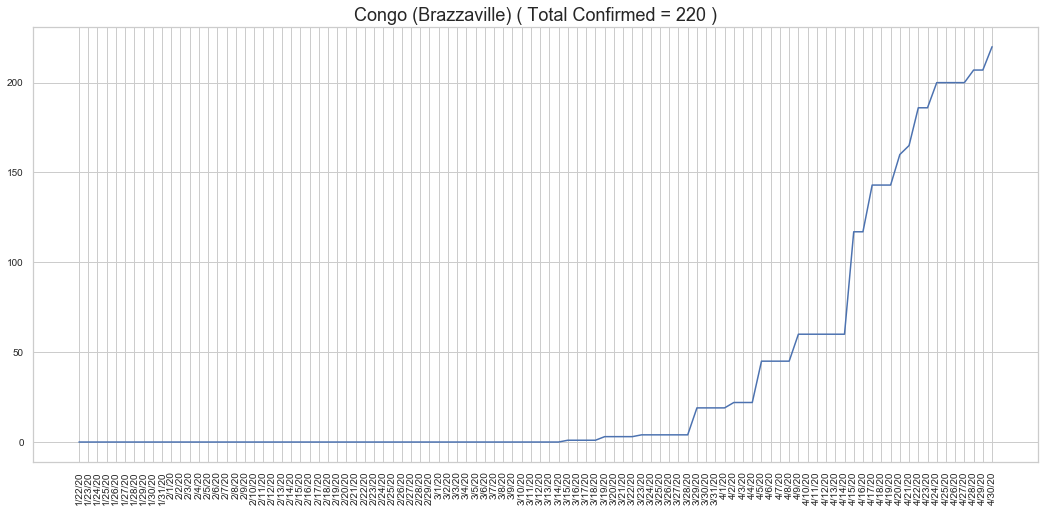

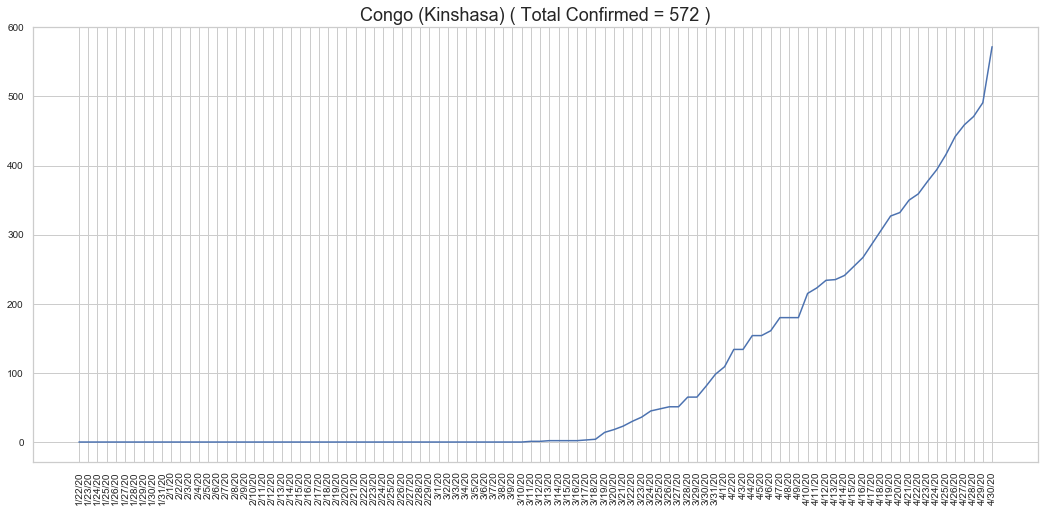

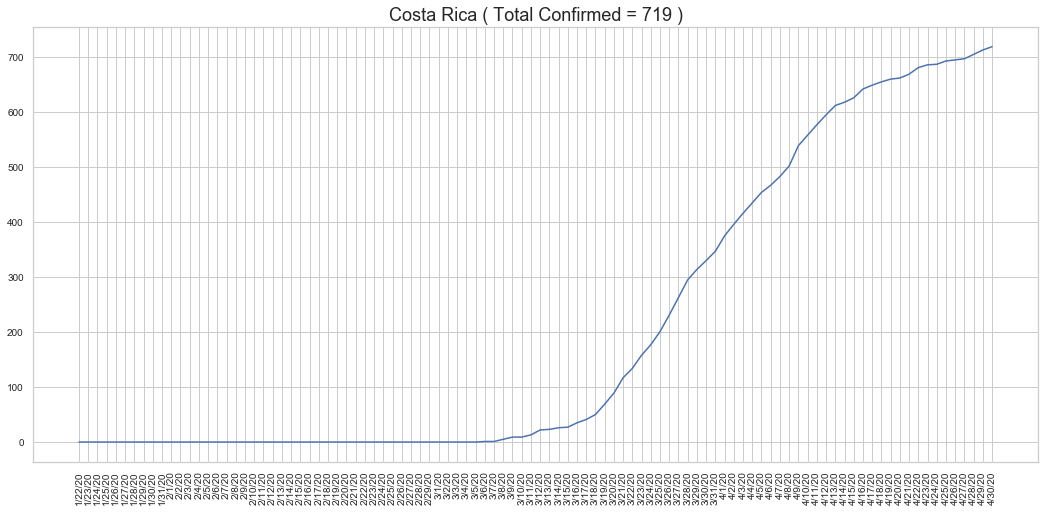

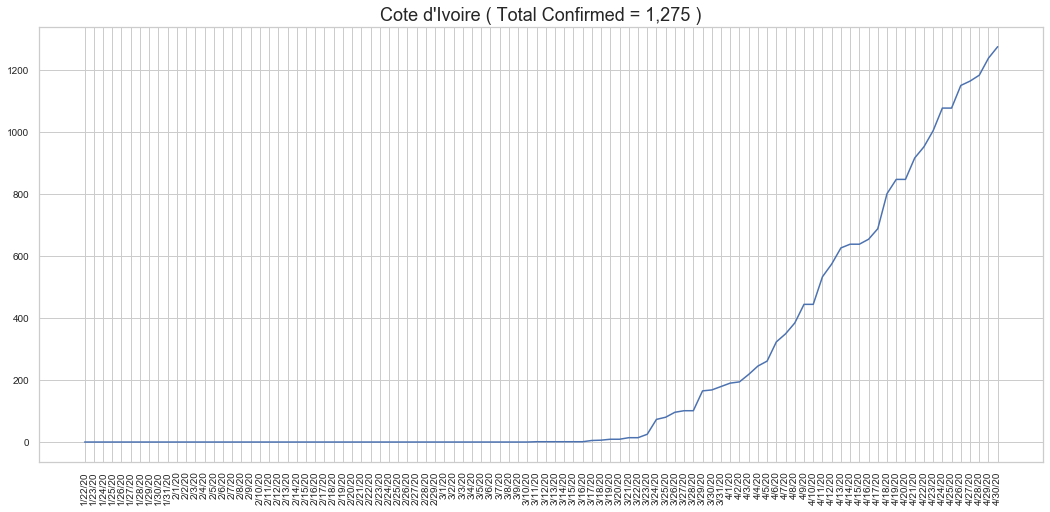

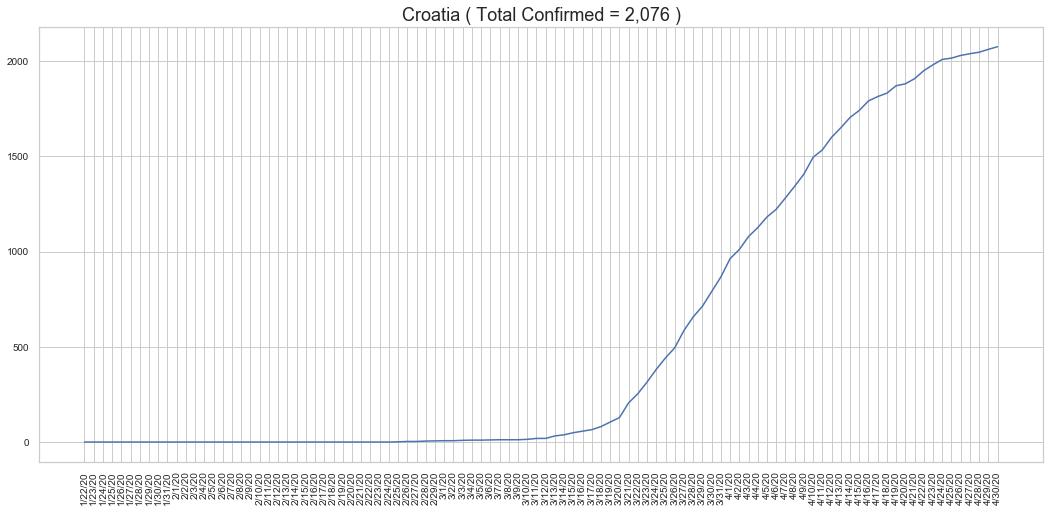

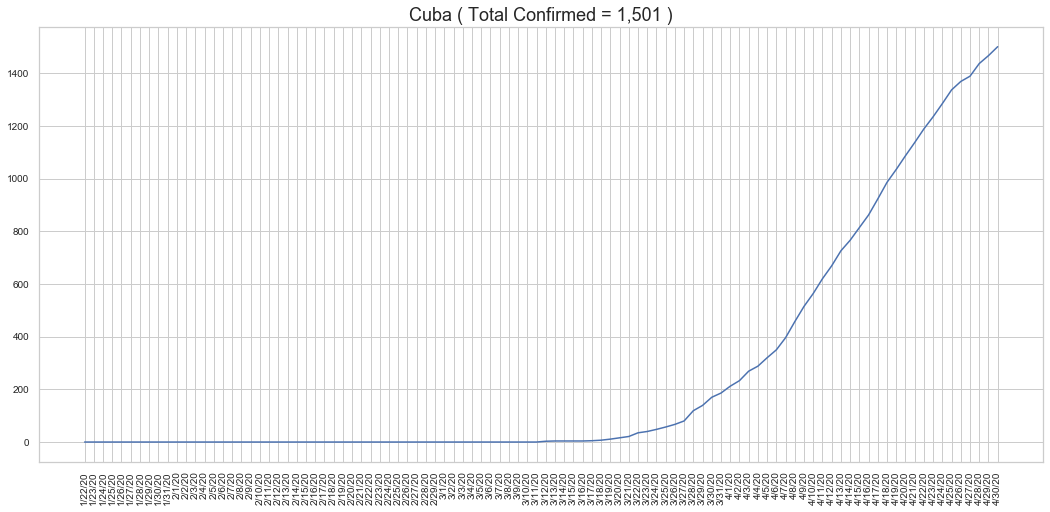

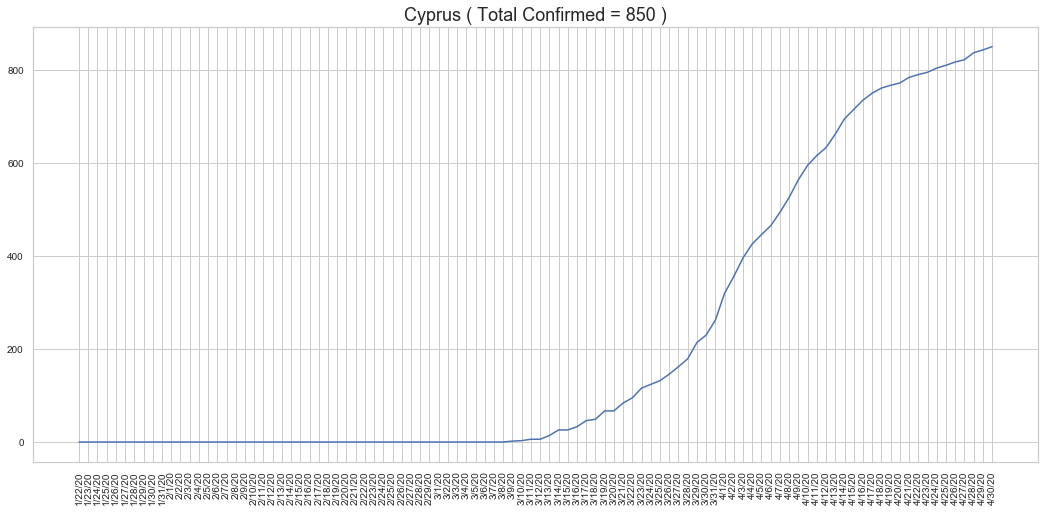

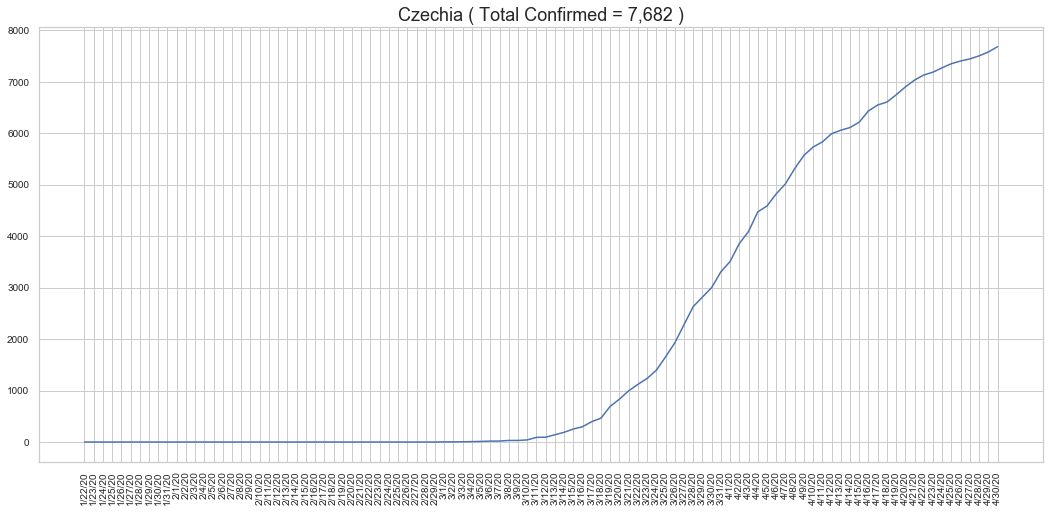

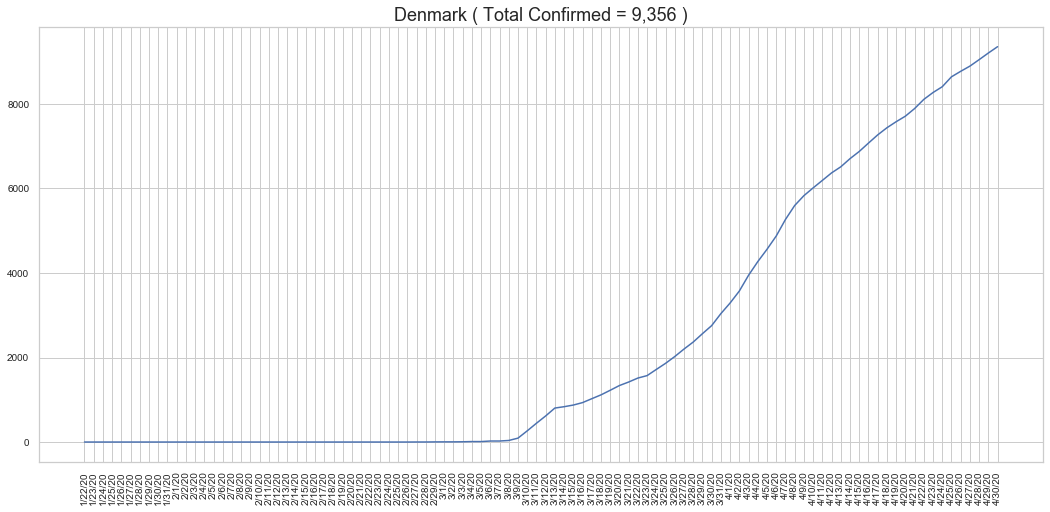

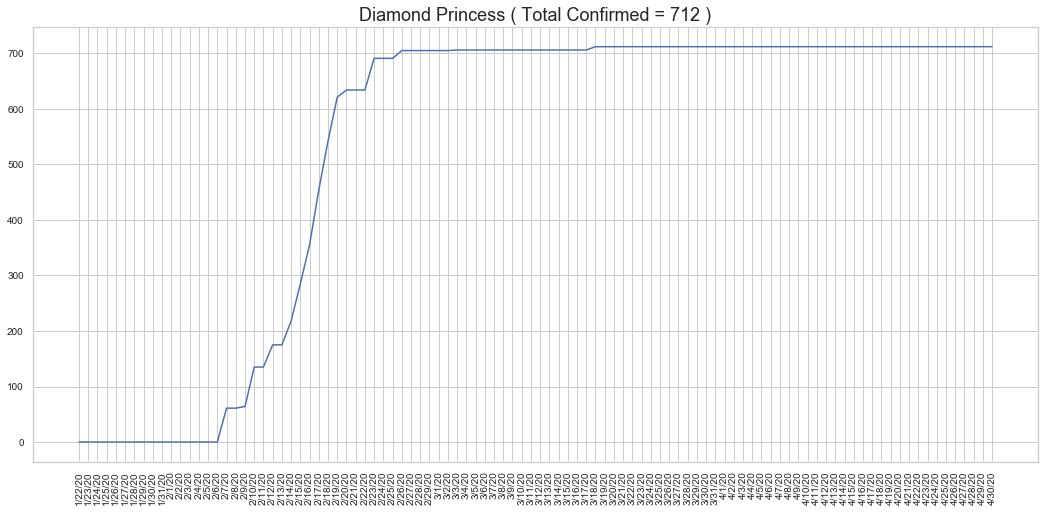

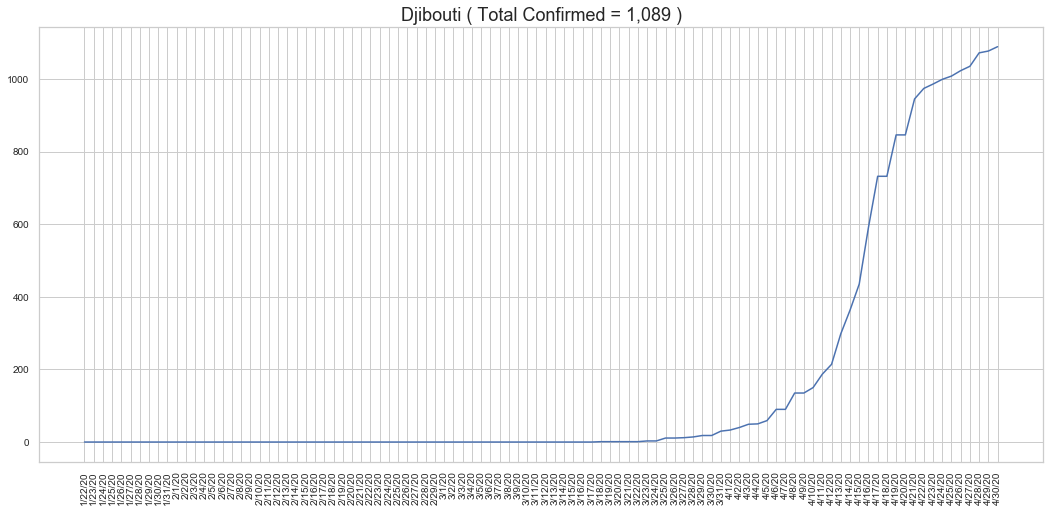

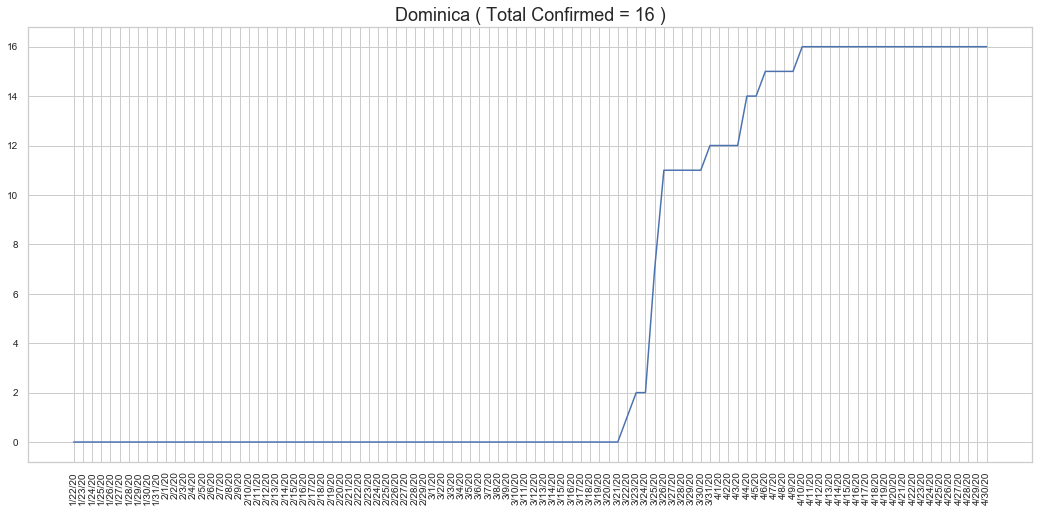

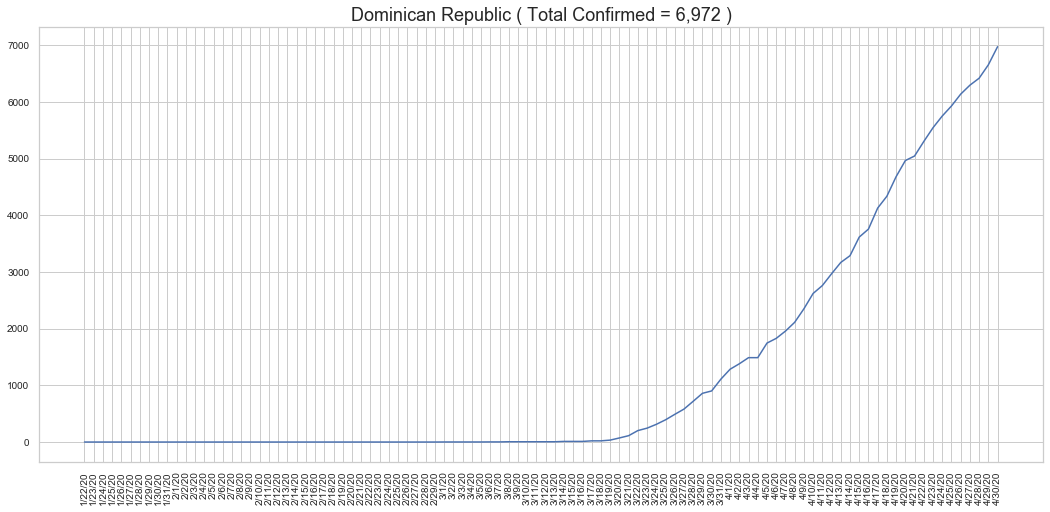

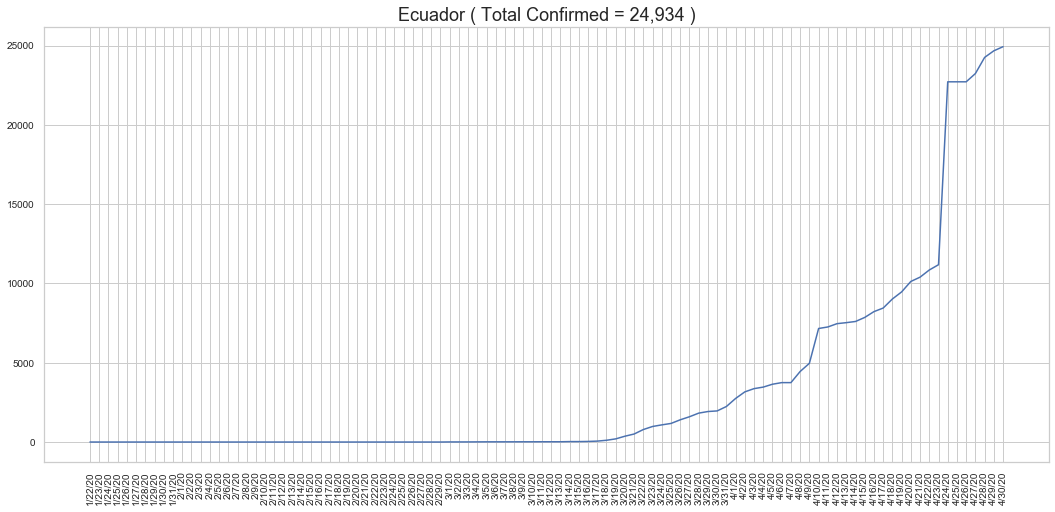

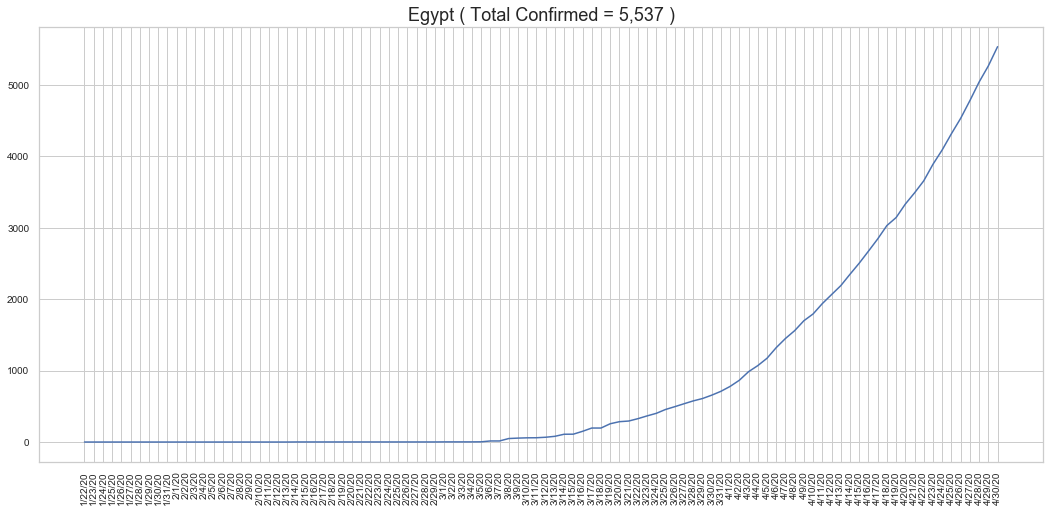

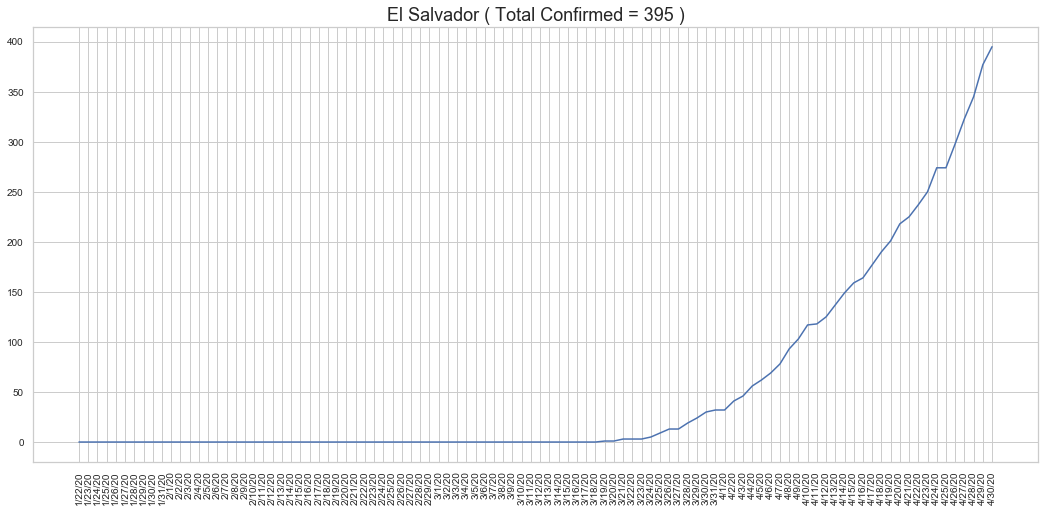

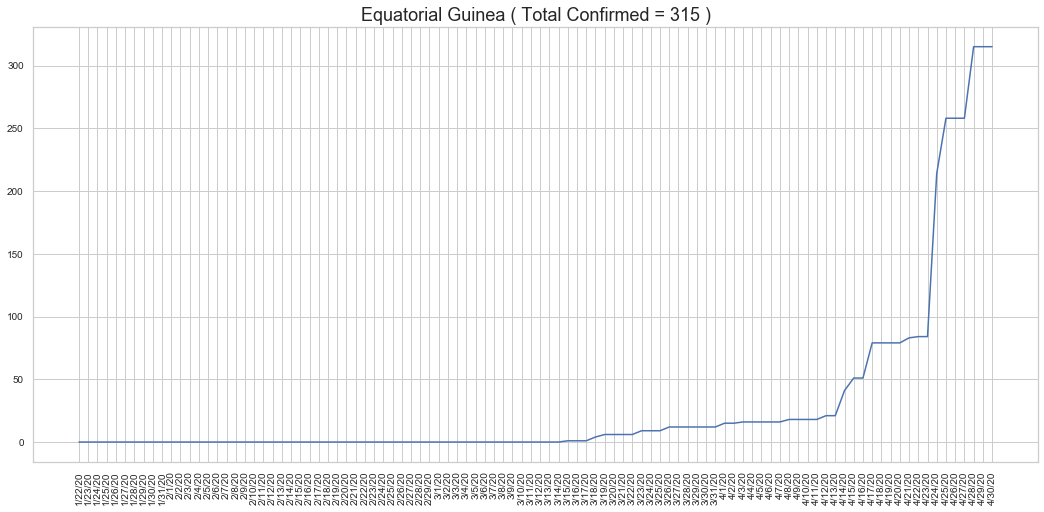

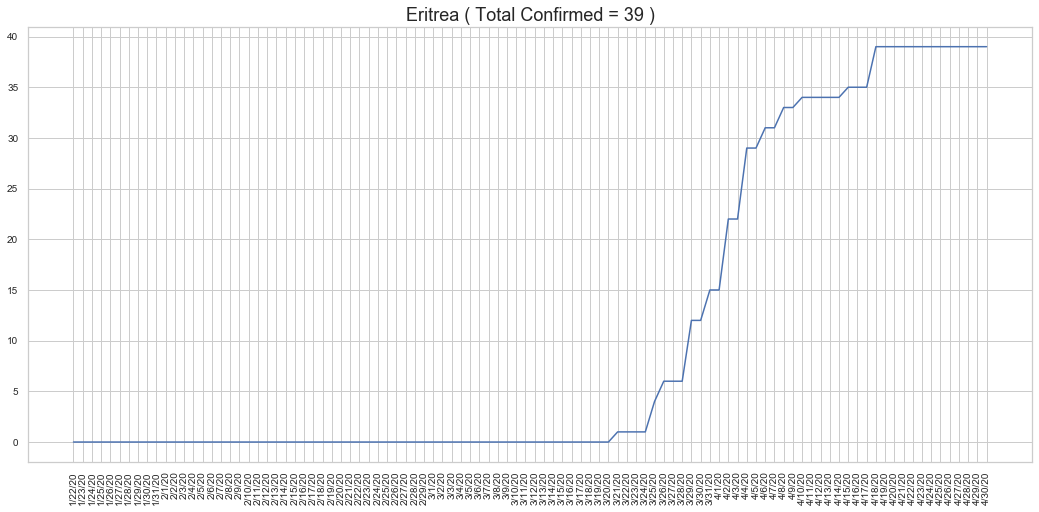

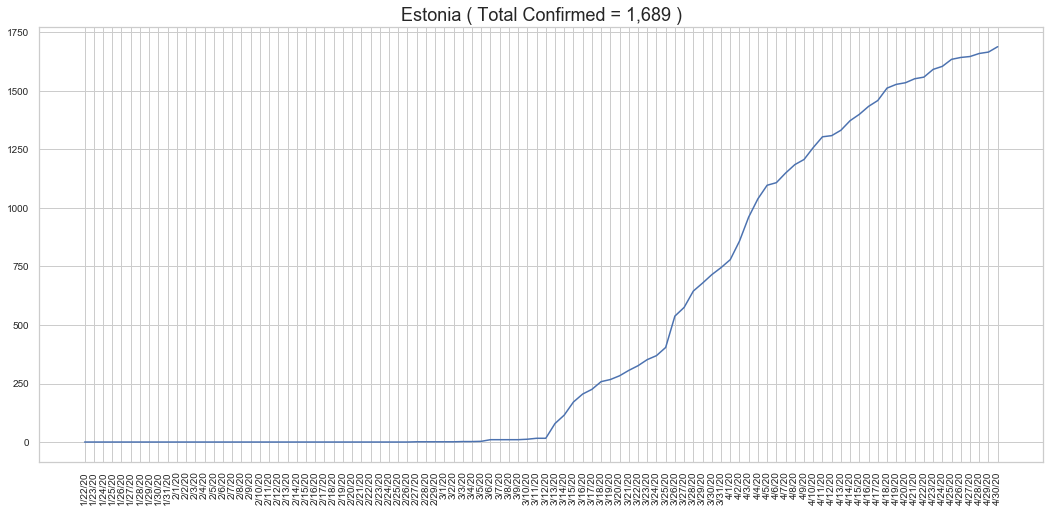

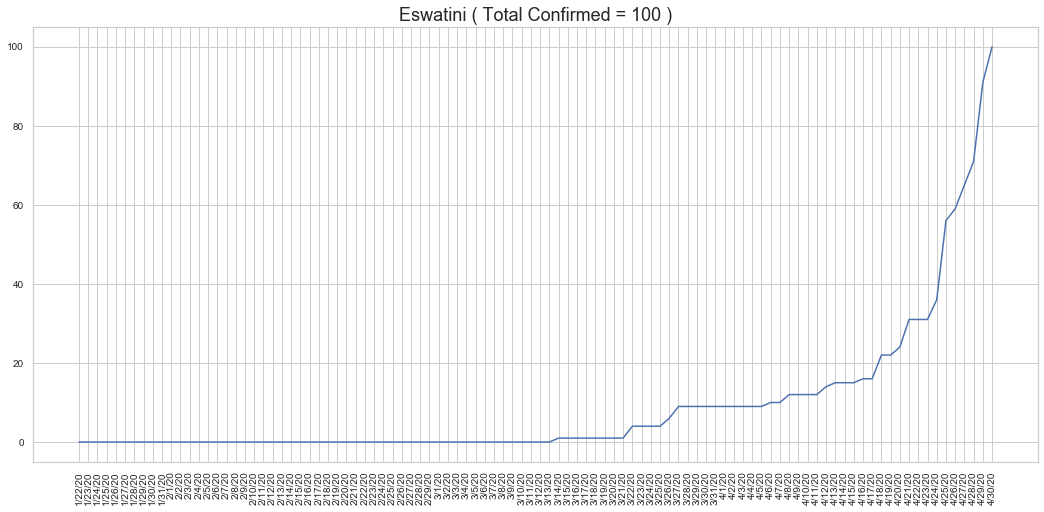

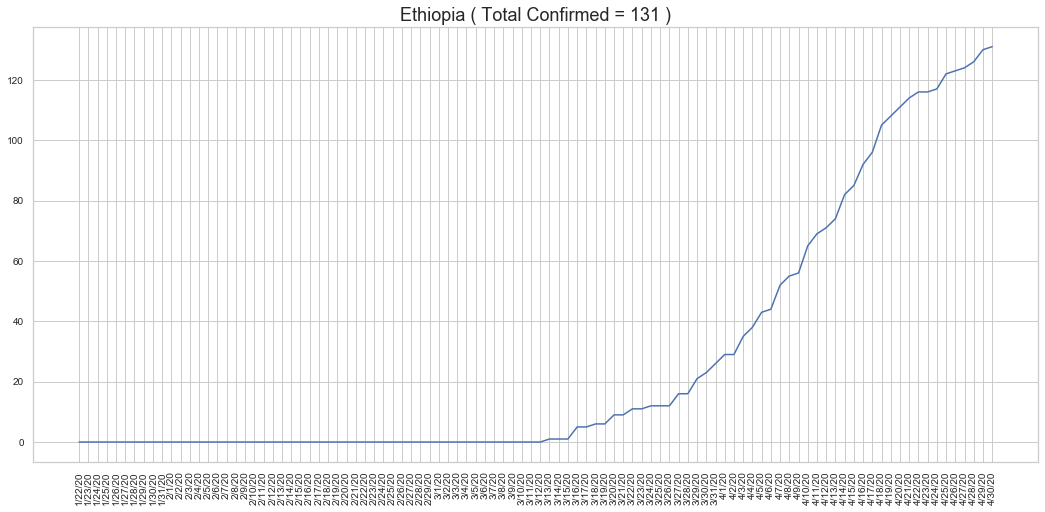

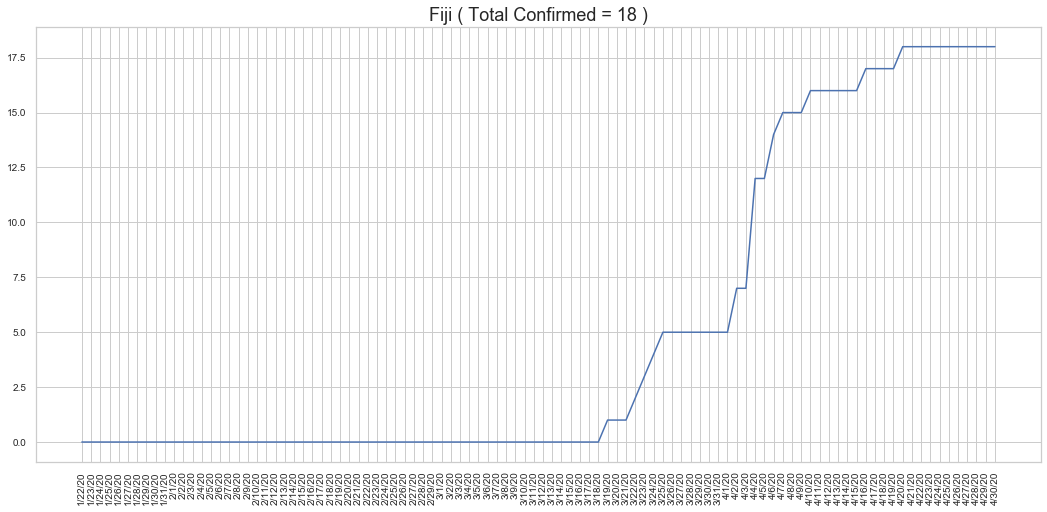

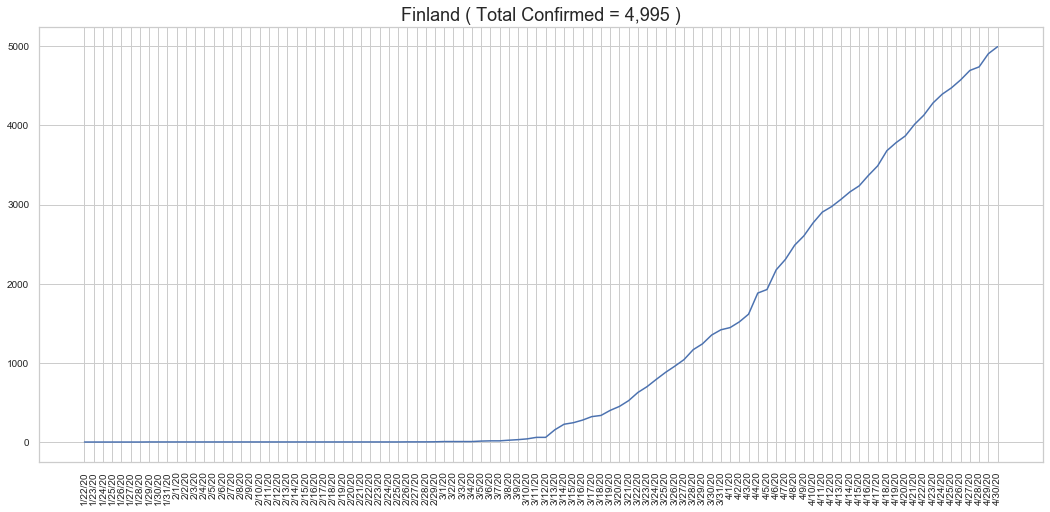

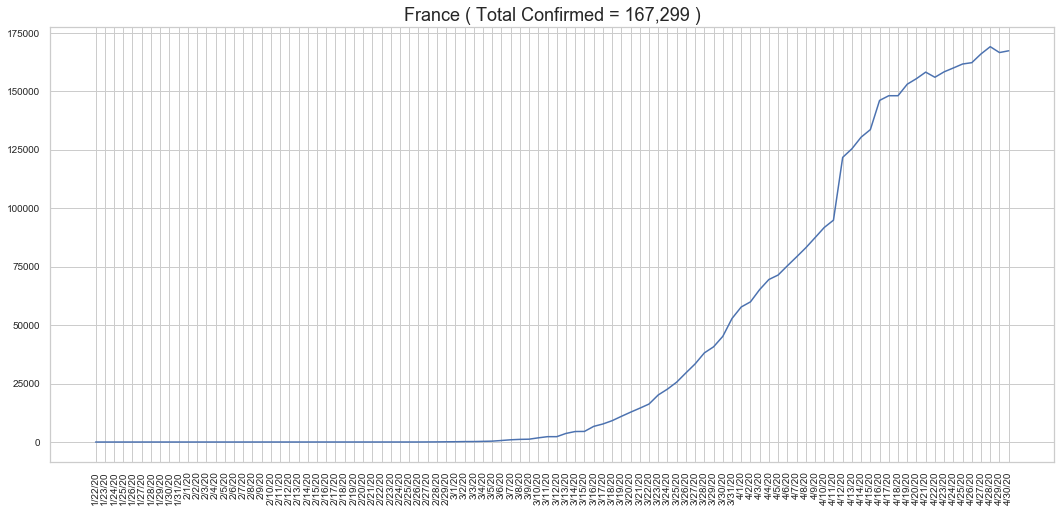

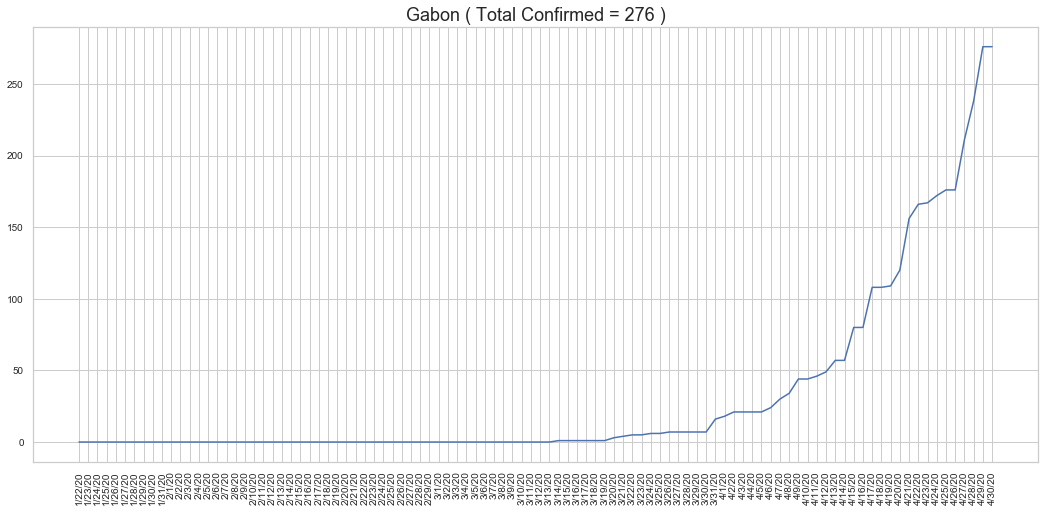

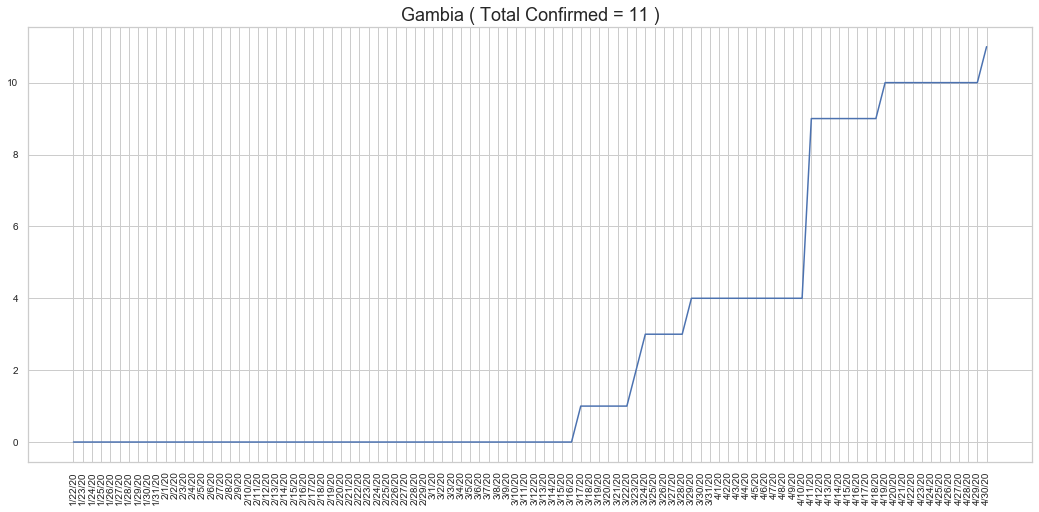

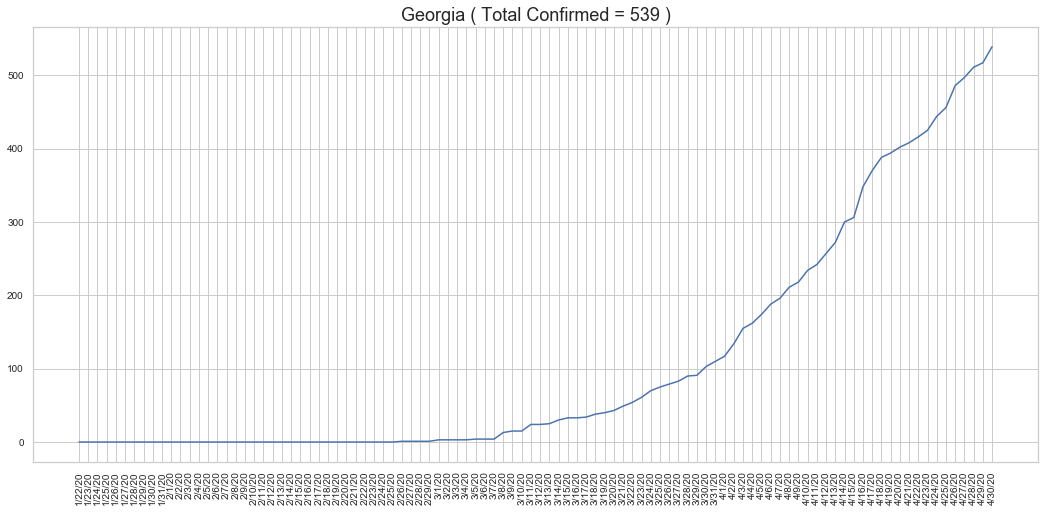

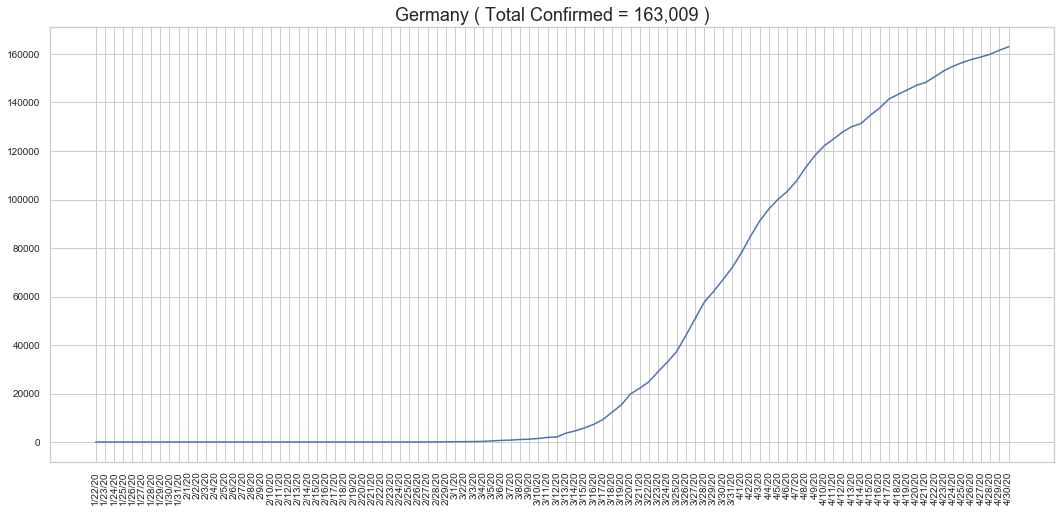

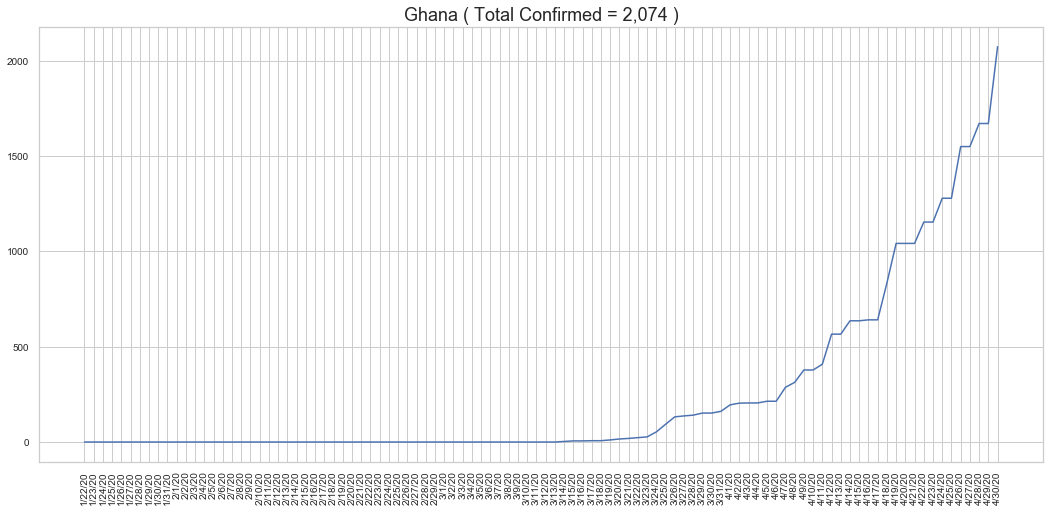

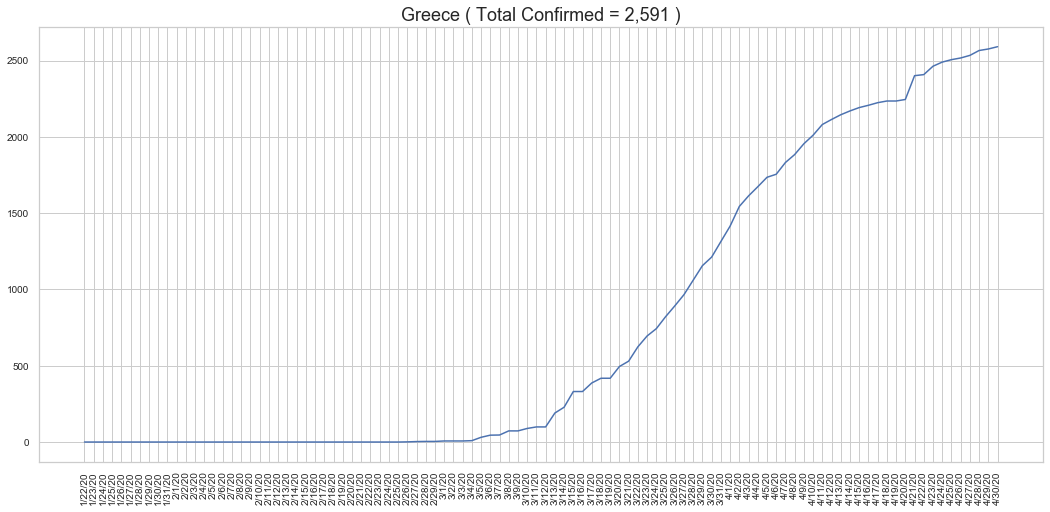

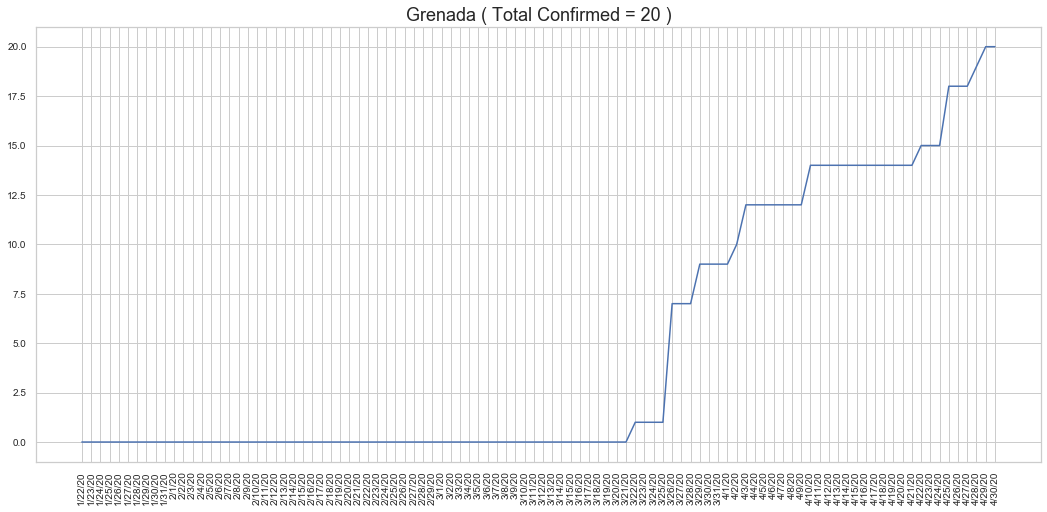

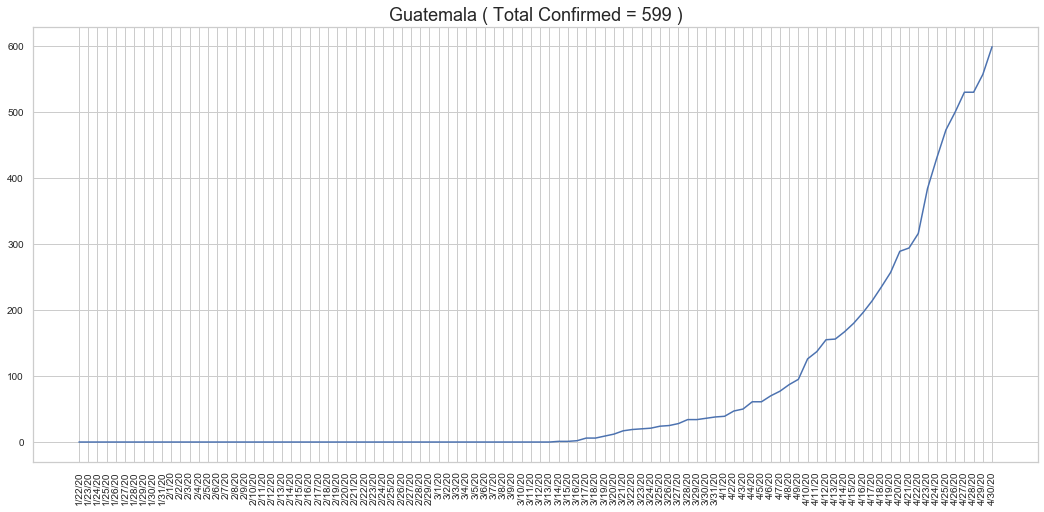

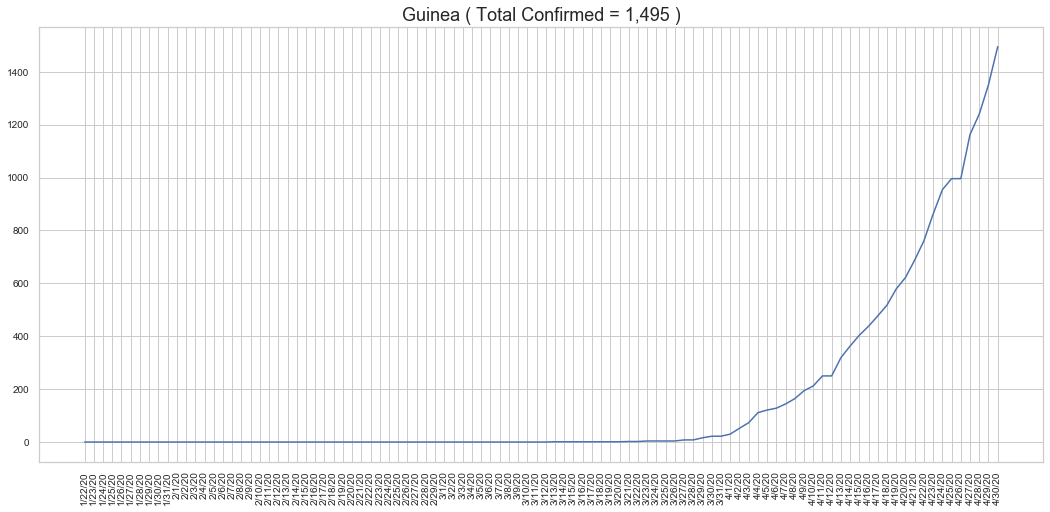

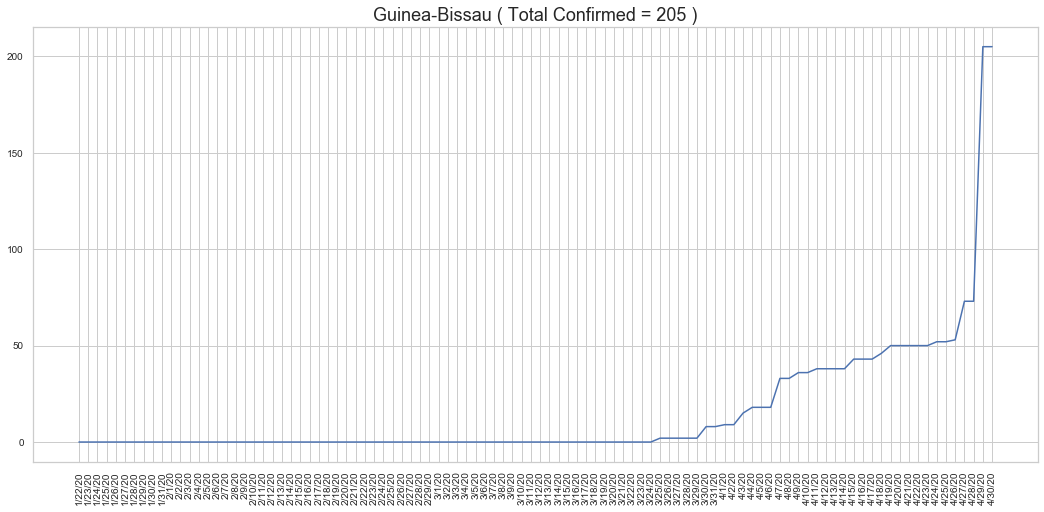

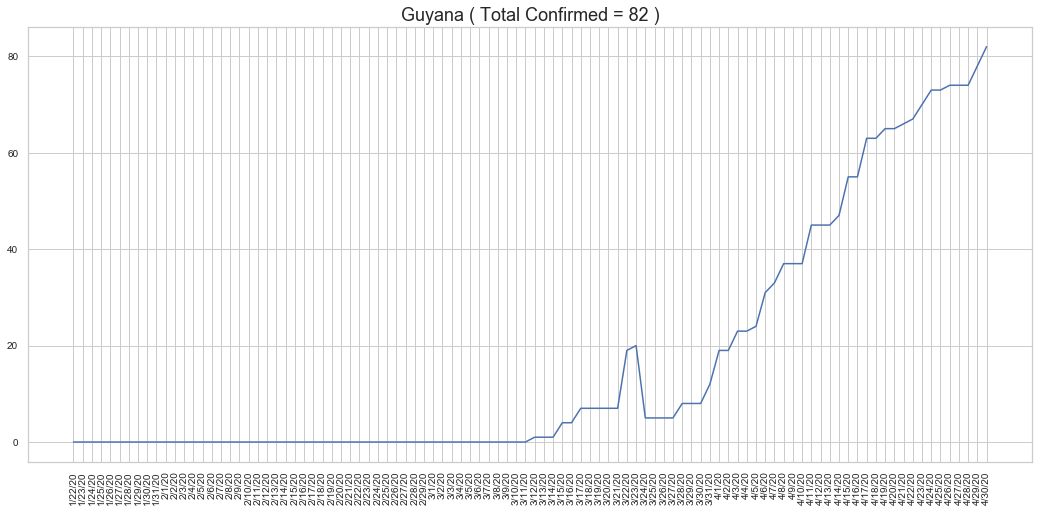

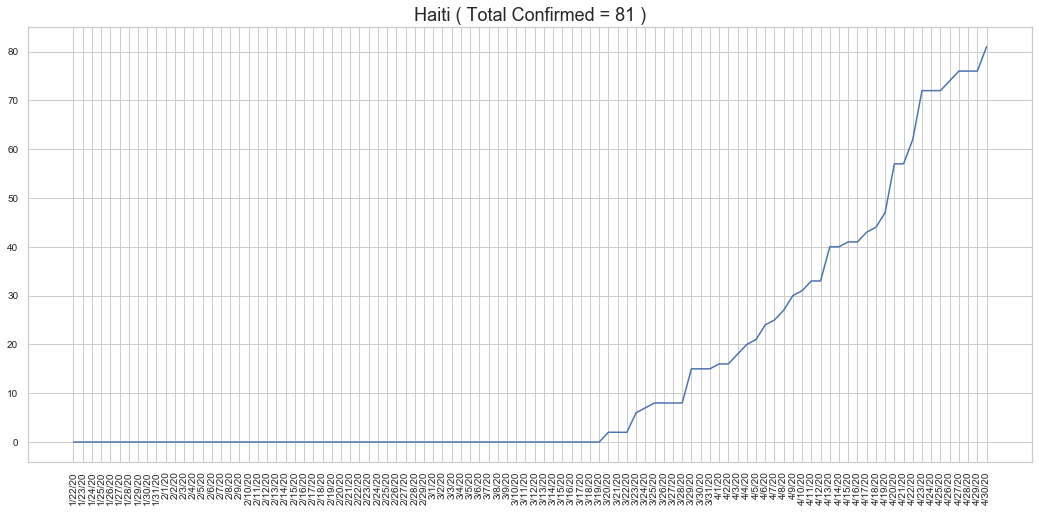

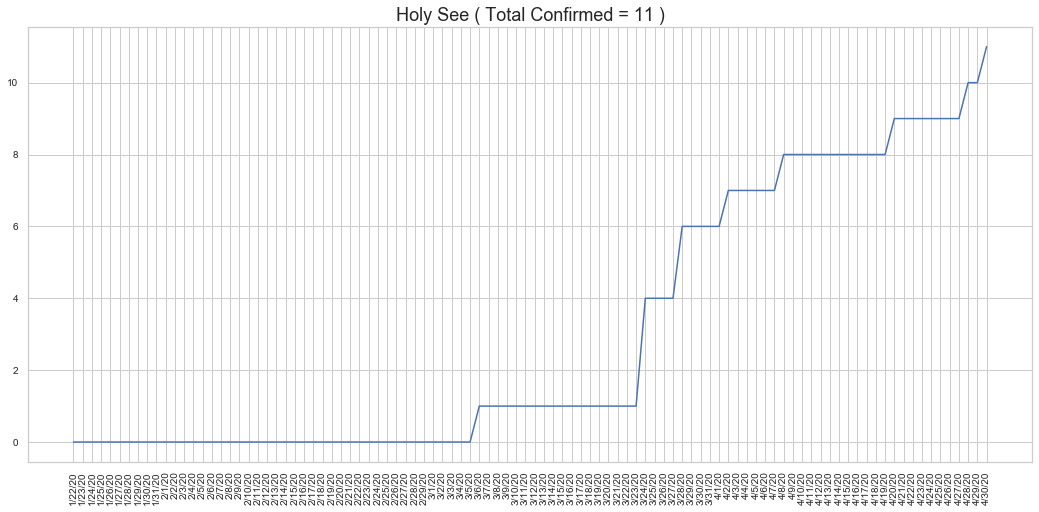

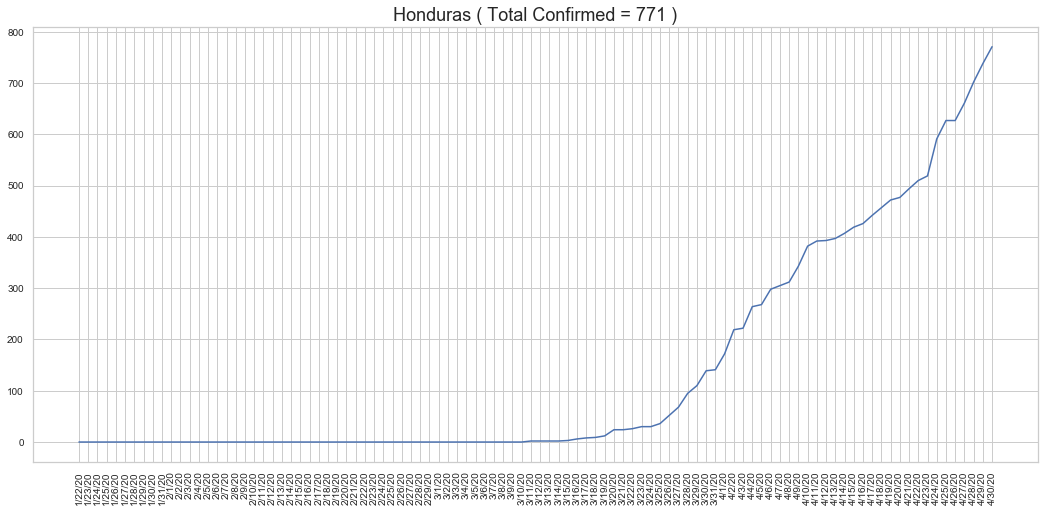

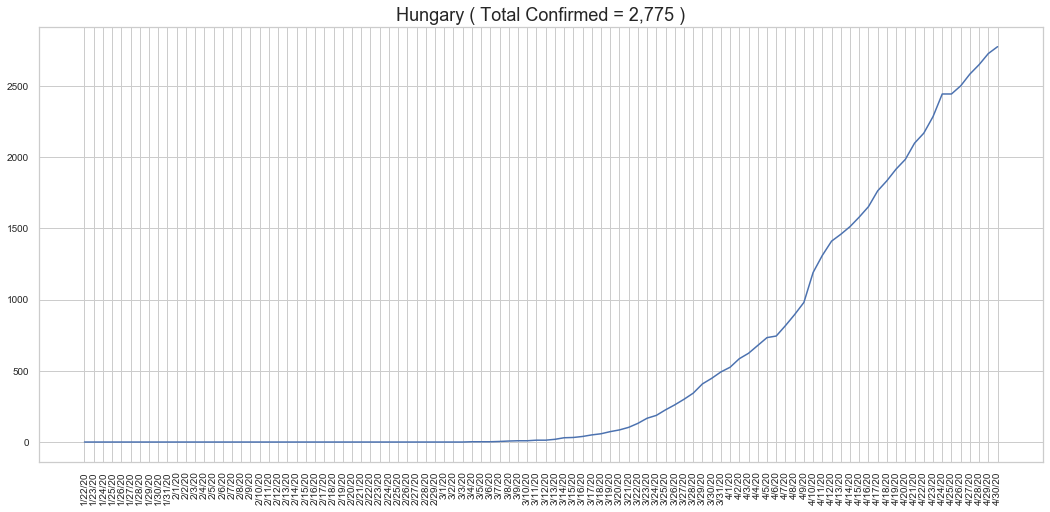

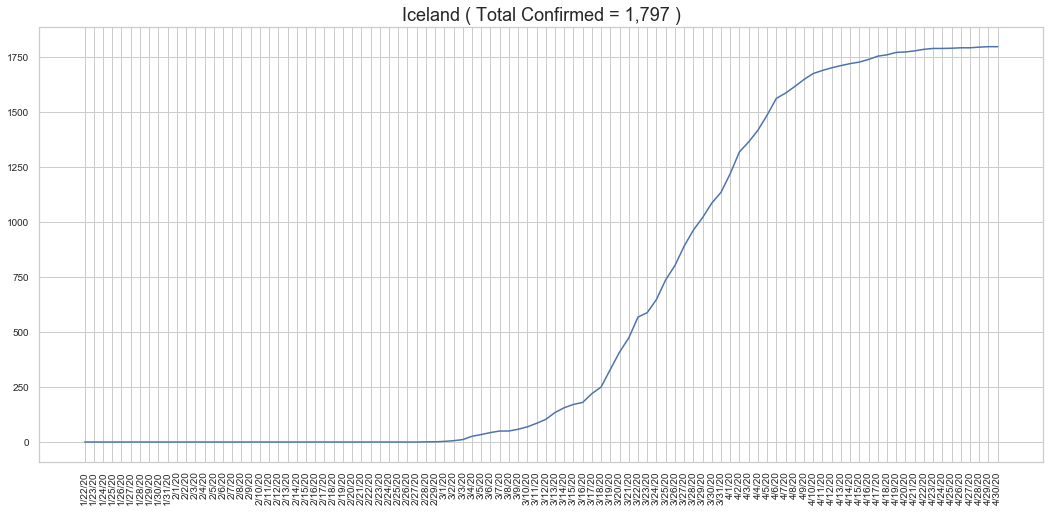

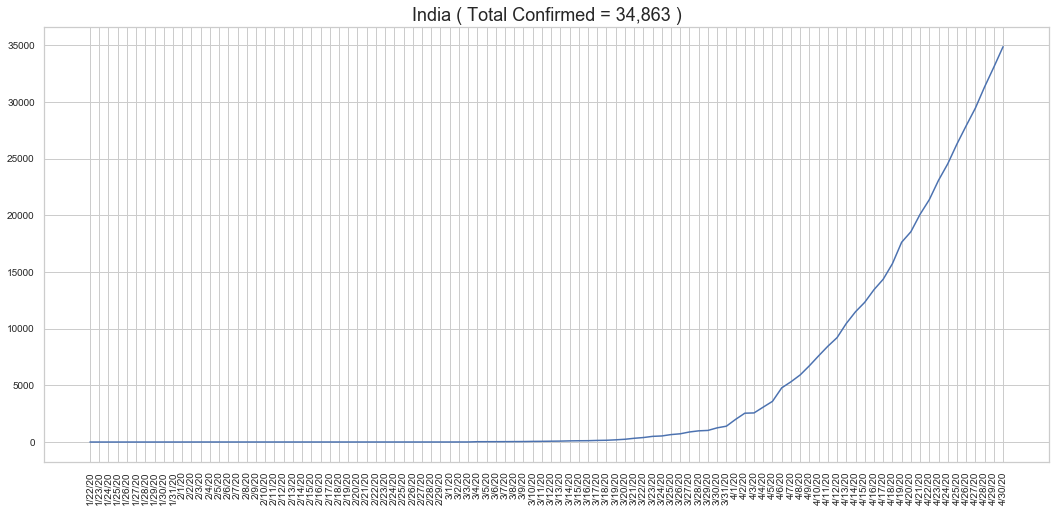

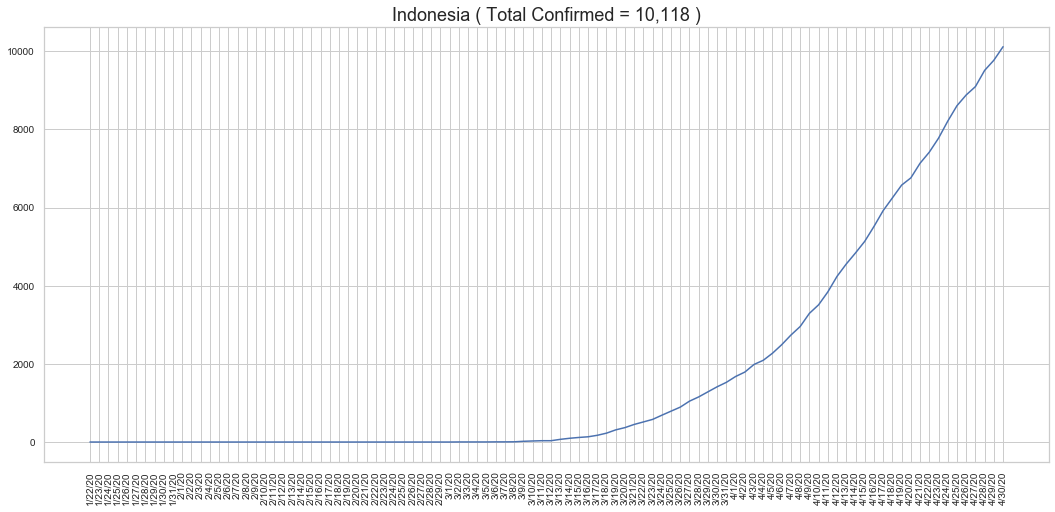

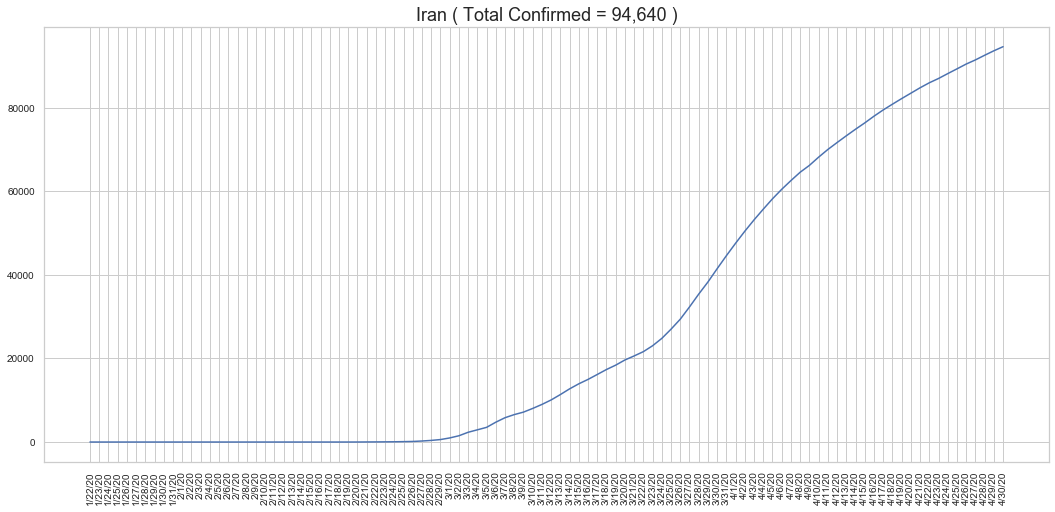

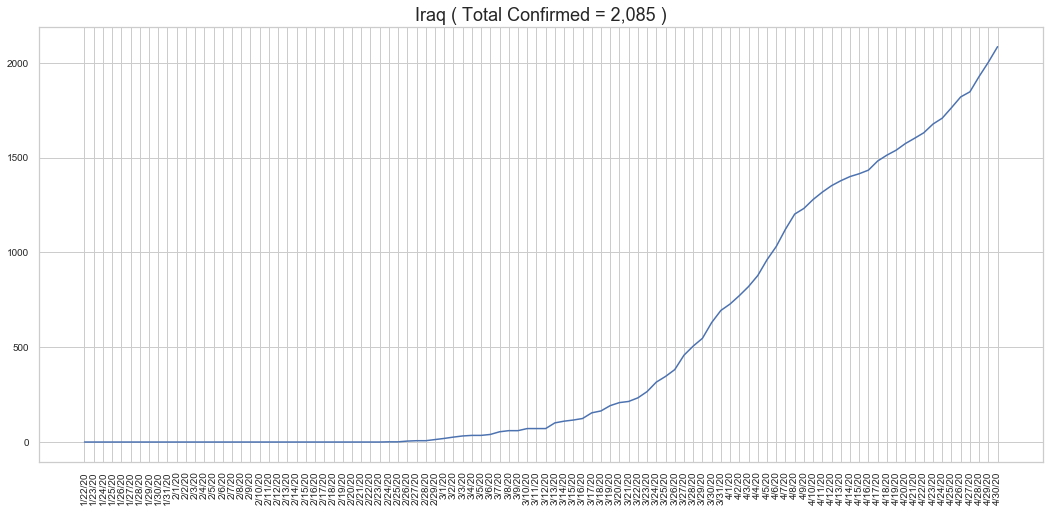

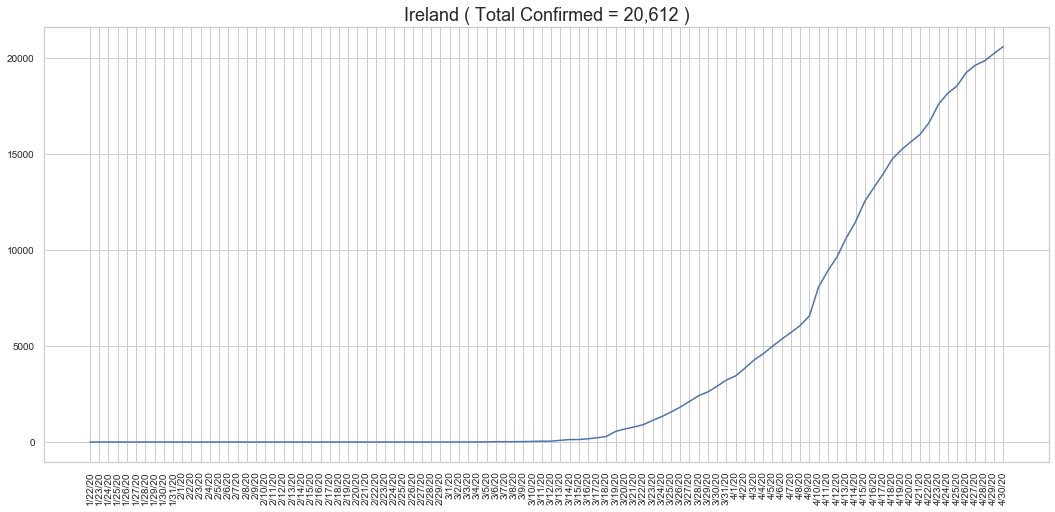

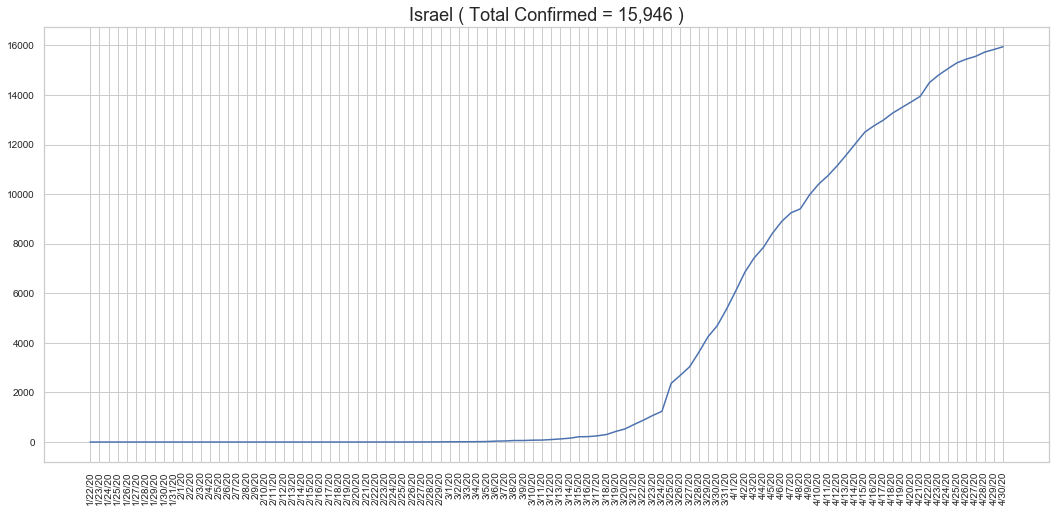

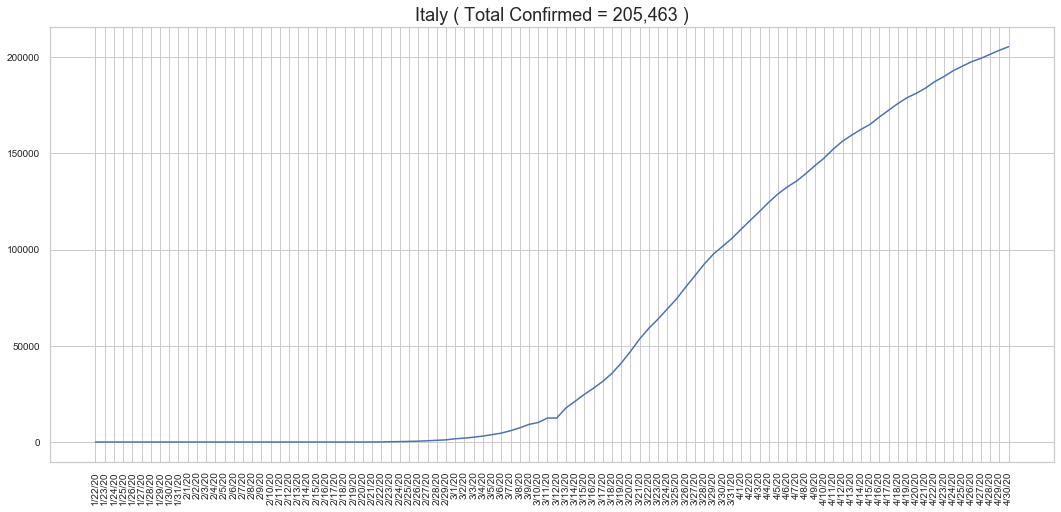

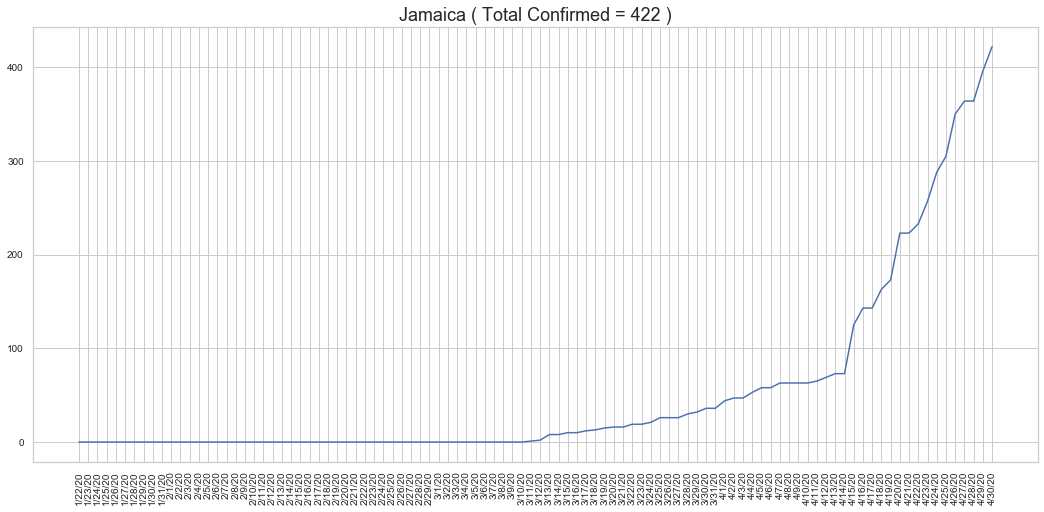

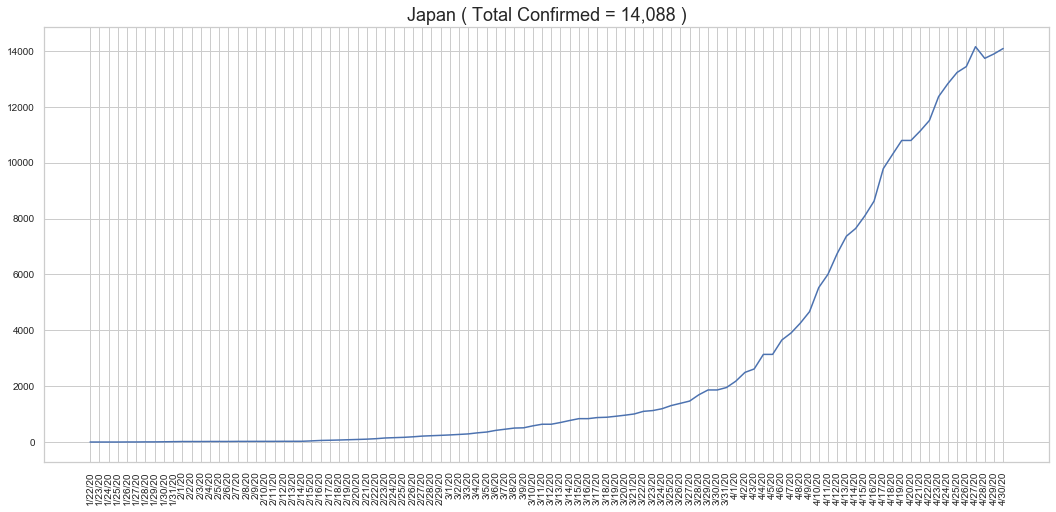

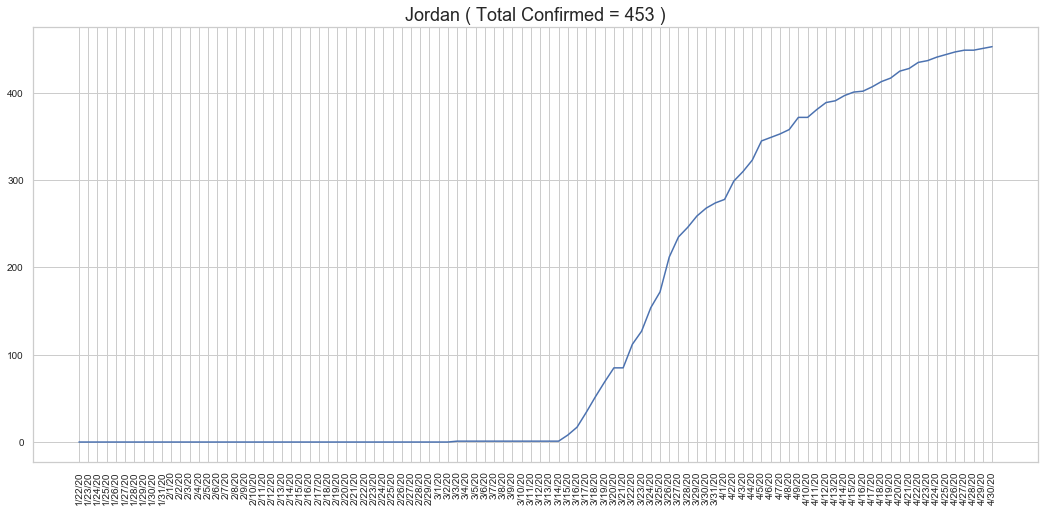

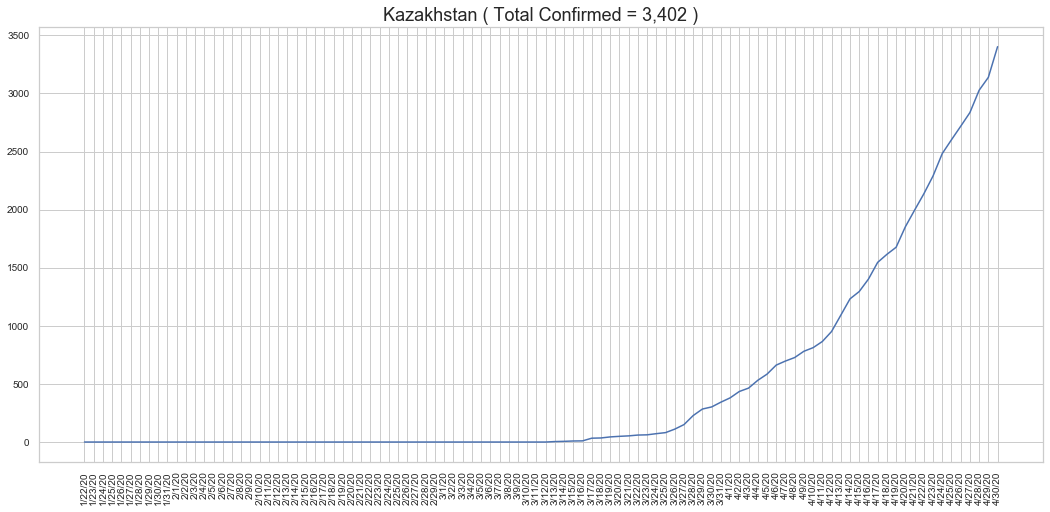

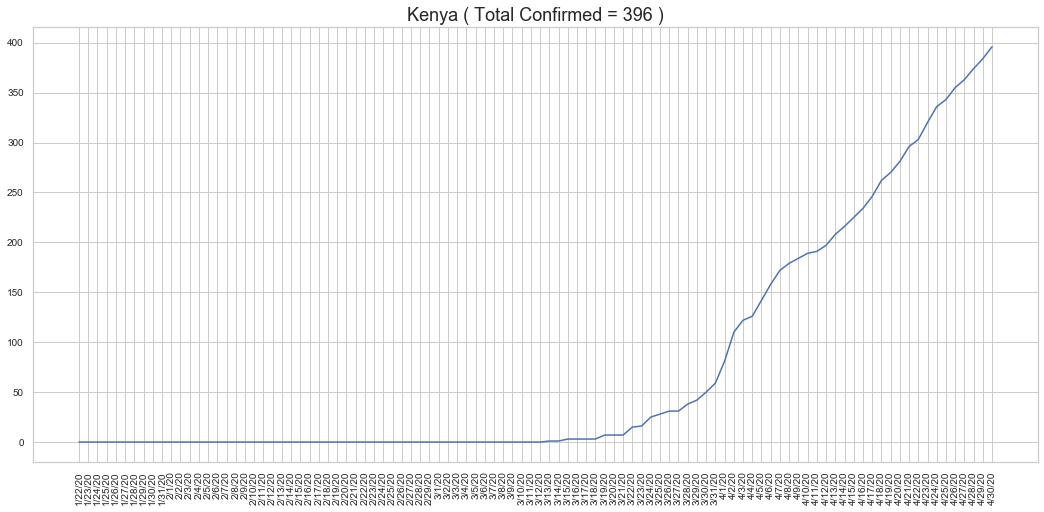

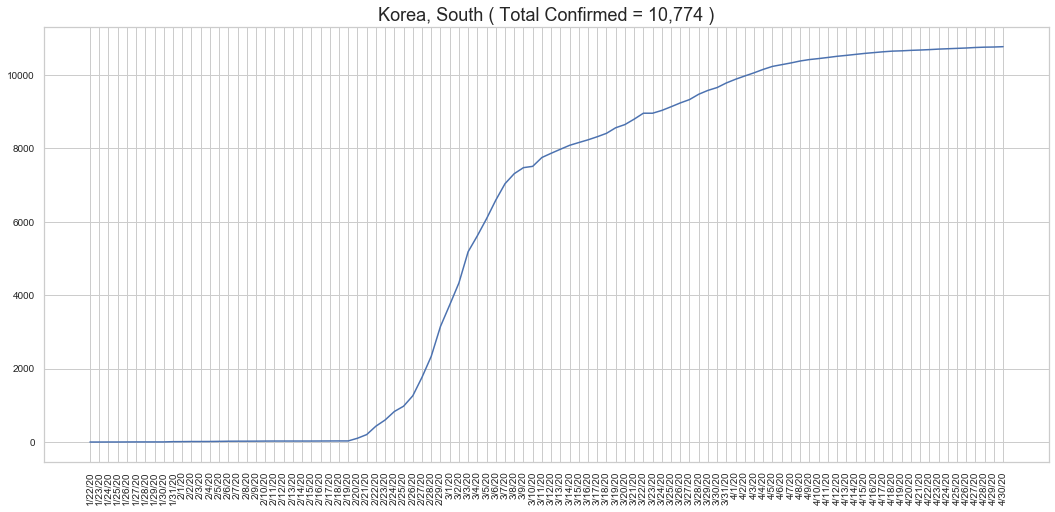

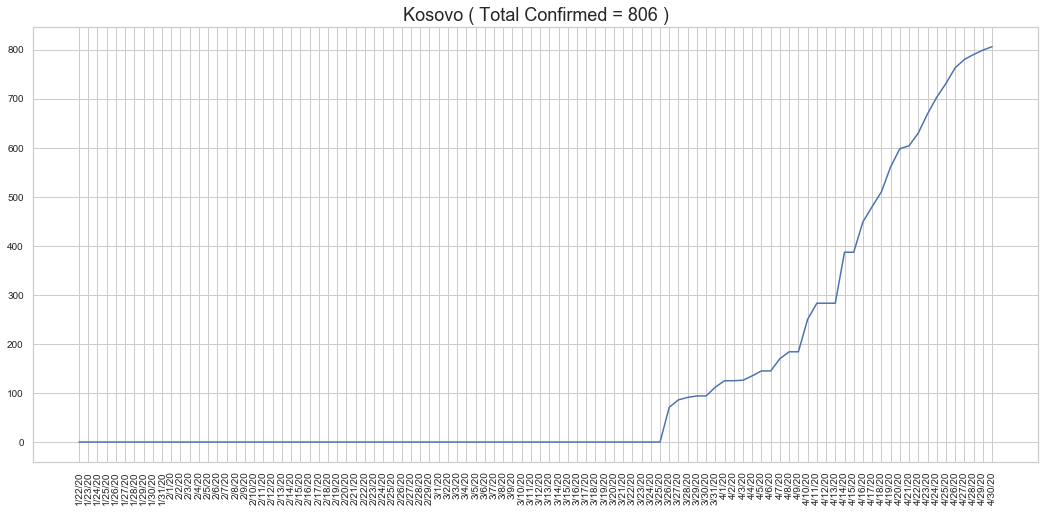

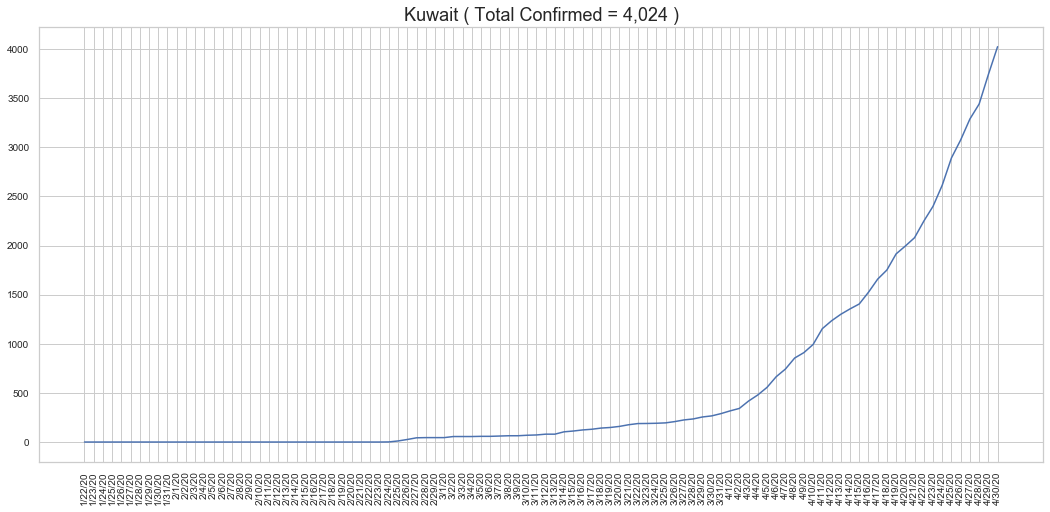

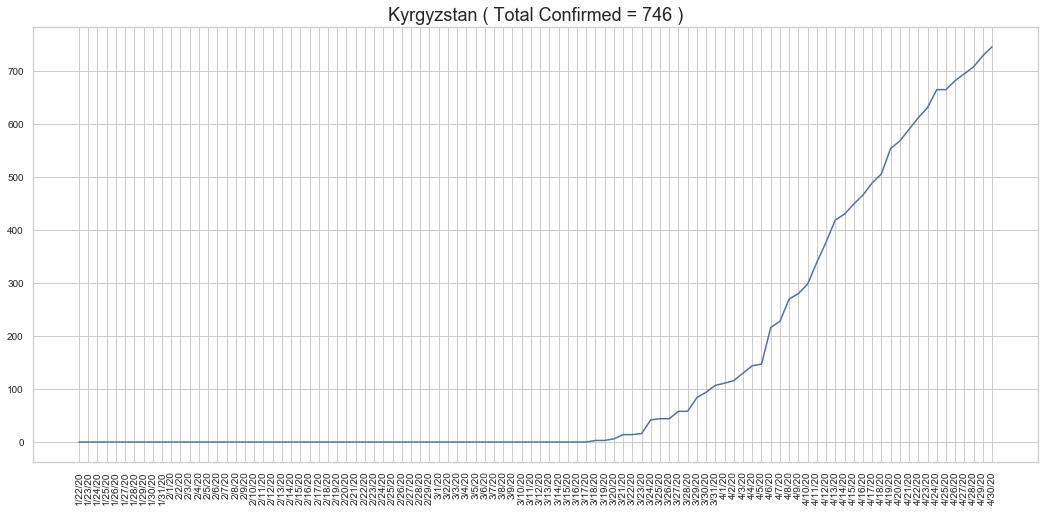

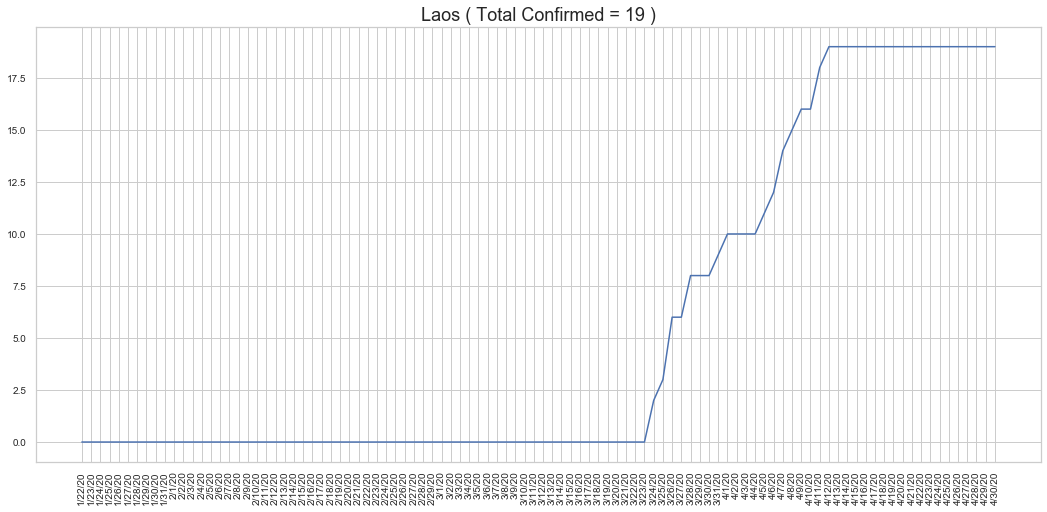

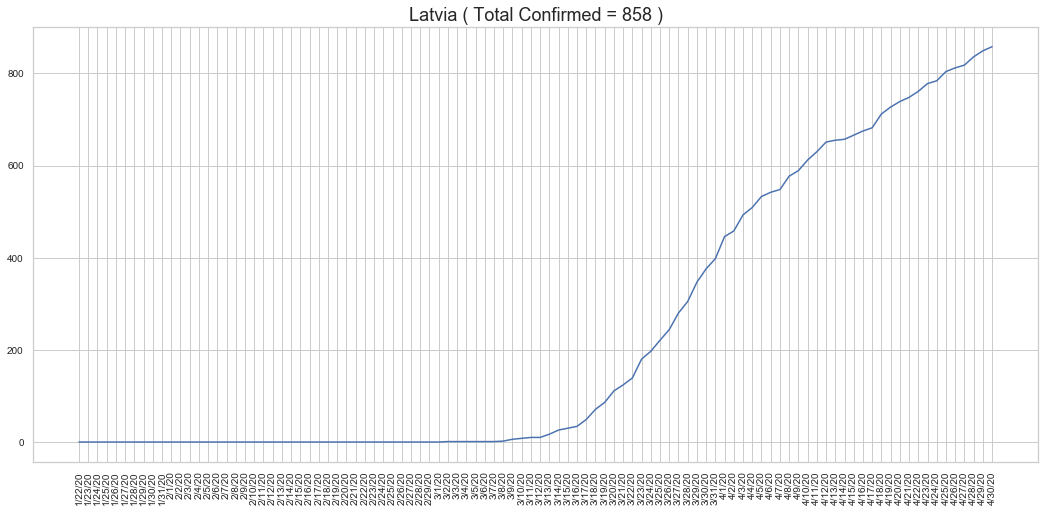

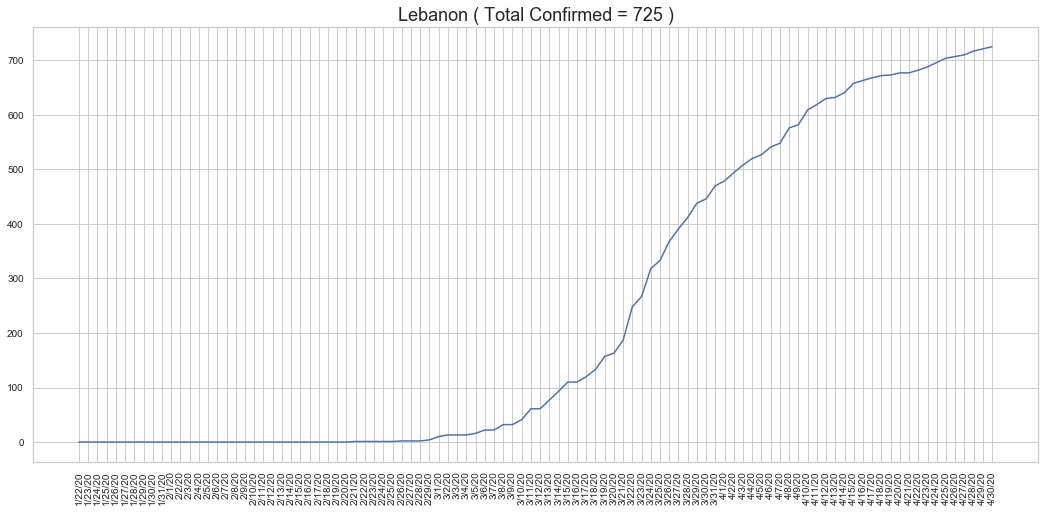

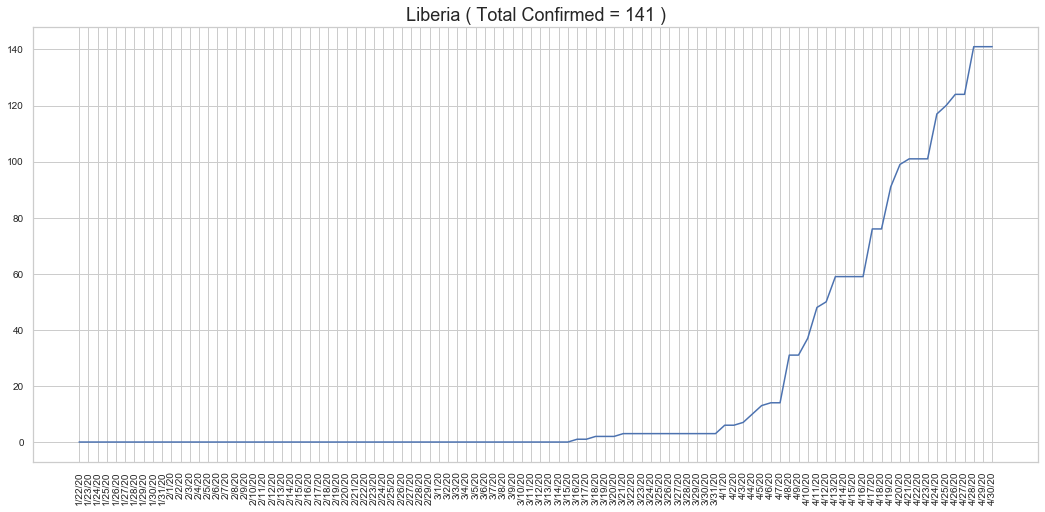

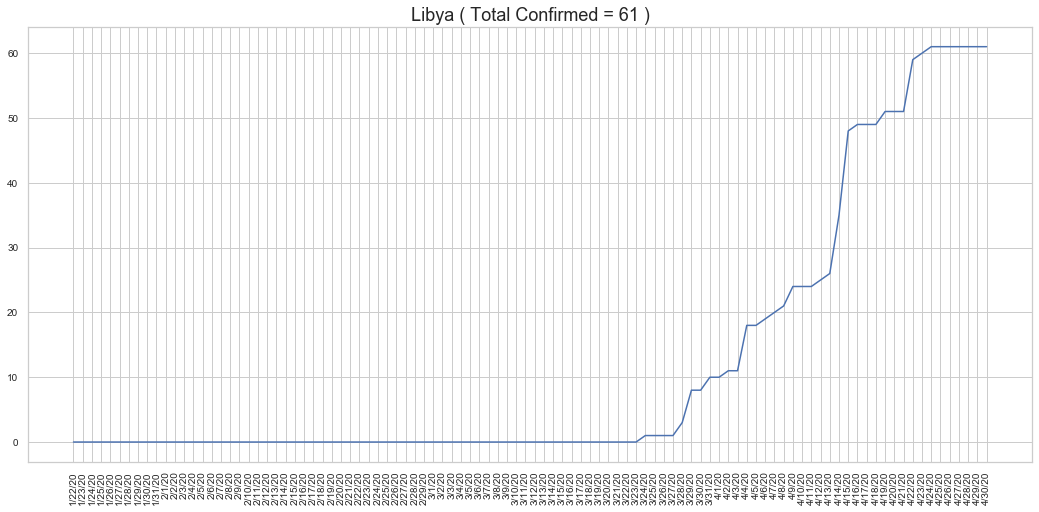

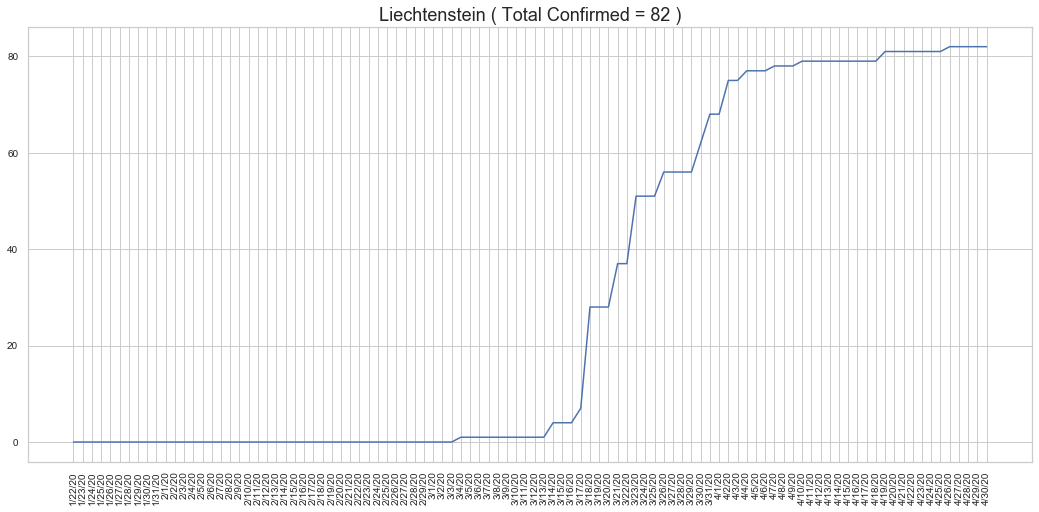

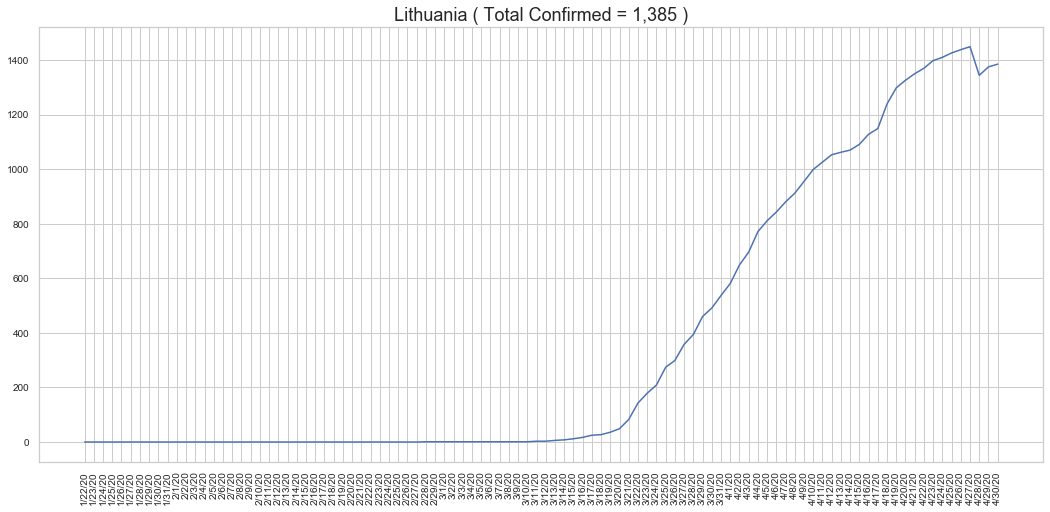

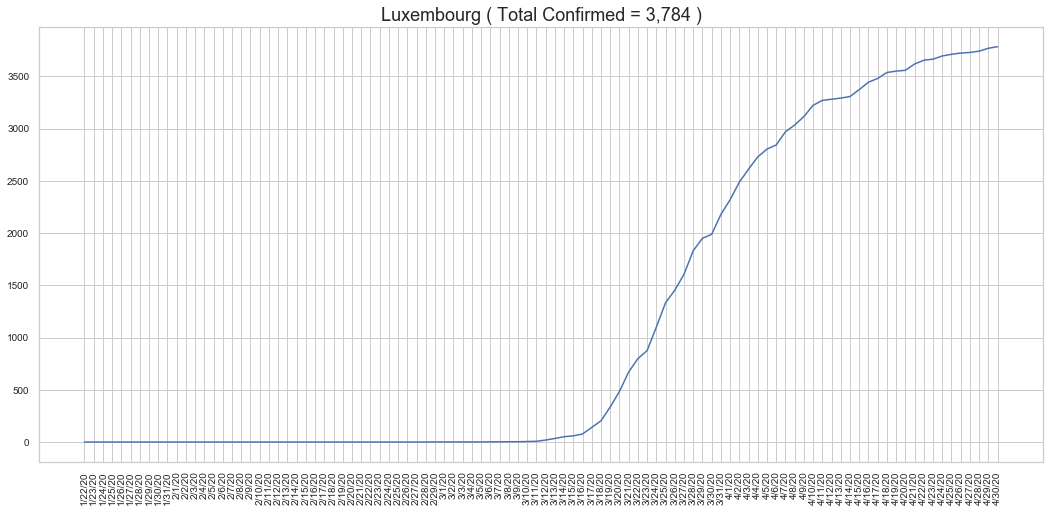

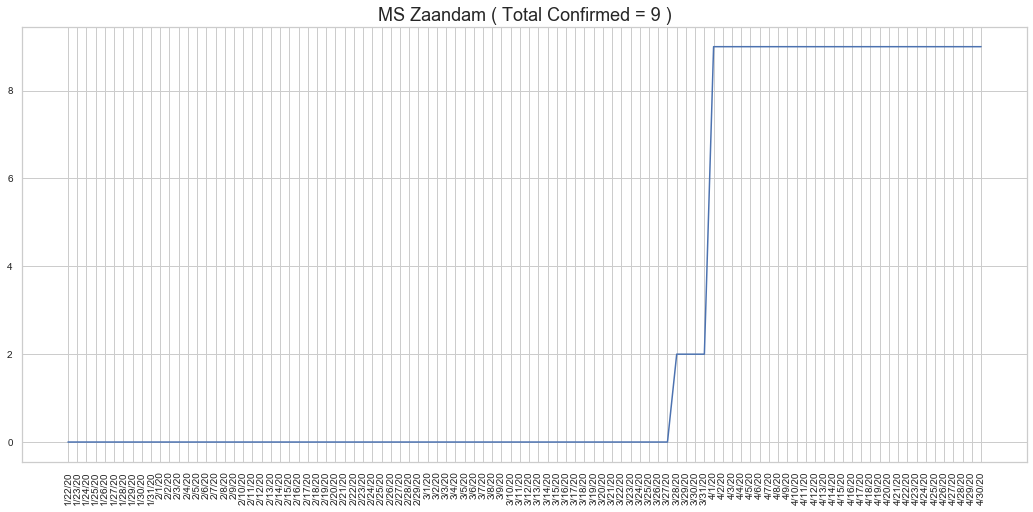

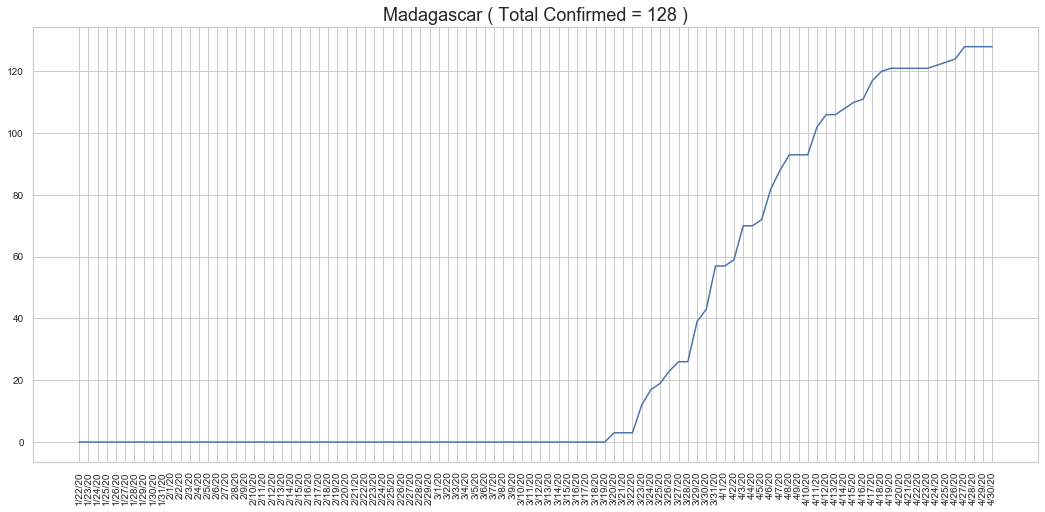

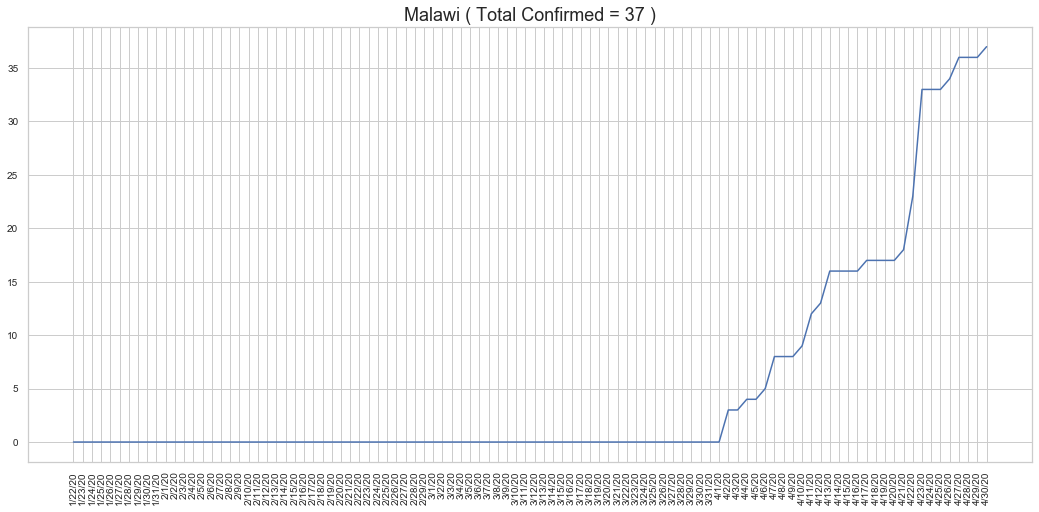

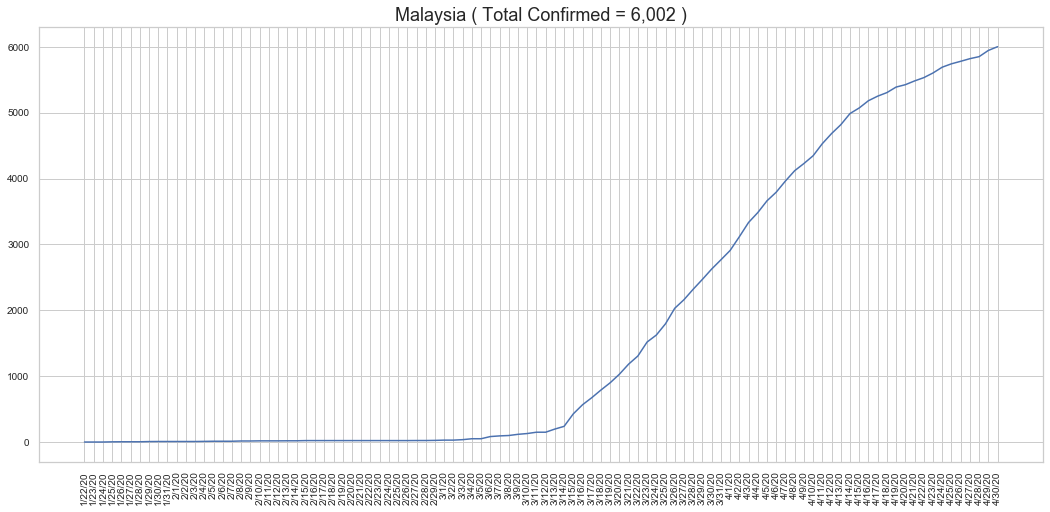

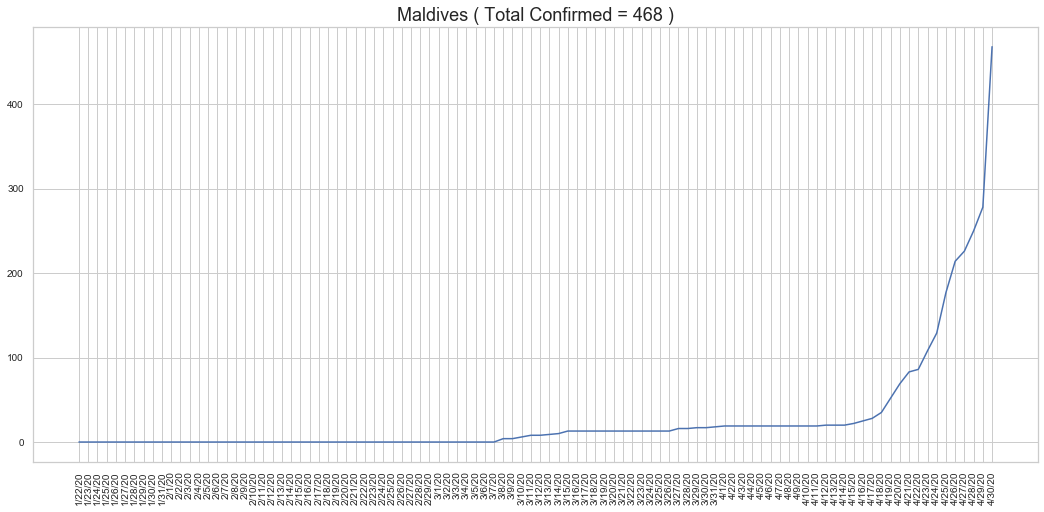

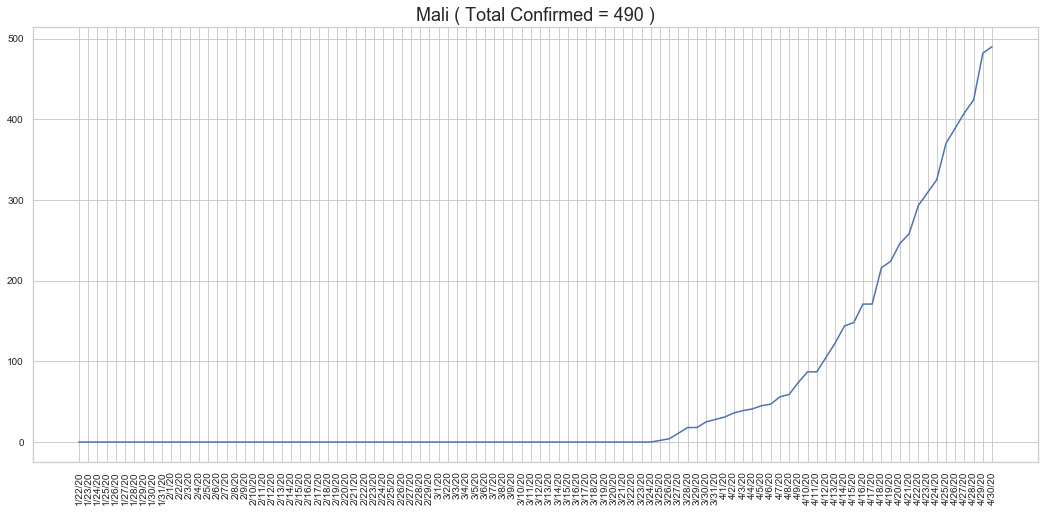

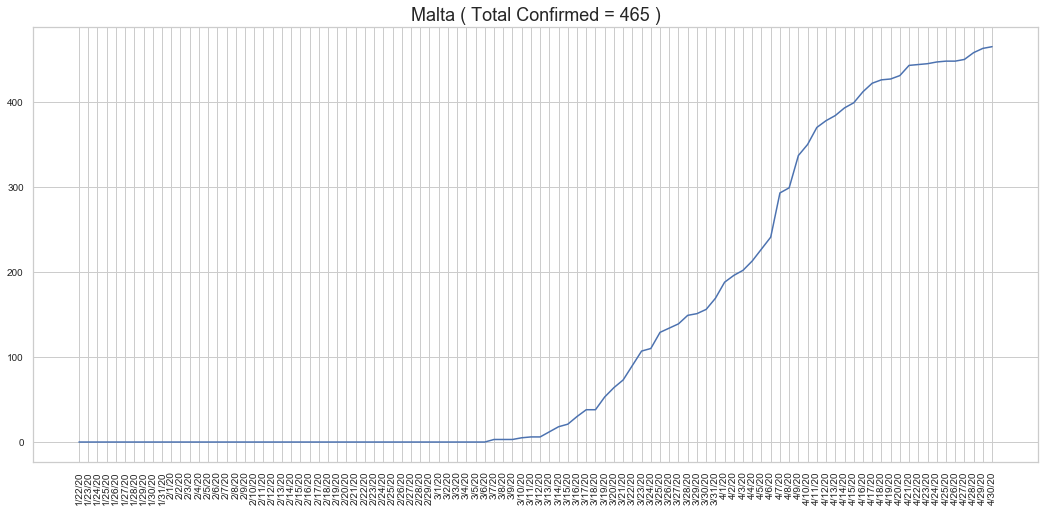

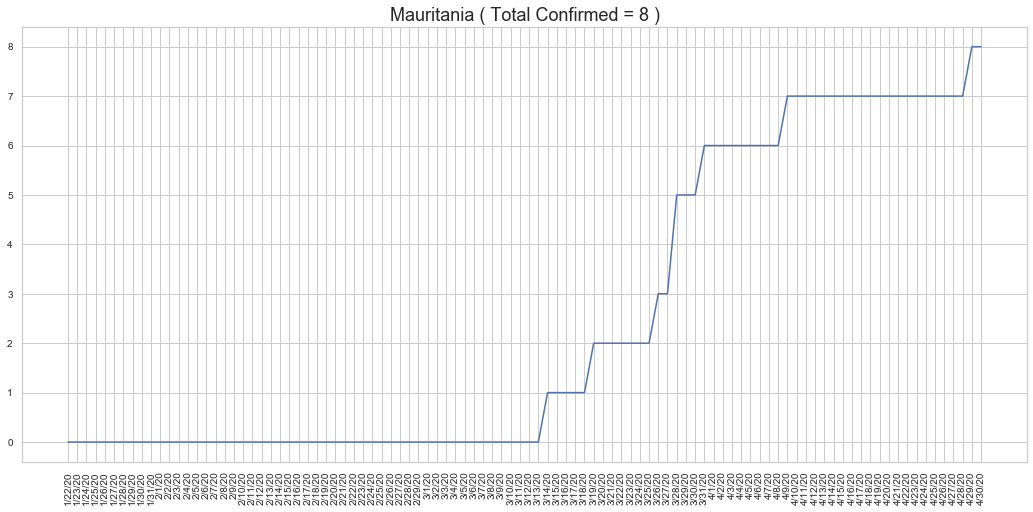

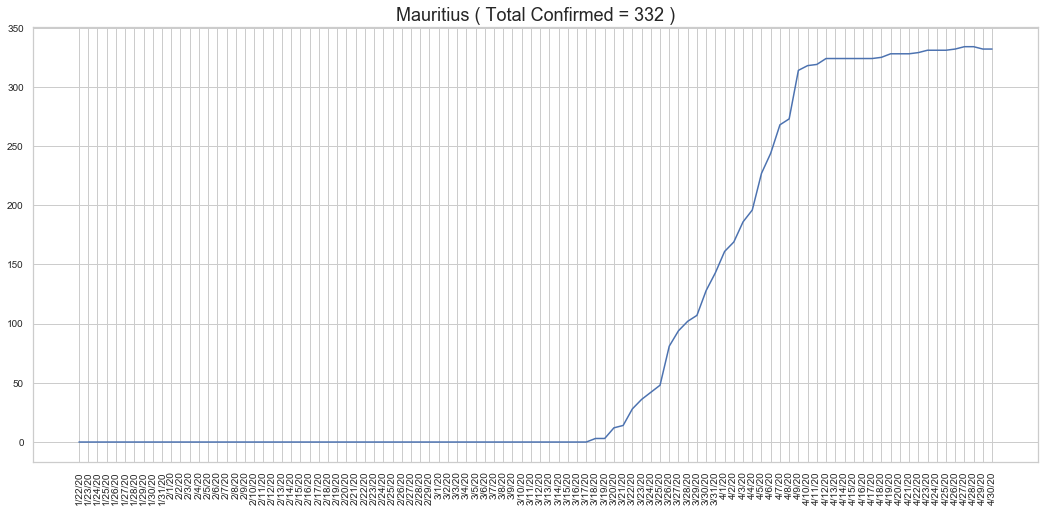

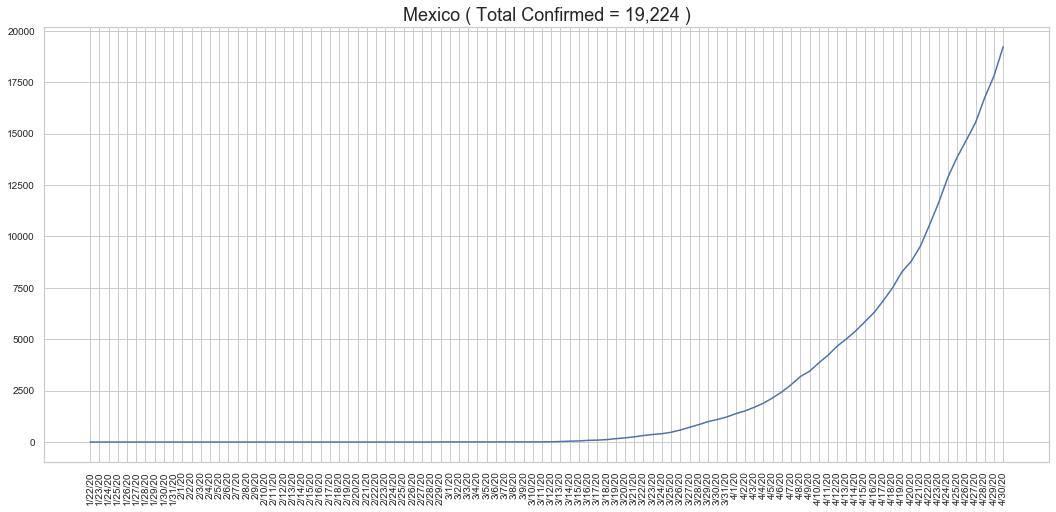

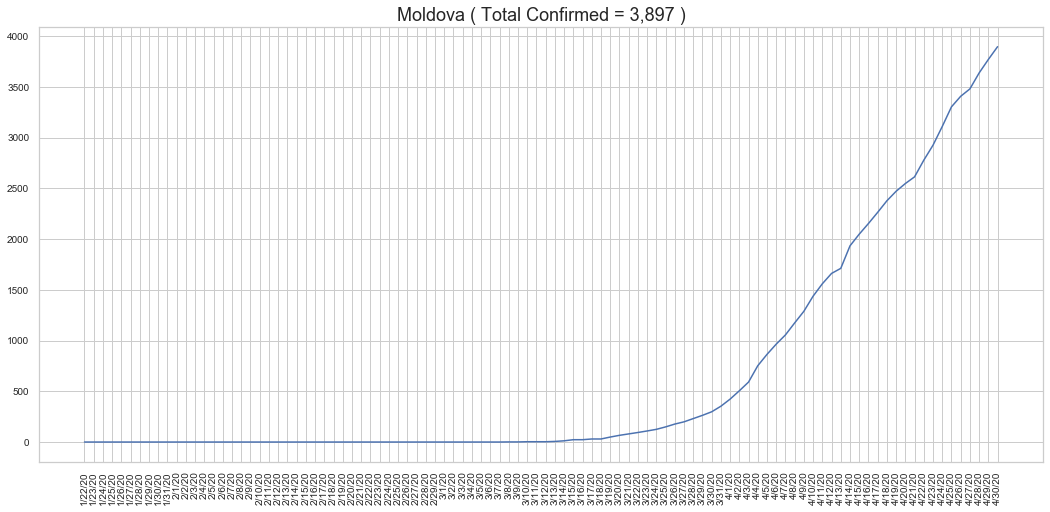

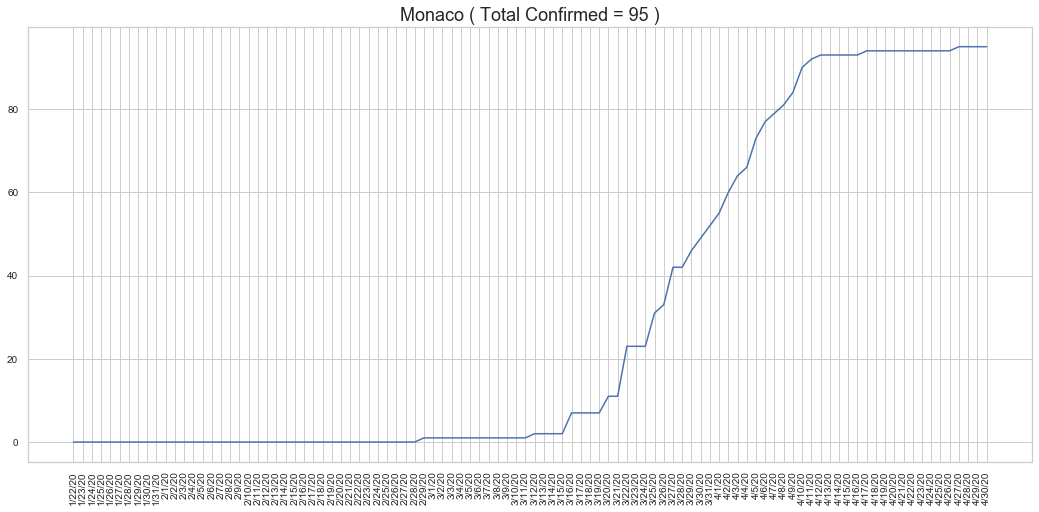

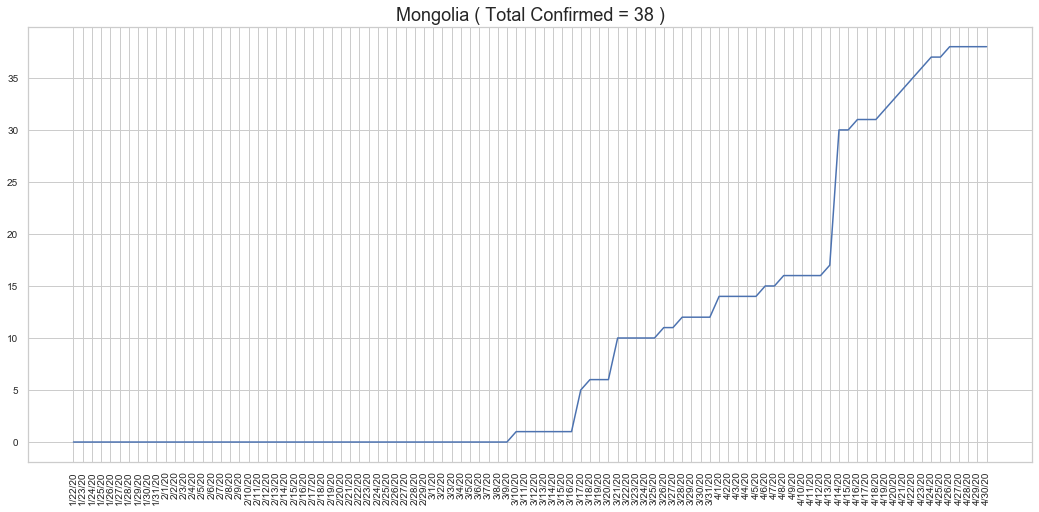

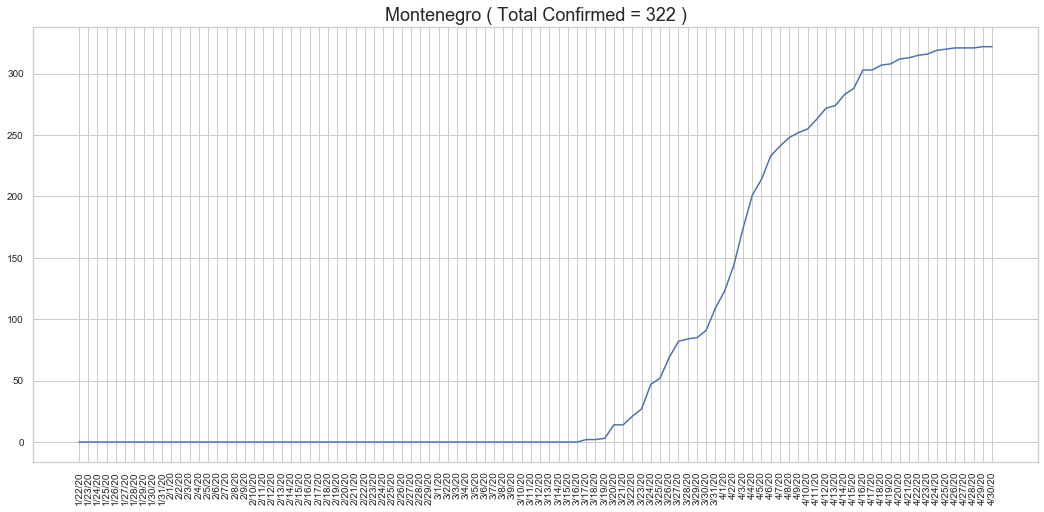

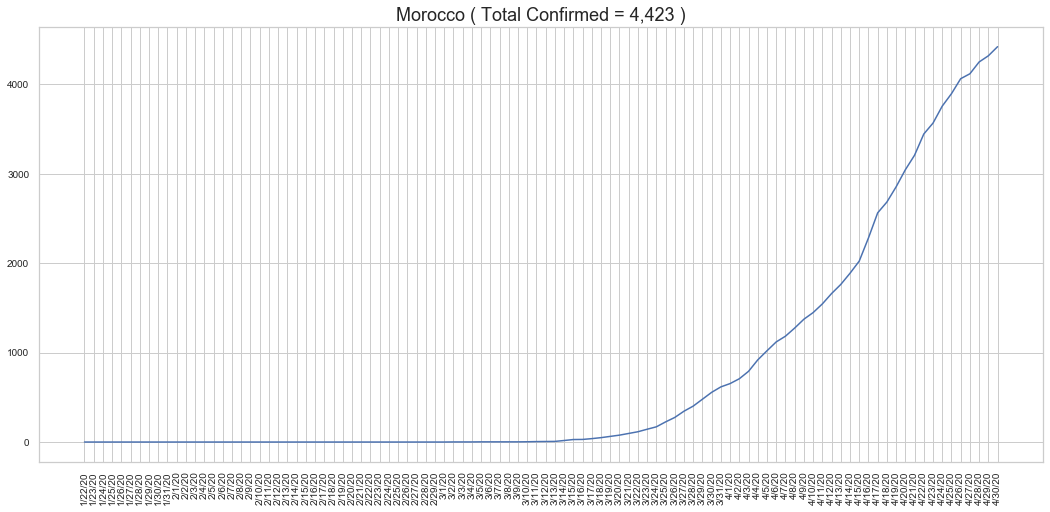

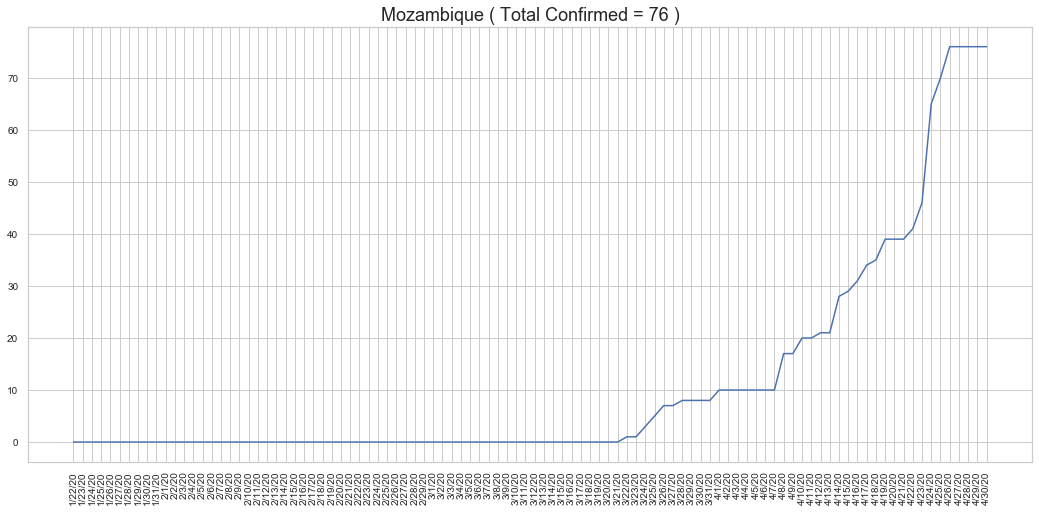

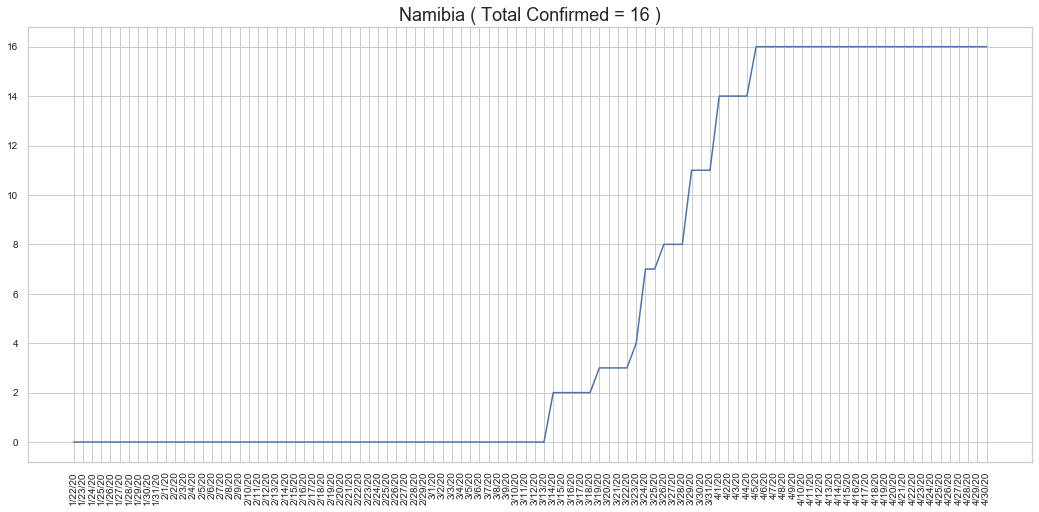

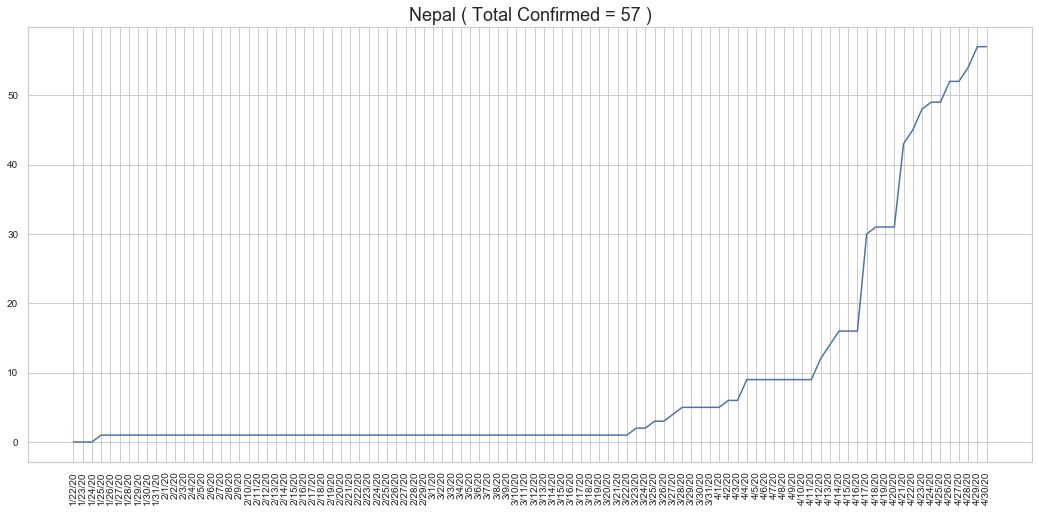

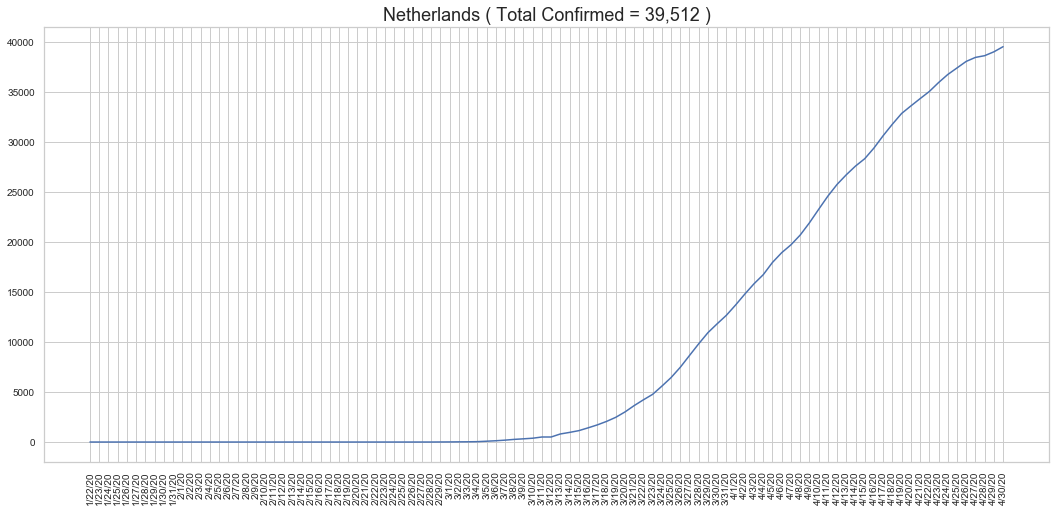

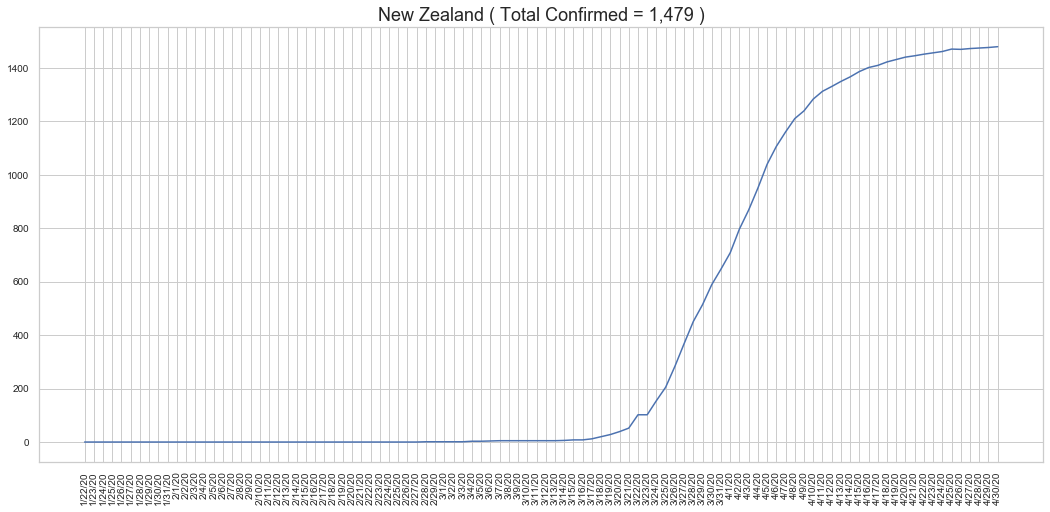

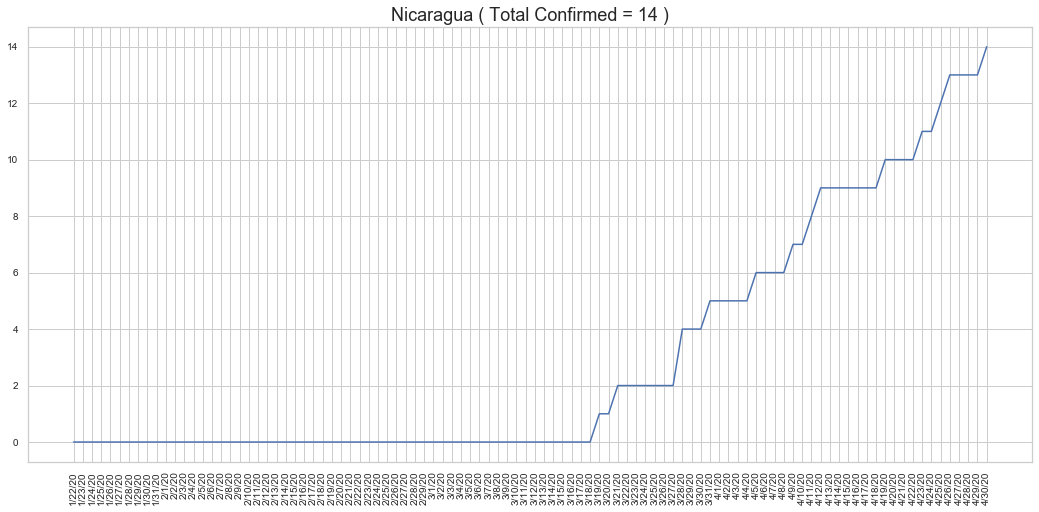

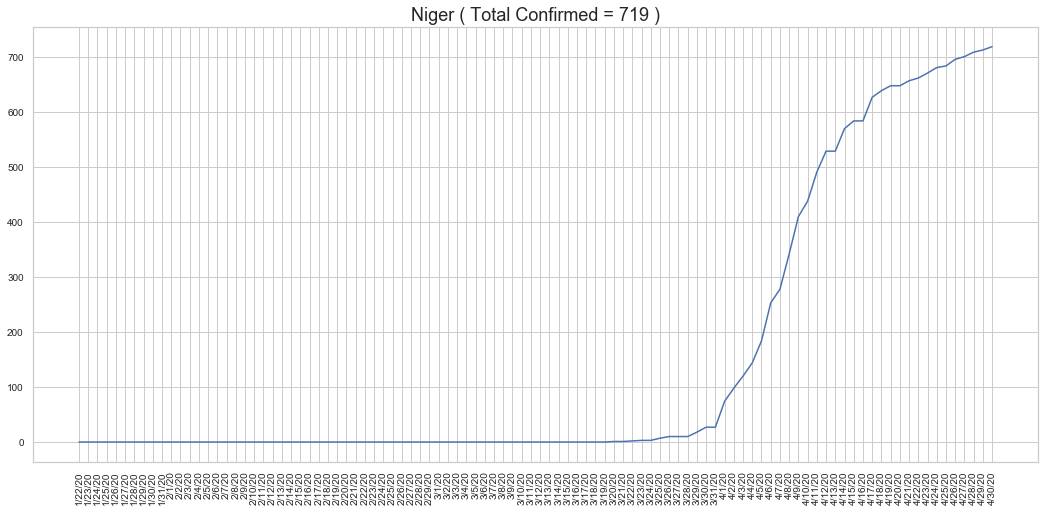

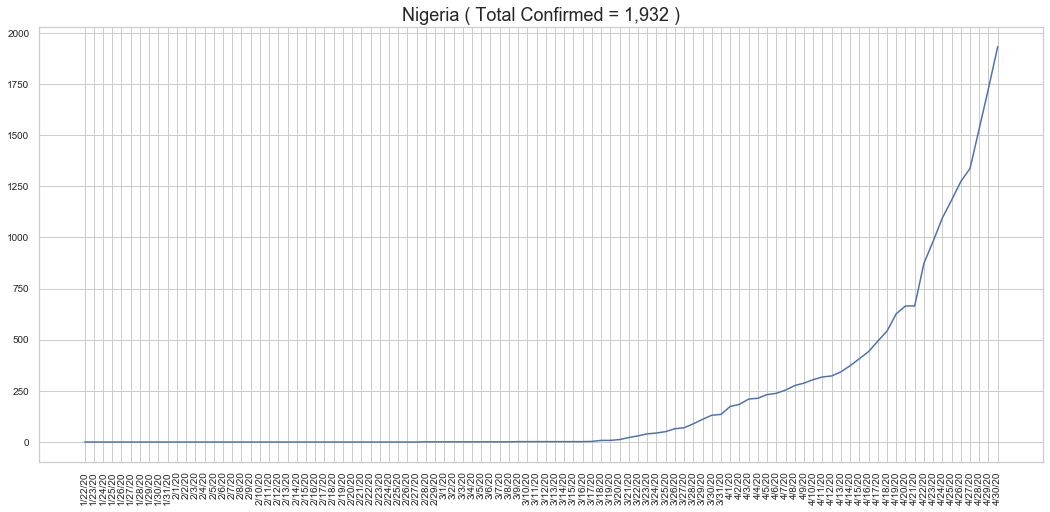

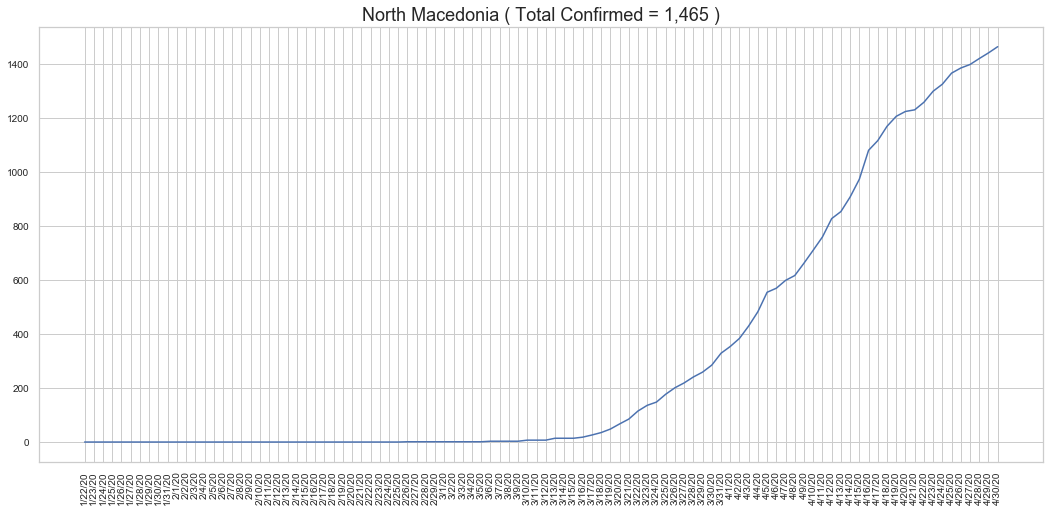

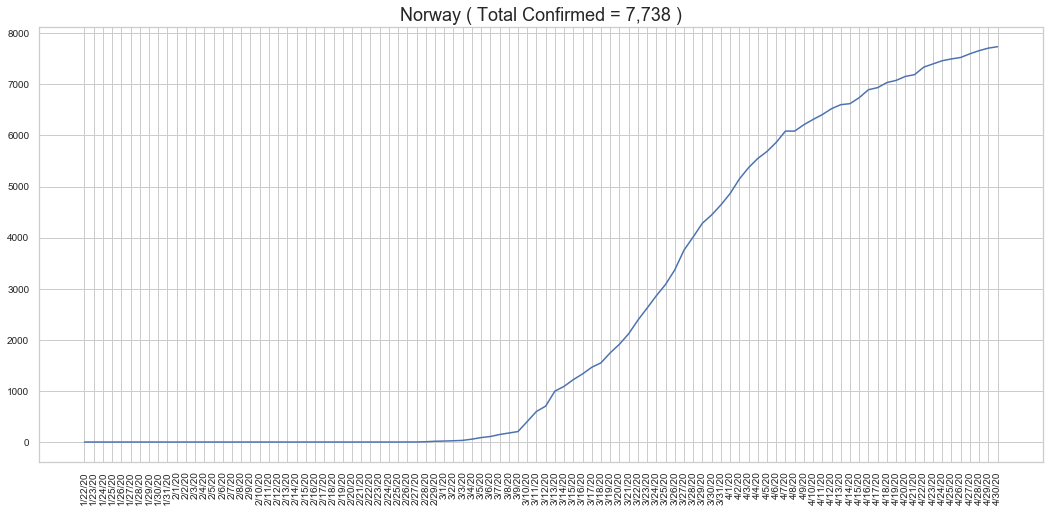

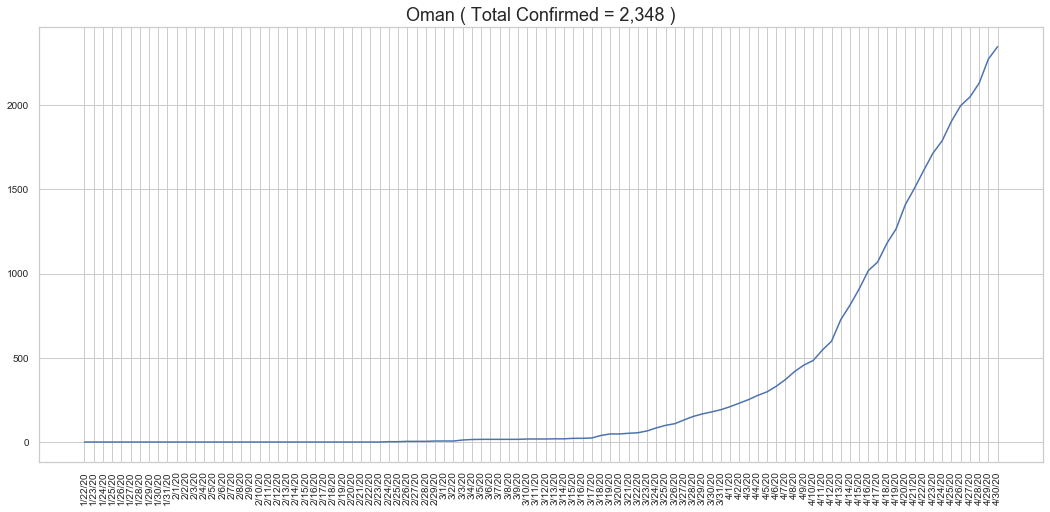

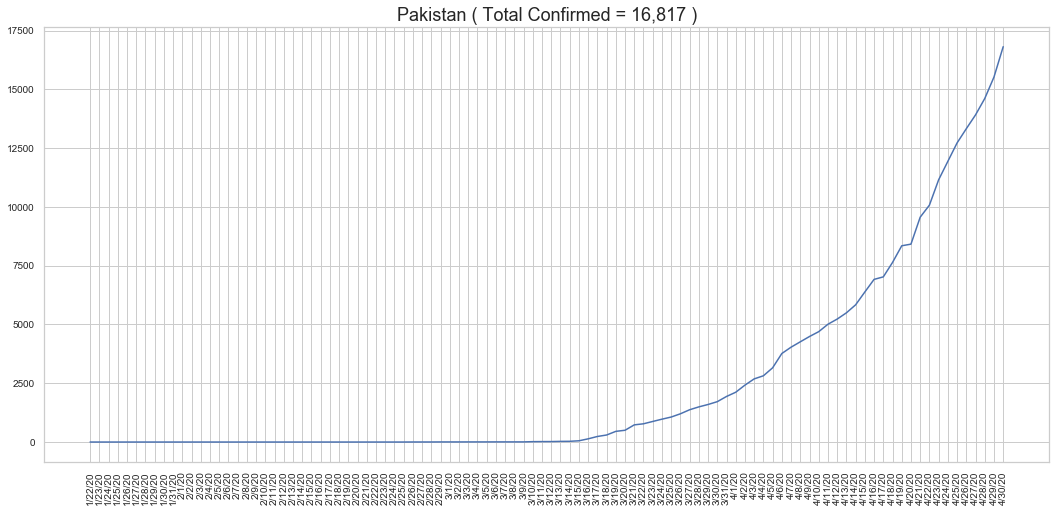

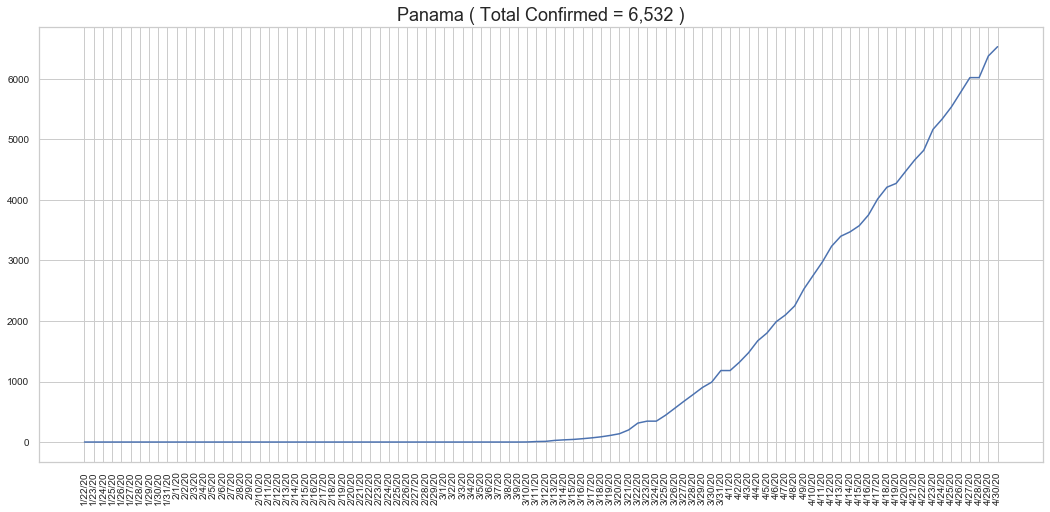

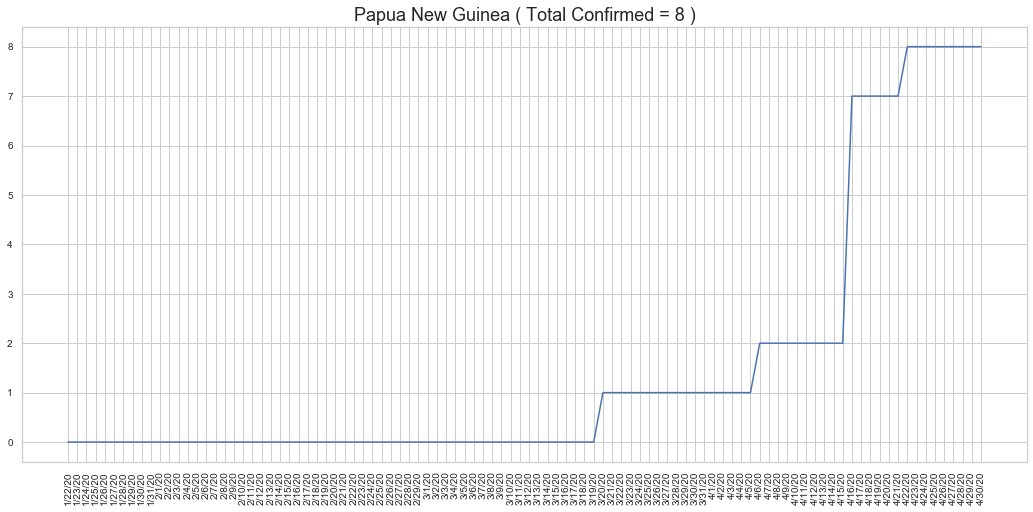

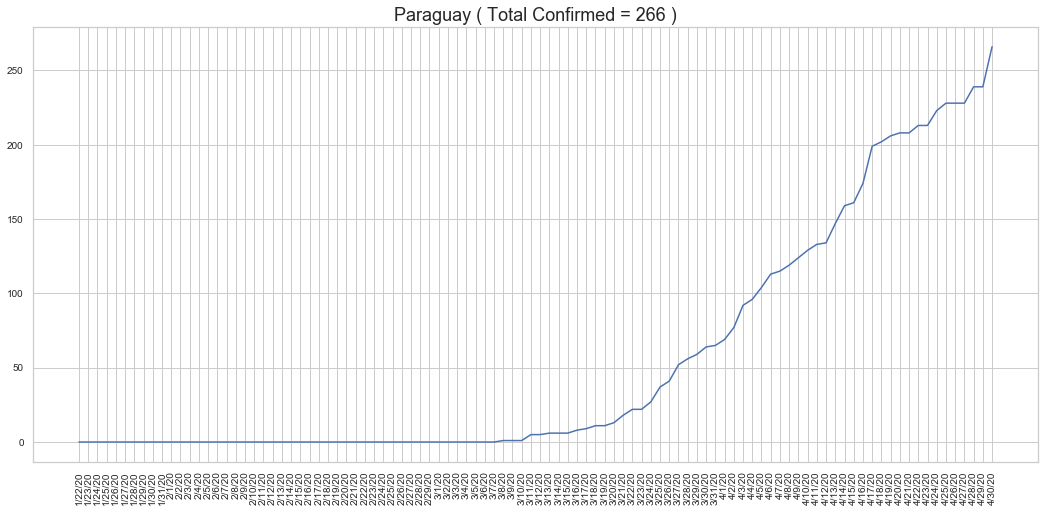

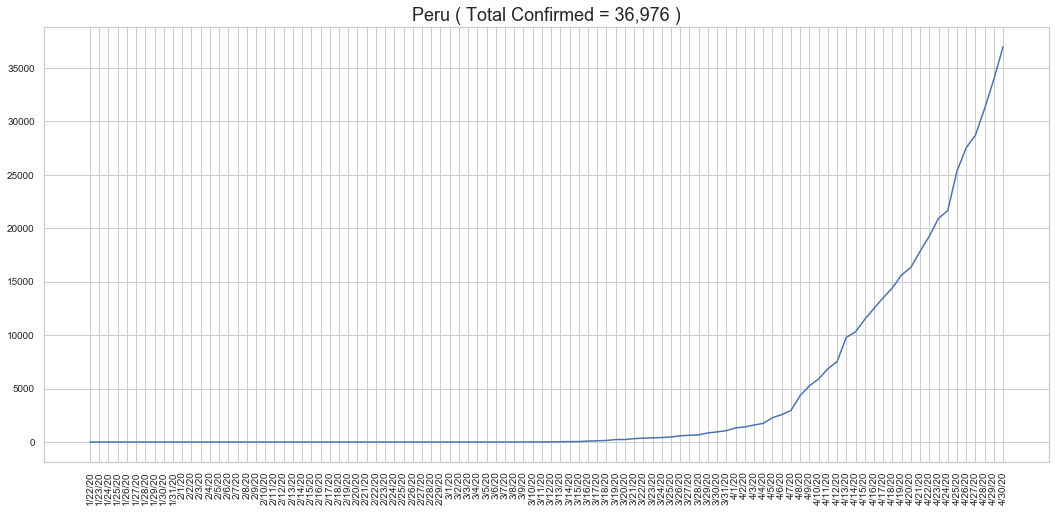

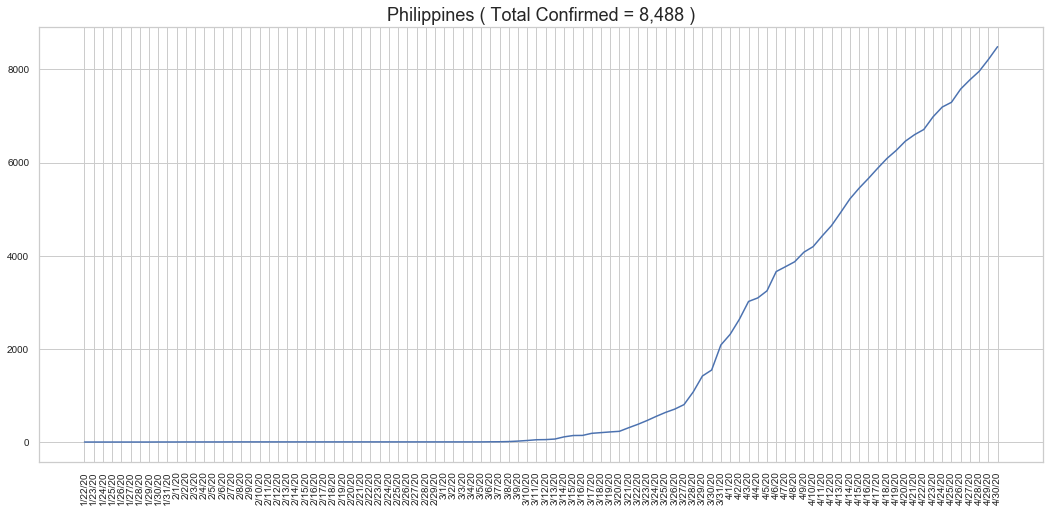

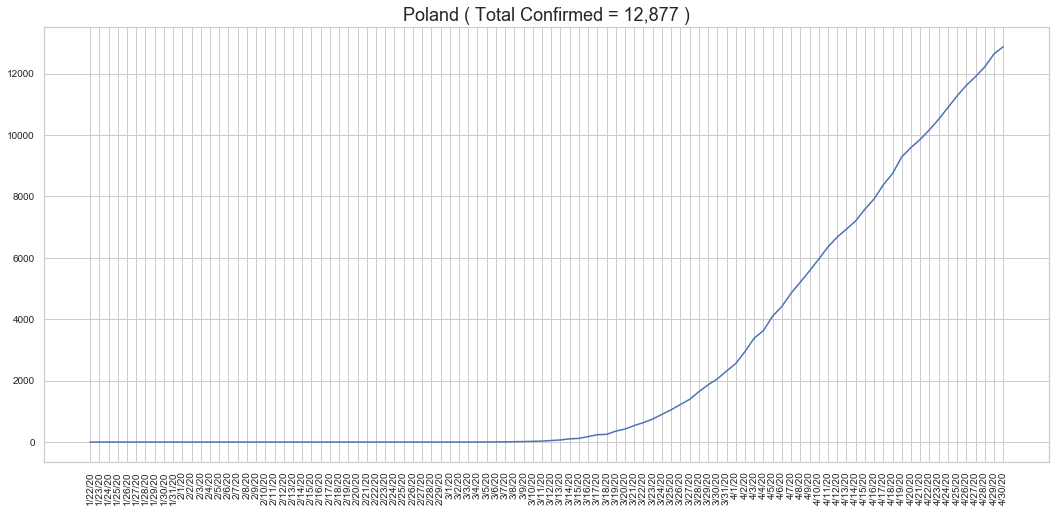

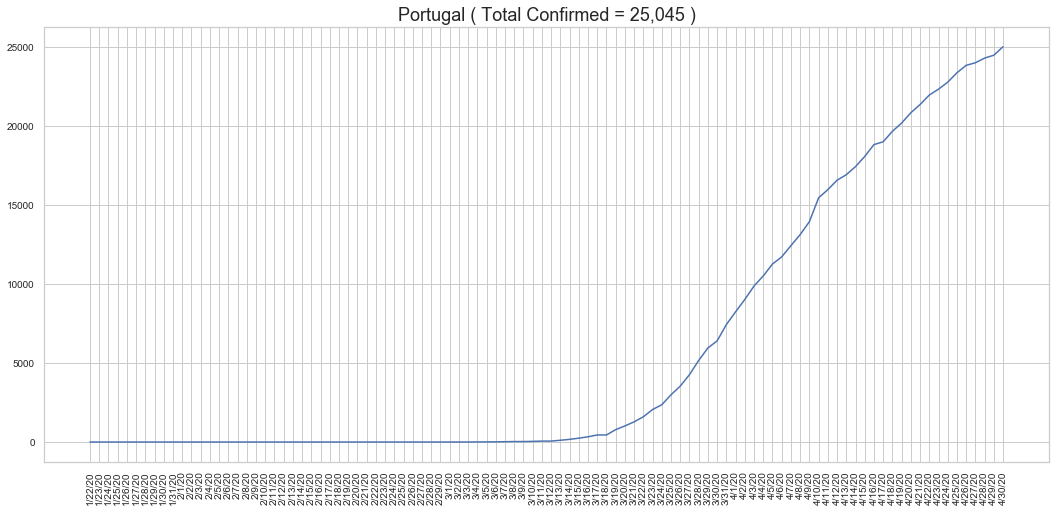

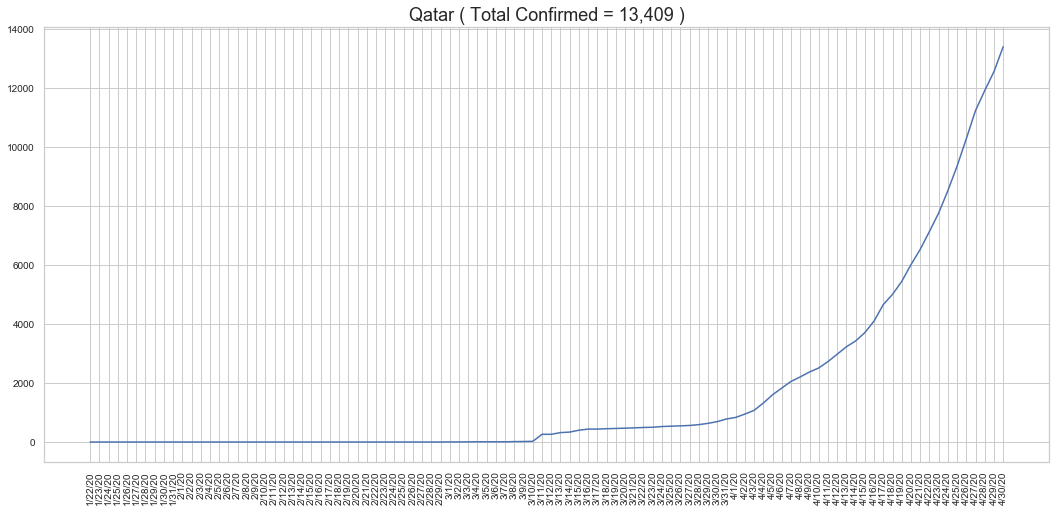

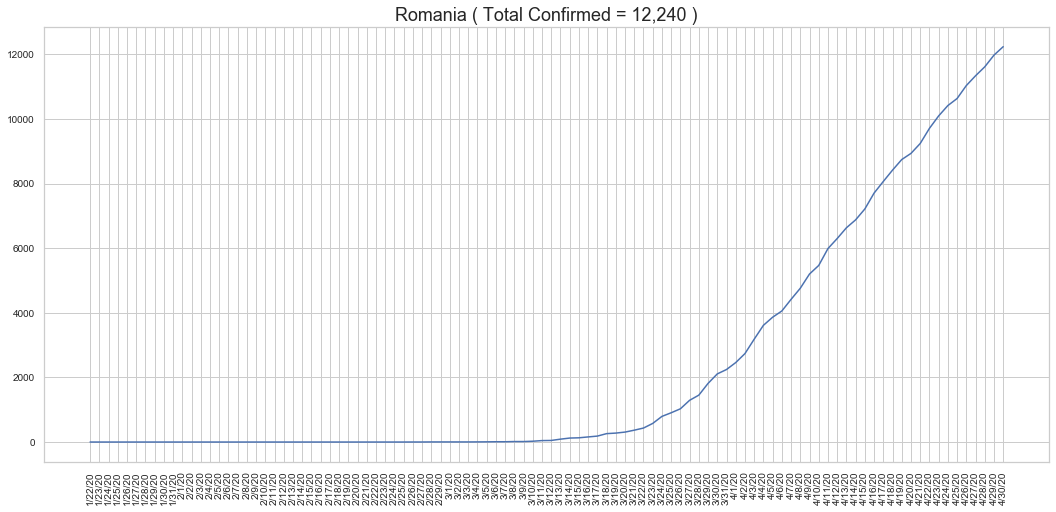

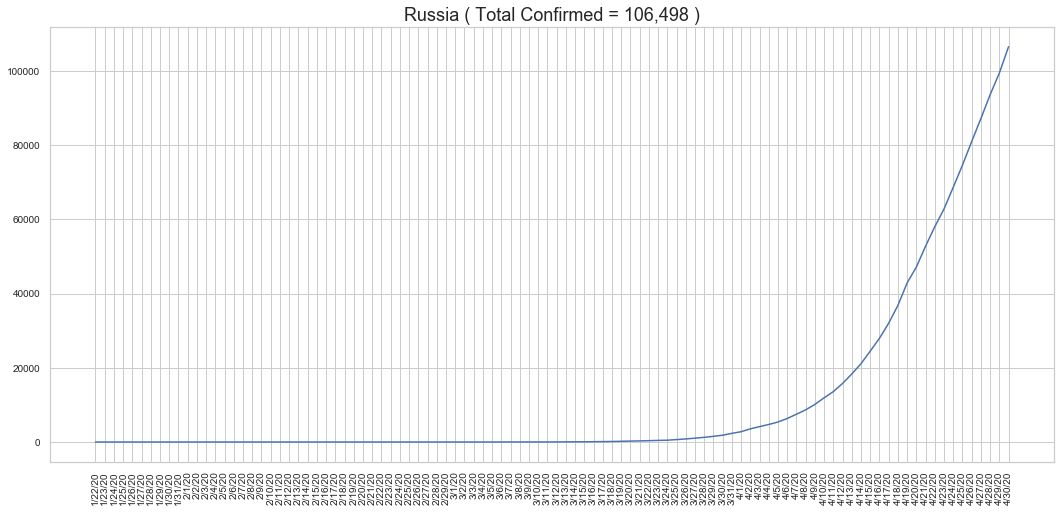

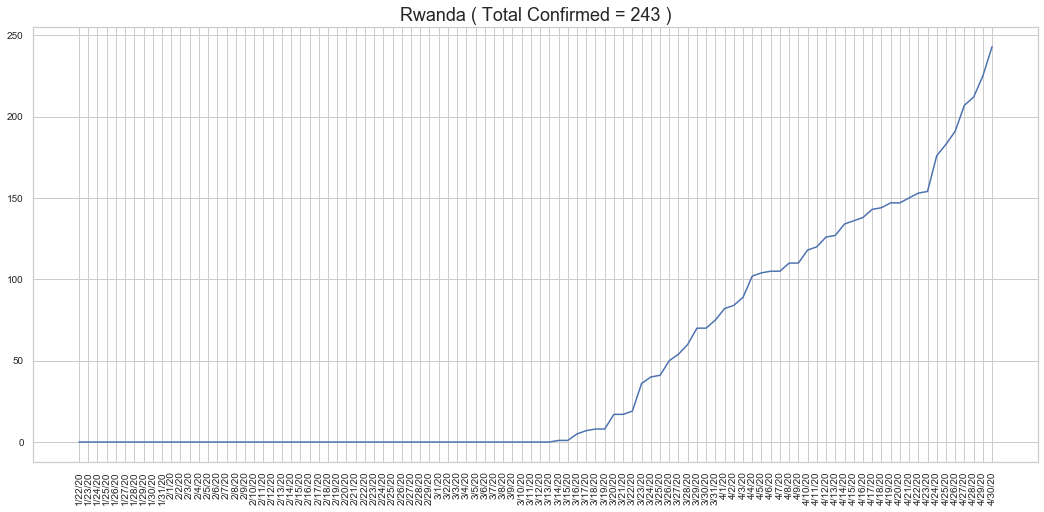

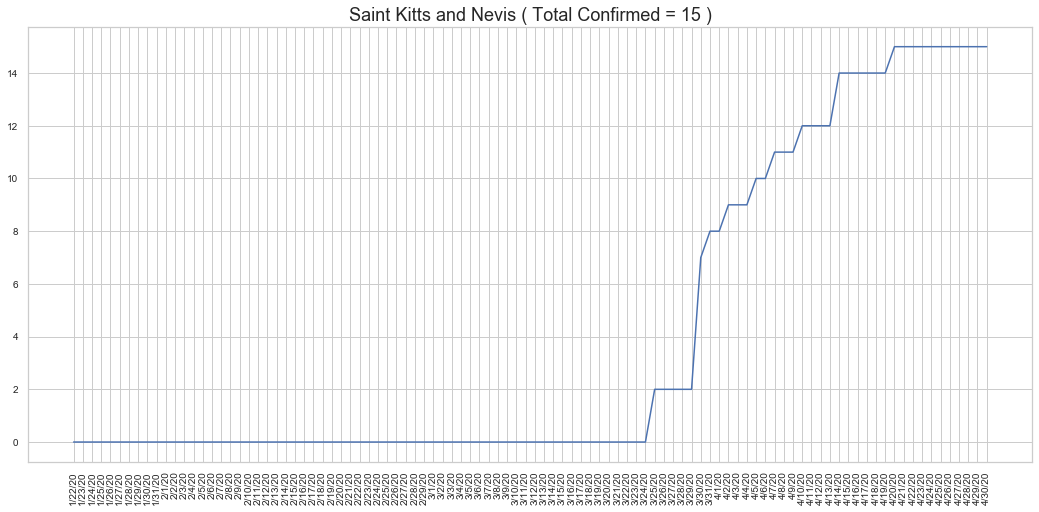

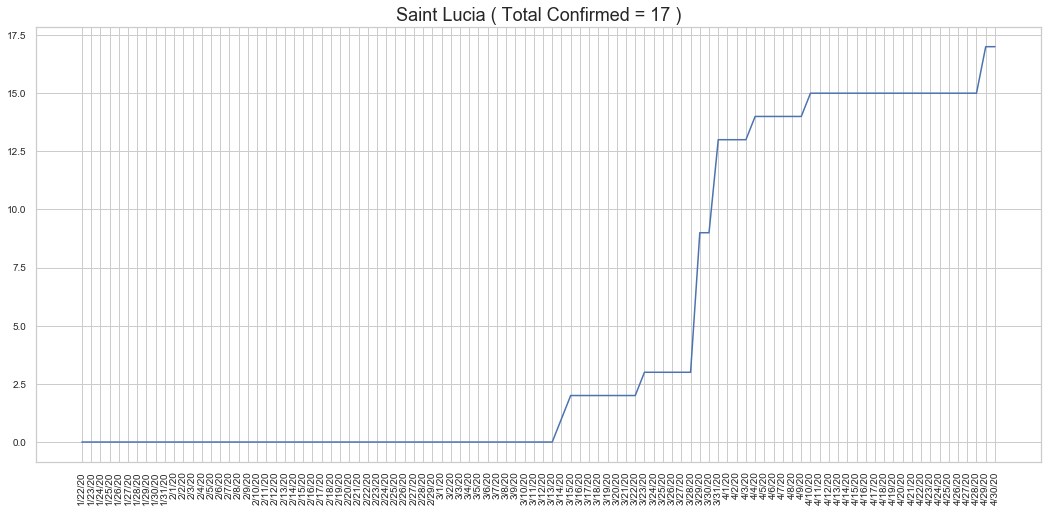

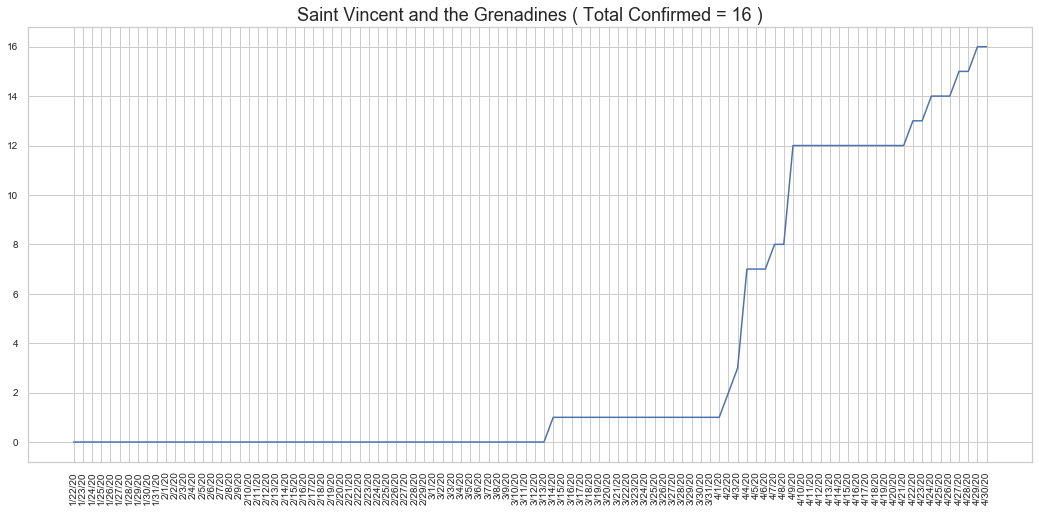

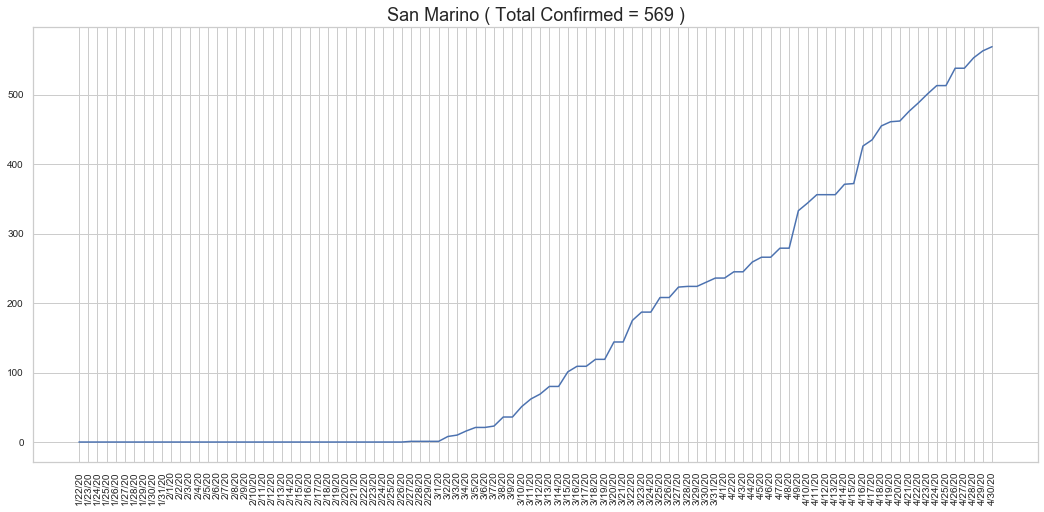

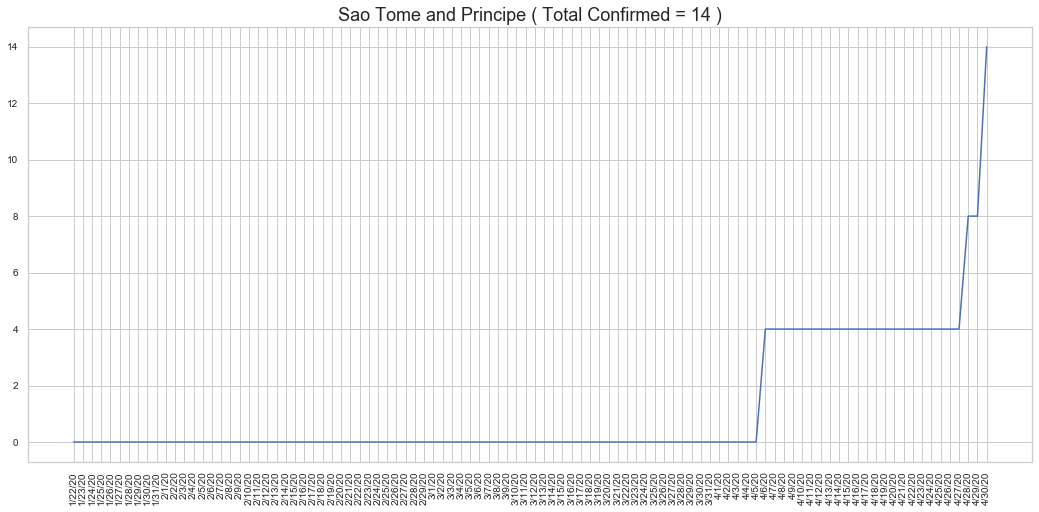

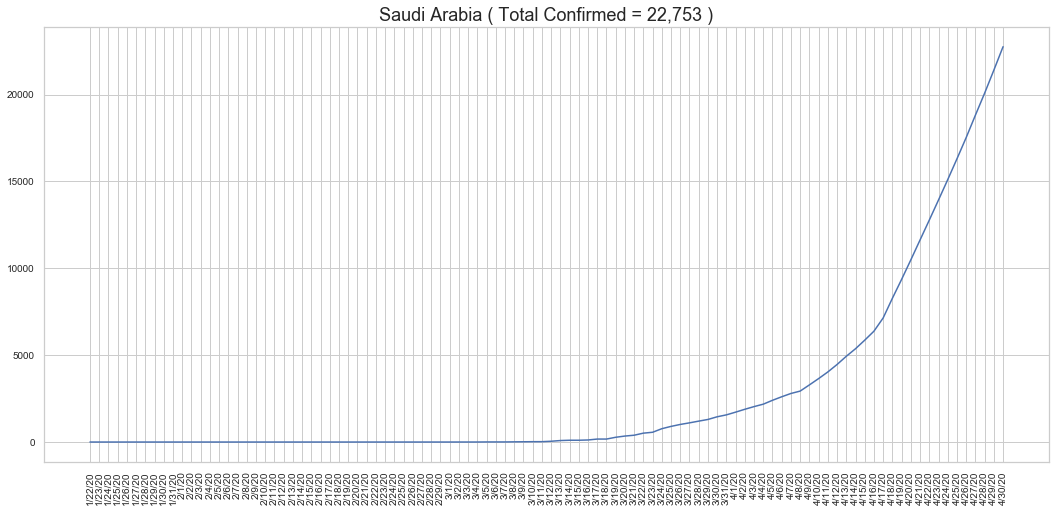

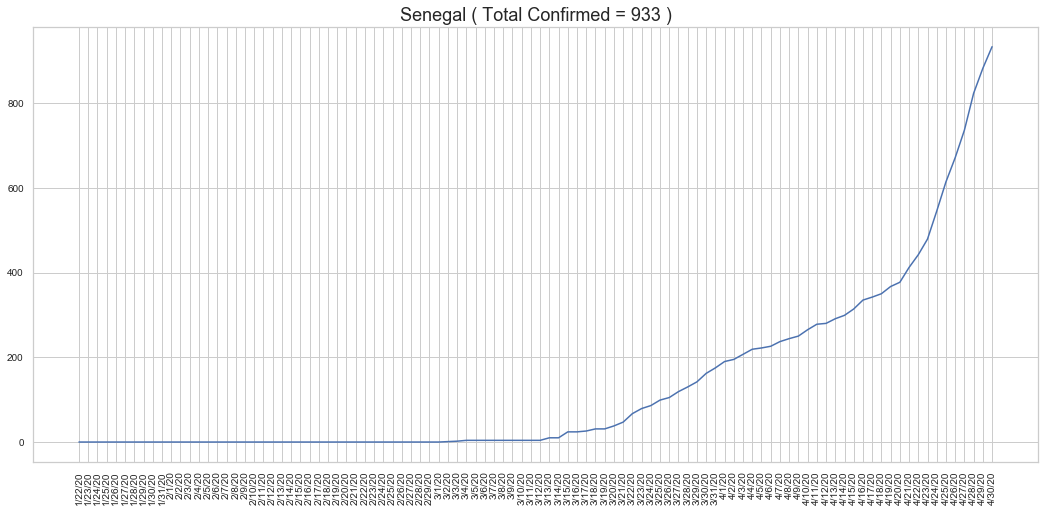

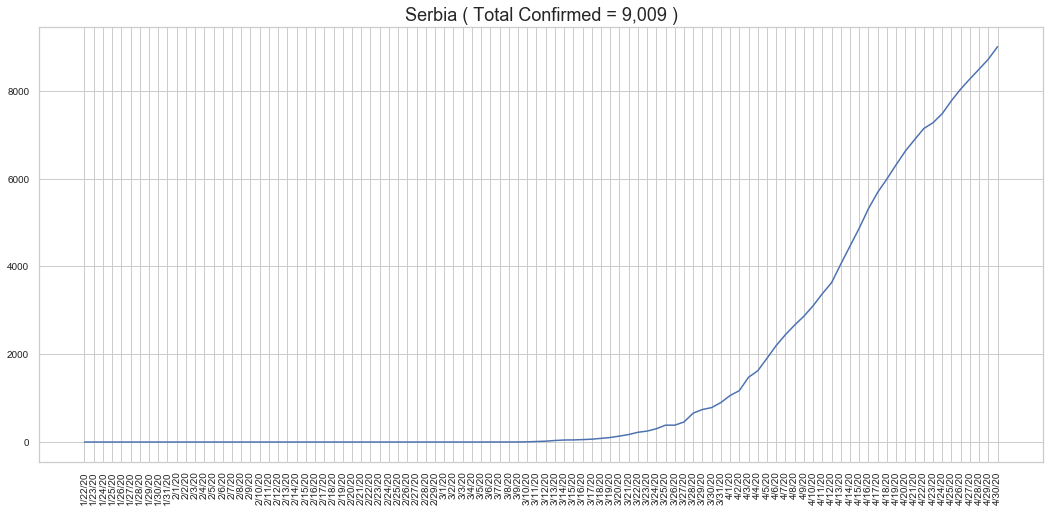

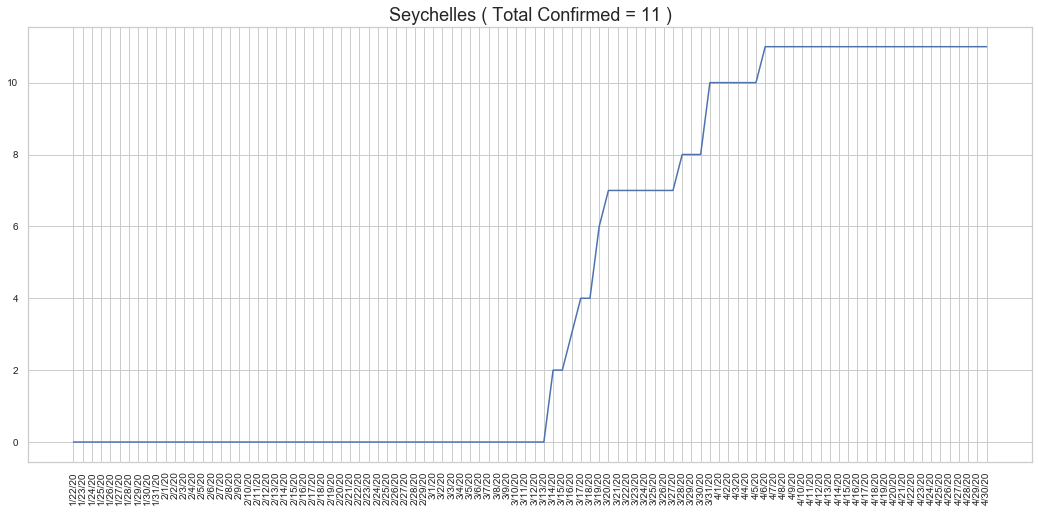

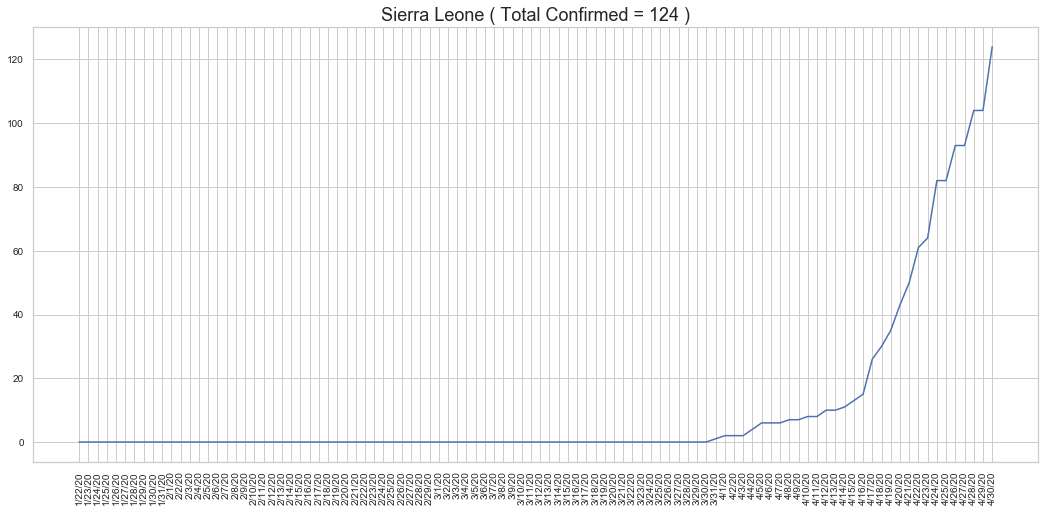

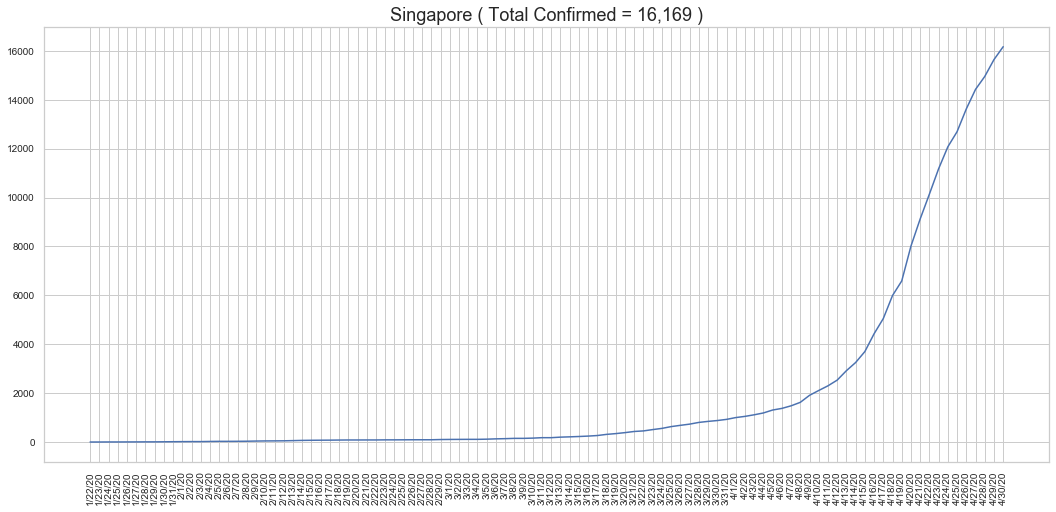

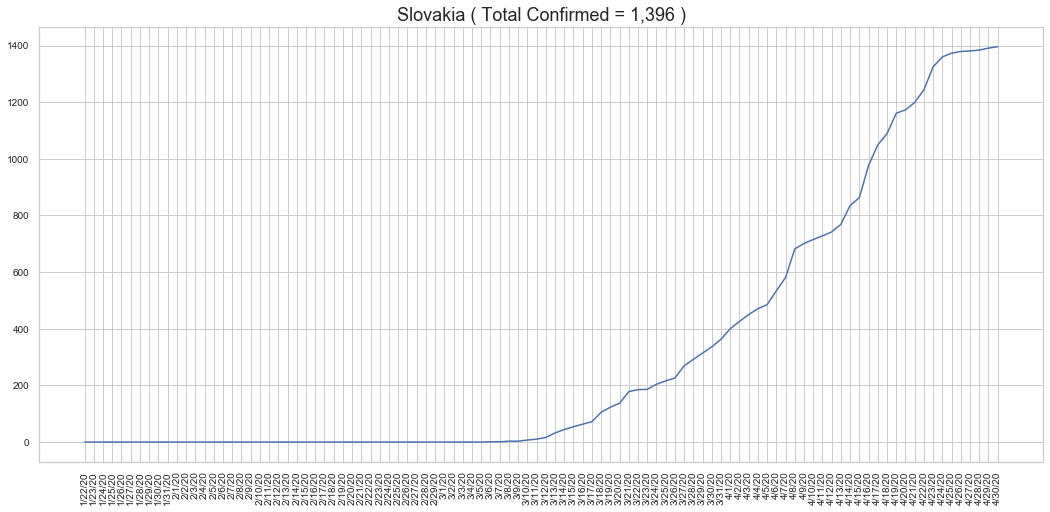

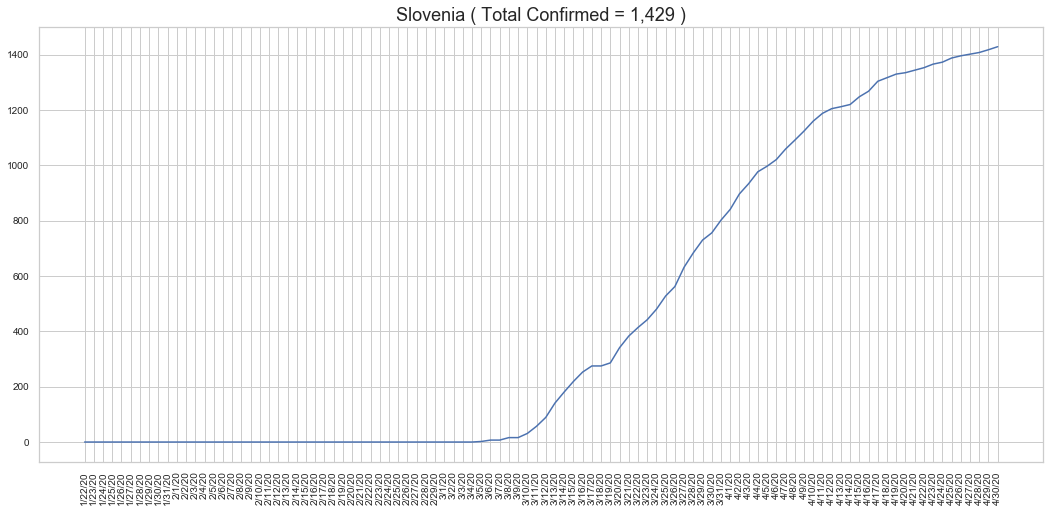

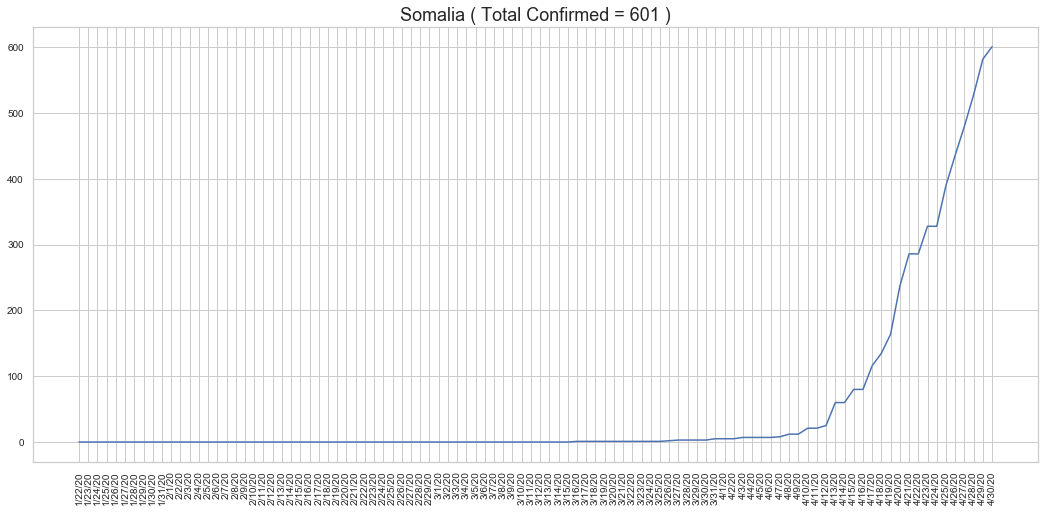

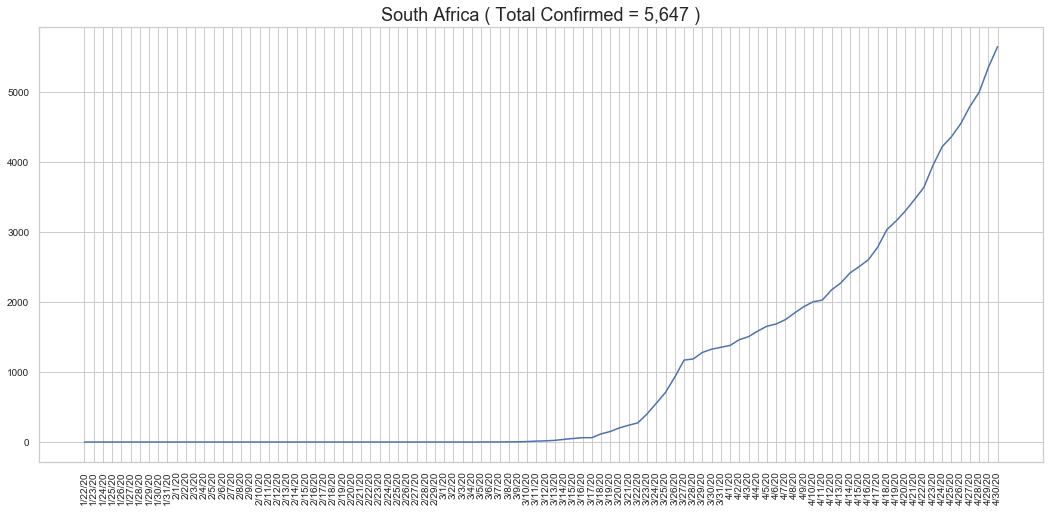

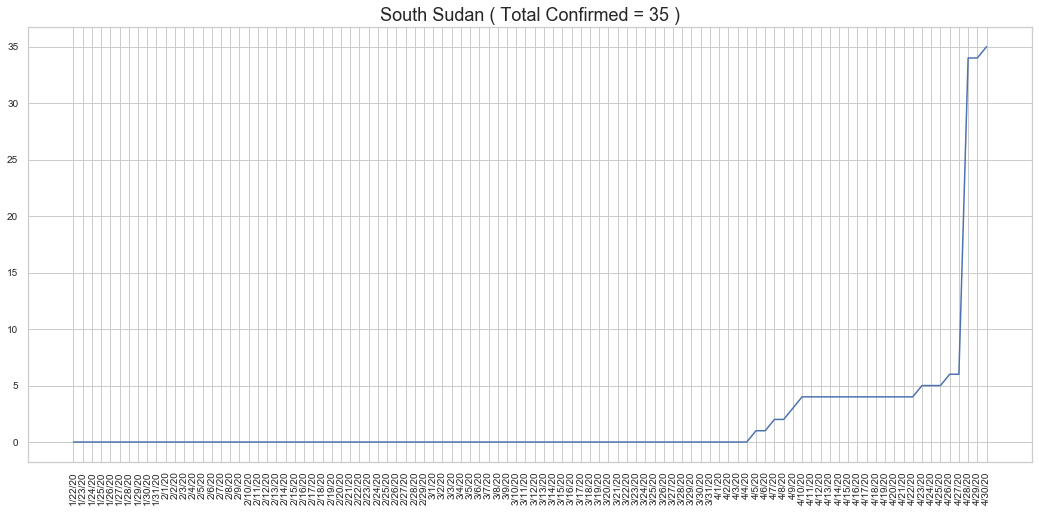

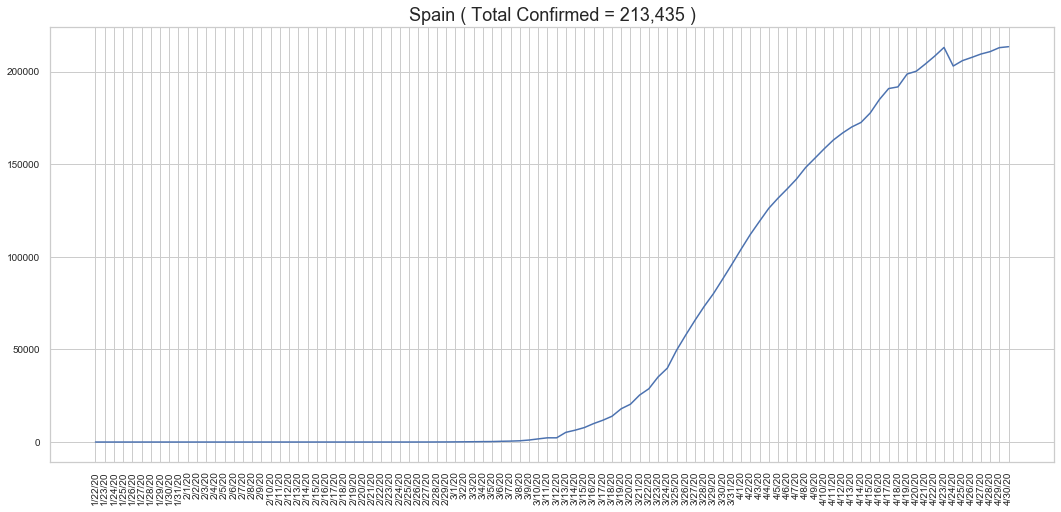

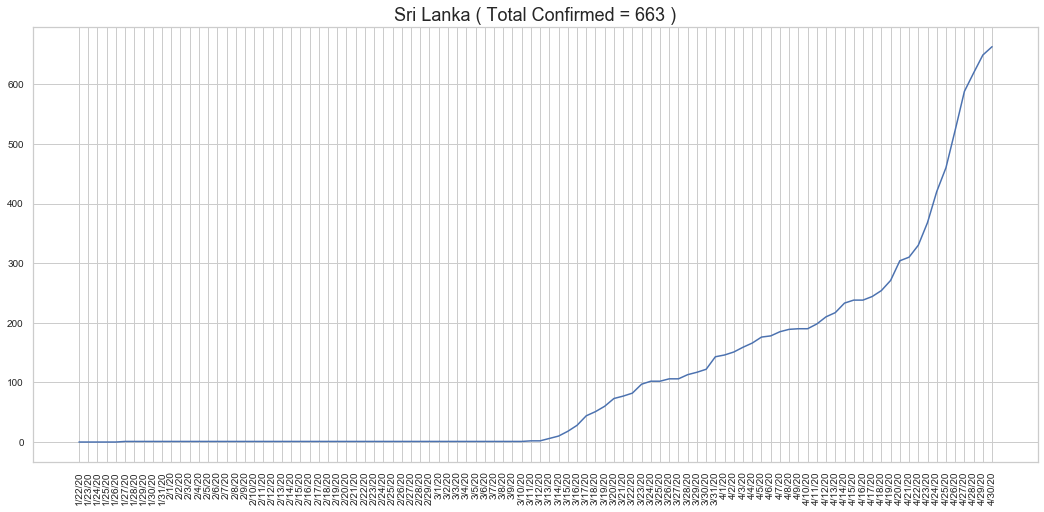

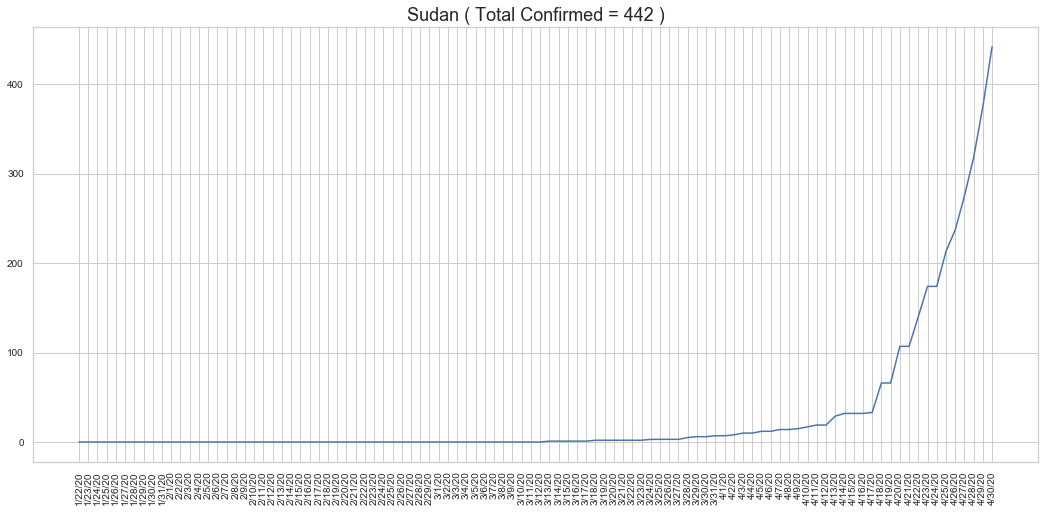

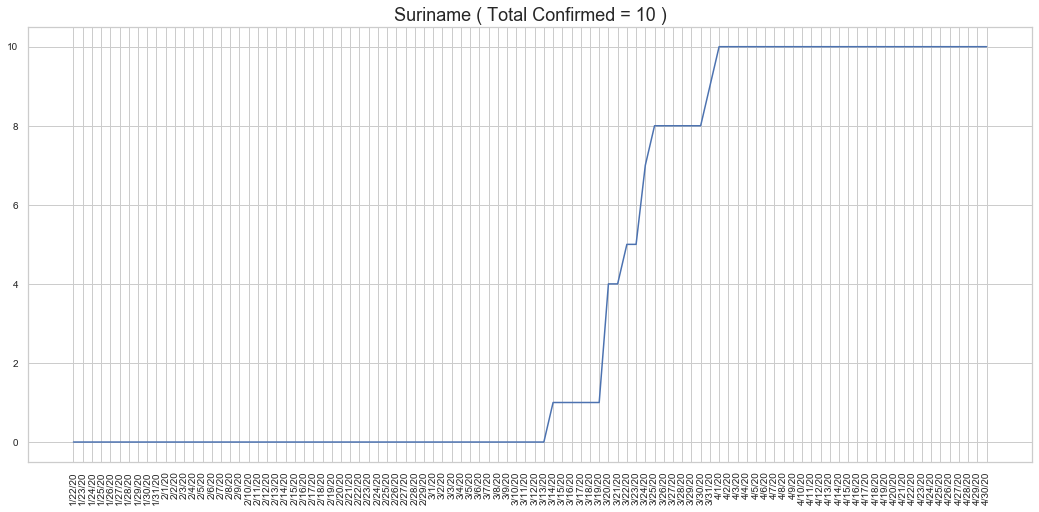

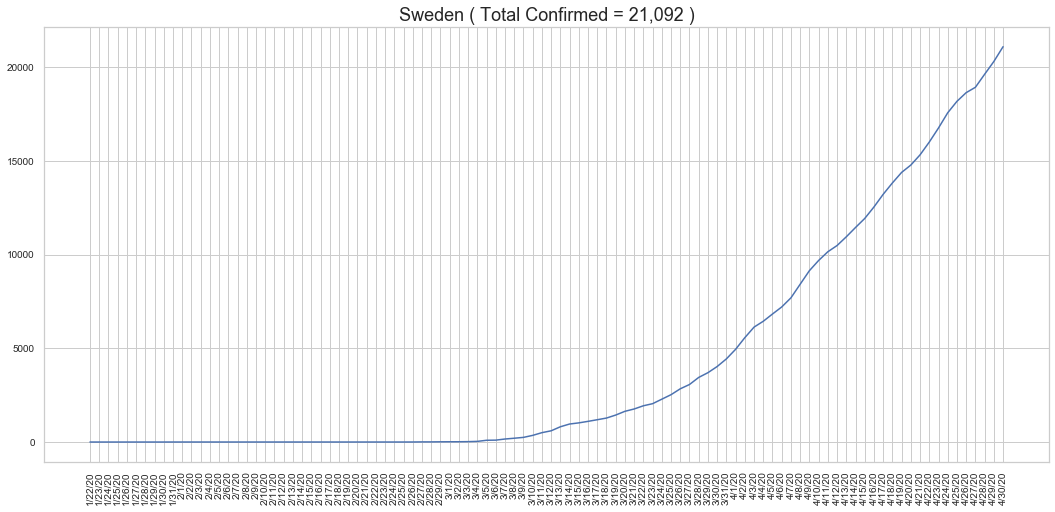

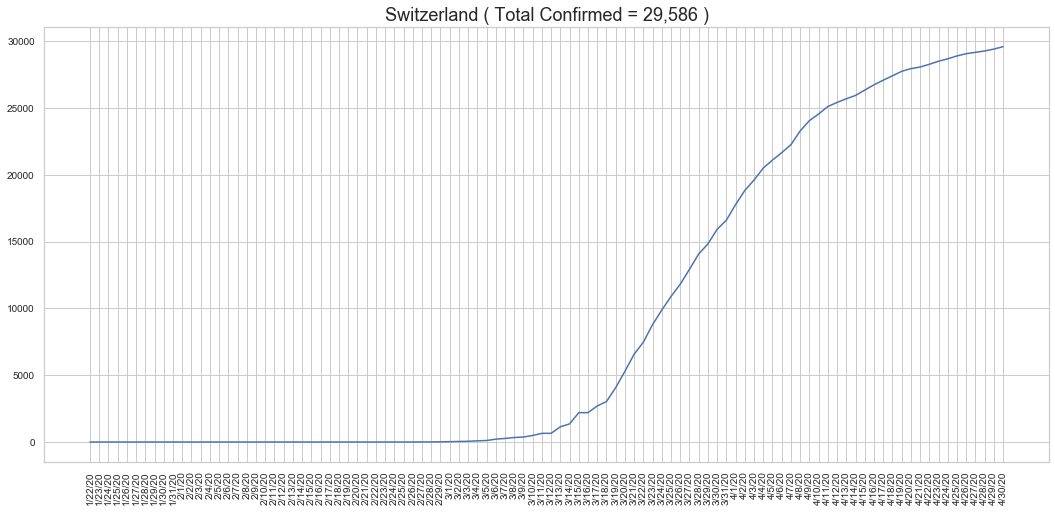

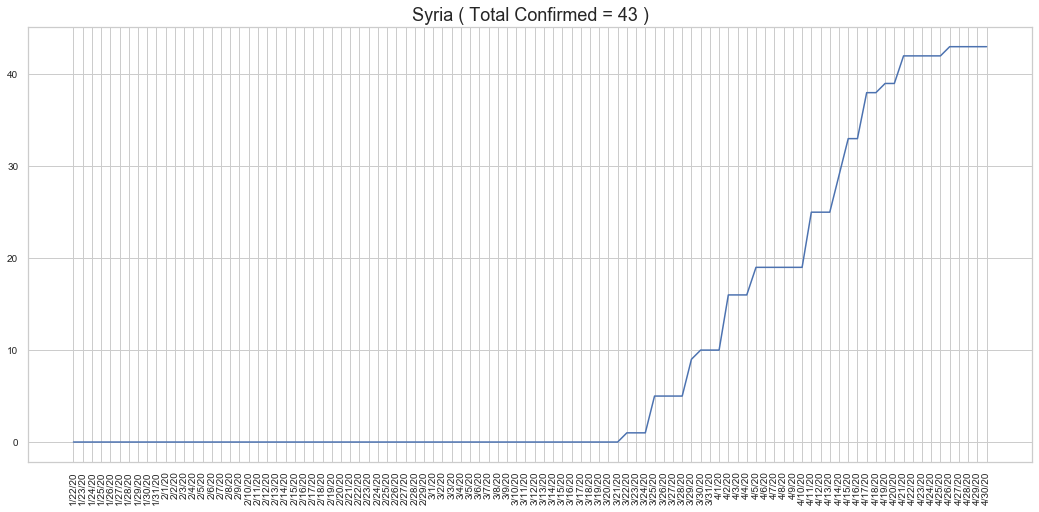

OSError: [Errno 22] Invalid argument: 'C:\\Users\\Andromeda\\Programming\\GitHub\\COVID-19\\Code and Analysis\\output\\visualization\\Taiwan*/confirmed_timeseries.jpg'

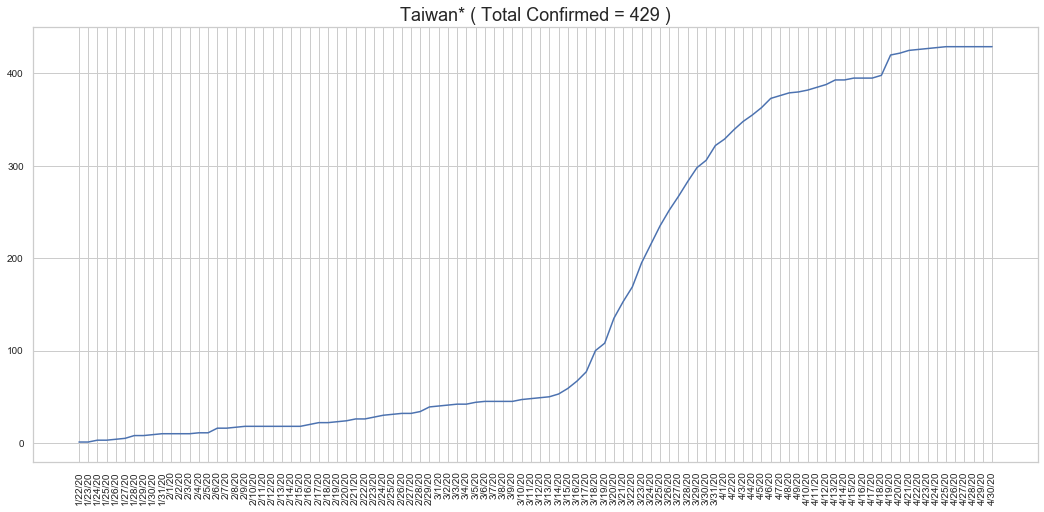

In [87]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 8)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

for index, row in time_series_covid19_confirmed_global_country.iterrows():
#     print(row["Country/Region"], " : ", row[data_cols_new_format].sum())
    filename = output_visualization_dir + row["Country/Region"] + "/" + "confirmed_timeseries.jpg"
    
    if os.path.exists(filename):
        os.remove(filename)
#     fig = px.line(row[data_cols_new_format], x=data_cols_new_format, y=data_cols_new_format)
    
    plt.plot(row[data_cols_new_format])
    plt.title(row["Country/Region"] + " ( Total Confirmed = " + "{:,d}".format(row[last_day]) + " )")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
#     fig.show()
    plt.show()
    
#     plt.clf()

In [ ]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 8)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

for index, row in time_series_covid19_recovered_global_country.iterrows():
#     print(row["Country/Region"], " : ", row[data_cols_new_format].sum())
    filename = output_visualization_dir + row["Country/Region"] + "/" + "recovered_timeseries.jpg"
    
    if os.path.exists(filename):
        os.remove(filename)
#     fig = px.line(row[data_cols_new_format], x=data_cols_new_format, y=data_cols_new_format)
    
    plt.plot(row[data_cols_new_format])
    plt.title(row["Country/Region"] + " ( Total Recovered = " + "{:,d}".format(row[last_day]) + " )")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
#     fig.show()
    plt.show()
    
#     plt.clf()